<a href="https://colab.research.google.com/github/SLKS99/Understanding-the-Ligand-Assisted-Reprecipitation-of-CsPbBr3-Perovskite-Nanocrystals-via-High-Throug/blob/main/OAc_OLAm_CsPbBr3_Tol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Modules 

import numpy as np
import pandas as pd


#Plotting Tools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

import seaborn as sns

#gdown Installation
!pip install gdown==3.6.0

!pip install lmfit

from lmfit.models import GaussianModel, ExponentialModel, ConstantModel
import lmfit

from lmfit import Model
from lmfit import minimize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for gdown: filename=gdown-3.6.0-py3-none-any.whl size=5236 sha256=0ab11ee3c5f33be6d2ac78832504a70871e082ee718633b85ce38ec7cfca8248
  Stored in directory: /root/.cache/pip/wheels/7f/54/b8/4e7b8c9e72e87fa54971ca6230962fdff21aa76113081c4c59
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 10.0 MB/s eta 0:00:00


## User Input

In [2]:
#@title Experimental Data 

#Names of Precursors
precursor1 = '$MAPbI_3$' #@param {type:"string"}
precursor2 = '$FAPbBr_33$' #@param {type:"string"}

#Wells that we should ignore
wells_to_ignore = 'A11,B11,C11,D11,E11,F11,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12' #@param {type:"string"}

#Information about Measurement Range
start_wavelength = 450 #@param {type:"integer"}
end_wavelength =  650 #@param {type:"integer"}
wavelength_step_size =  2 #@param {type:"integer"}

time_step = 9 #@param {type:"integer"}

#Information about the reads
number_of_reads =   92#@param {type:"integer"}
luminescence_read_numbers = '2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92'
#,93,94,95,96,97,98,99,100,101,102,103' #@param {type:"string"}

#Convert the string into a list to use later 
if len(wells_to_ignore) != 0:
  wells_to_ignore = list(wells_to_ignore.split(","))
luminescence_read_numbers = list(luminescence_read_numbers.split(","))

In [3]:
#@title Data Information

#Name of files 
data_file_name = '5-1-22 CsPbBr3 QD time.csv' #@param {type:'string'}
composition_file_name = 'CsPbBr3 wells.csv' #@param {type:'string'}

#Download the correct data
data_file = '1b3JM3v3g44GxIZMow0vzaRx7SxwEmrb1' #@param {type:"string"}
composition_file = '1z-s5yzD9nsAB9QVAyUcleWxB_RCQvUkt' #@param {type:"string"}

## Downloading and Formating Data

In [4]:
#@title Download Files

!gdown https://drive.google.com/uc?id={data_file}

!gdown https://drive.google.com/uc?id={composition_file}

Downloading...
From: https://drive.google.com/uc?id=1b3JM3v3g44GxIZMow0vzaRx7SxwEmrb1
To: /content/5-1-22 CsPbBr3 QD time.csv
100% 3.30M/3.30M [00:00<00:00, 174MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z-s5yzD9nsAB9QVAyUcleWxB_RCQvUkt
To: /content/CsPbBr3 wells.csv
100% 3.15k/3.15k [00:00<00:00, 3.74MB/s]


In [15]:
#@title Into Pandas Dataframes
rawData = pd.read_csv(data_file_name,header=None)
rawData = rawData.replace('OVRFLW', np.NaN)
rawData = rawData.replace(r'^\s*$', np.NaN, regex=True)
composition = pd.read_csv(composition_file_name, index_col = 0)



In [6]:
composition

A1     A2     A3     A4     A5     A6     A7     A8     A9  \
Wells             1      2      3      4      5      6      7      8      9   
OA              100    100    100    100    100    100    100    100    100   
OLA              10     20     30     40     50     60     70     80     90   
Ligand Ratio  1:0.1  1:0.2  1:0.3  1:0.4  1:0.5  1:0.6  1:0.7  1:0.8  1:0.9   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

              A10  ...     H4     H5     H6     H7     H8     H9  H10  H11  \
Wells          10  ...     88     89     90     91     92     93   94   95   
OA            100  ...    100    100    100    100    100    100  100  100   
OLA           100  ...    140    150    160    170    180    190  200    0   
Ligand Ratio  1:1  ...  1:1.4  1:1.5  1:1.6  1:1.7  1:1.8  1:1.9  1:2  1:0   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN  NaN  NaN   

              H12 Unnamed: 97  
Wells          96         NaN  
OA              0         NaN  
OLA           200         NaN  
Ligand Ratio  0:2         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN         NaN  
NaN           NaN              

[17 rows x 97 columns]

In [16]:
#@title Parsing the Data into a Dictionary
cells = [] 

for i in range(1, 9):
  for j in range(1 , 13): 
    cells.append(chr(64 + i) + str(j))

for i in wells_to_ignore:
  cells.remove(i)

for i in wells_to_ignore: 
  composition = composition.drop(i, axis = 1)
if not luminescence_read_numbers:
  for i in luminescence_read_numbers:
    cells= cells.remove(i)

#First the rows of measurements 
rows = []

for i in range(1, number_of_reads + 1): 
  
  rows += rawData[rawData[rawData.columns[0]] == 'Read ' + str(i) + ':EM Spectrum'].index.tolist()
  rows += rawData[rawData[rawData.columns[0]] == 'Read ' + str(i) + ':Spectrum'].index.tolist()
rows += rawData[rawData[rawData.columns[0]] == 'Results'].index.tolist()

#Separate into different dataframes 

#First step, make a list of the names 
names = []

for i in range(1, number_of_reads + 1):
  names.append('Read ' + str(i))

#Next, make a dictionary 
d = {}

for c in names:
  split_name = c.split(' ')
  index = int(split_name[1])
  d[c] = rawData[rows[index - 1] + 2 :rows[index] - 1] #Take a section of the values 
  d[c] = d[c].drop([0], axis = 1) #Drop the empty column
 
  new_header = d[c].iloc[0] #grab the first row for the header
  d[c] = d[c][1:] #take the data less the header row
  d[c].columns = new_header #set the header row as the df header
  for i in wells_to_ignore: 
    d[c] = d[c].drop(i, axis = 1)
  d[c] = d[c].astype(float) #Make sure that it is composed of numbers
  
  

In [17]:
#@title Convert the Dictionary into an Array
#Convert  into an array
luminescence_time = np.array(luminescence_read_numbers)
luminescence_time = [int(i) * time_step for i in luminescence_time]

 
#Convert wavelength information into an array
luminescence_wavelength = np.arange(start_wavelength,end_wavelength + wavelength_step_size,wavelength_step_size)

#Make a grid
nx, ny = np.meshgrid(luminescence_wavelength, luminescence_time)

#Load information into a dataframe
luminescence_df = pd.DataFrame()

for i in luminescence_read_numbers:
  
  luminescence_df  = luminescence_df.append(d['Read ' +str(i)])

luminescence_df.insert(loc = 0, column = 'Time', value = ny.ravel())

luminescence_df = luminescence_df.fillna(0.0)

luminescence_vec = np.array(luminescence_df)

Text(0, 0.5, 'Intensity (a.u.)')

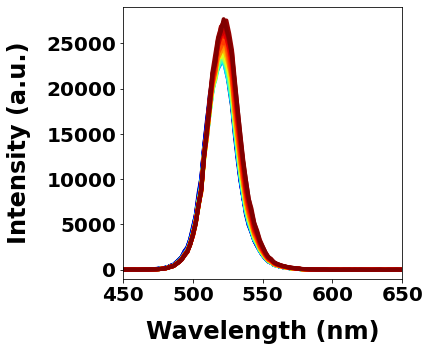

In [9]:
#@title Single Well
plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titleweight']='bold'



well = 'A4' #@param {type:"string"}

#Define the figure
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(111)

colors = cm.jet(np.linspace(0, 1, len(luminescence_read_numbers)))

color_holder = 0

for i in luminescence_read_numbers:
 
  plot_row = 0
  plot_column = 0
      
  d['Read ' + str(i)].plot(x = 'Wavelength', y = well, ax = ax1, legend = False, linewidth=4, c = colors[color_holder])
  color_holder += 1
plt.xlim(450,650)
plt.ylim(-1000,29000)
#plt.title('1:2 OAc:OLAm')
plt.xlabel('Wavelength (nm)', labelpad=15,size=24)
plt.ylabel('Intensity (a.u.)', labelpad=15,size=24)

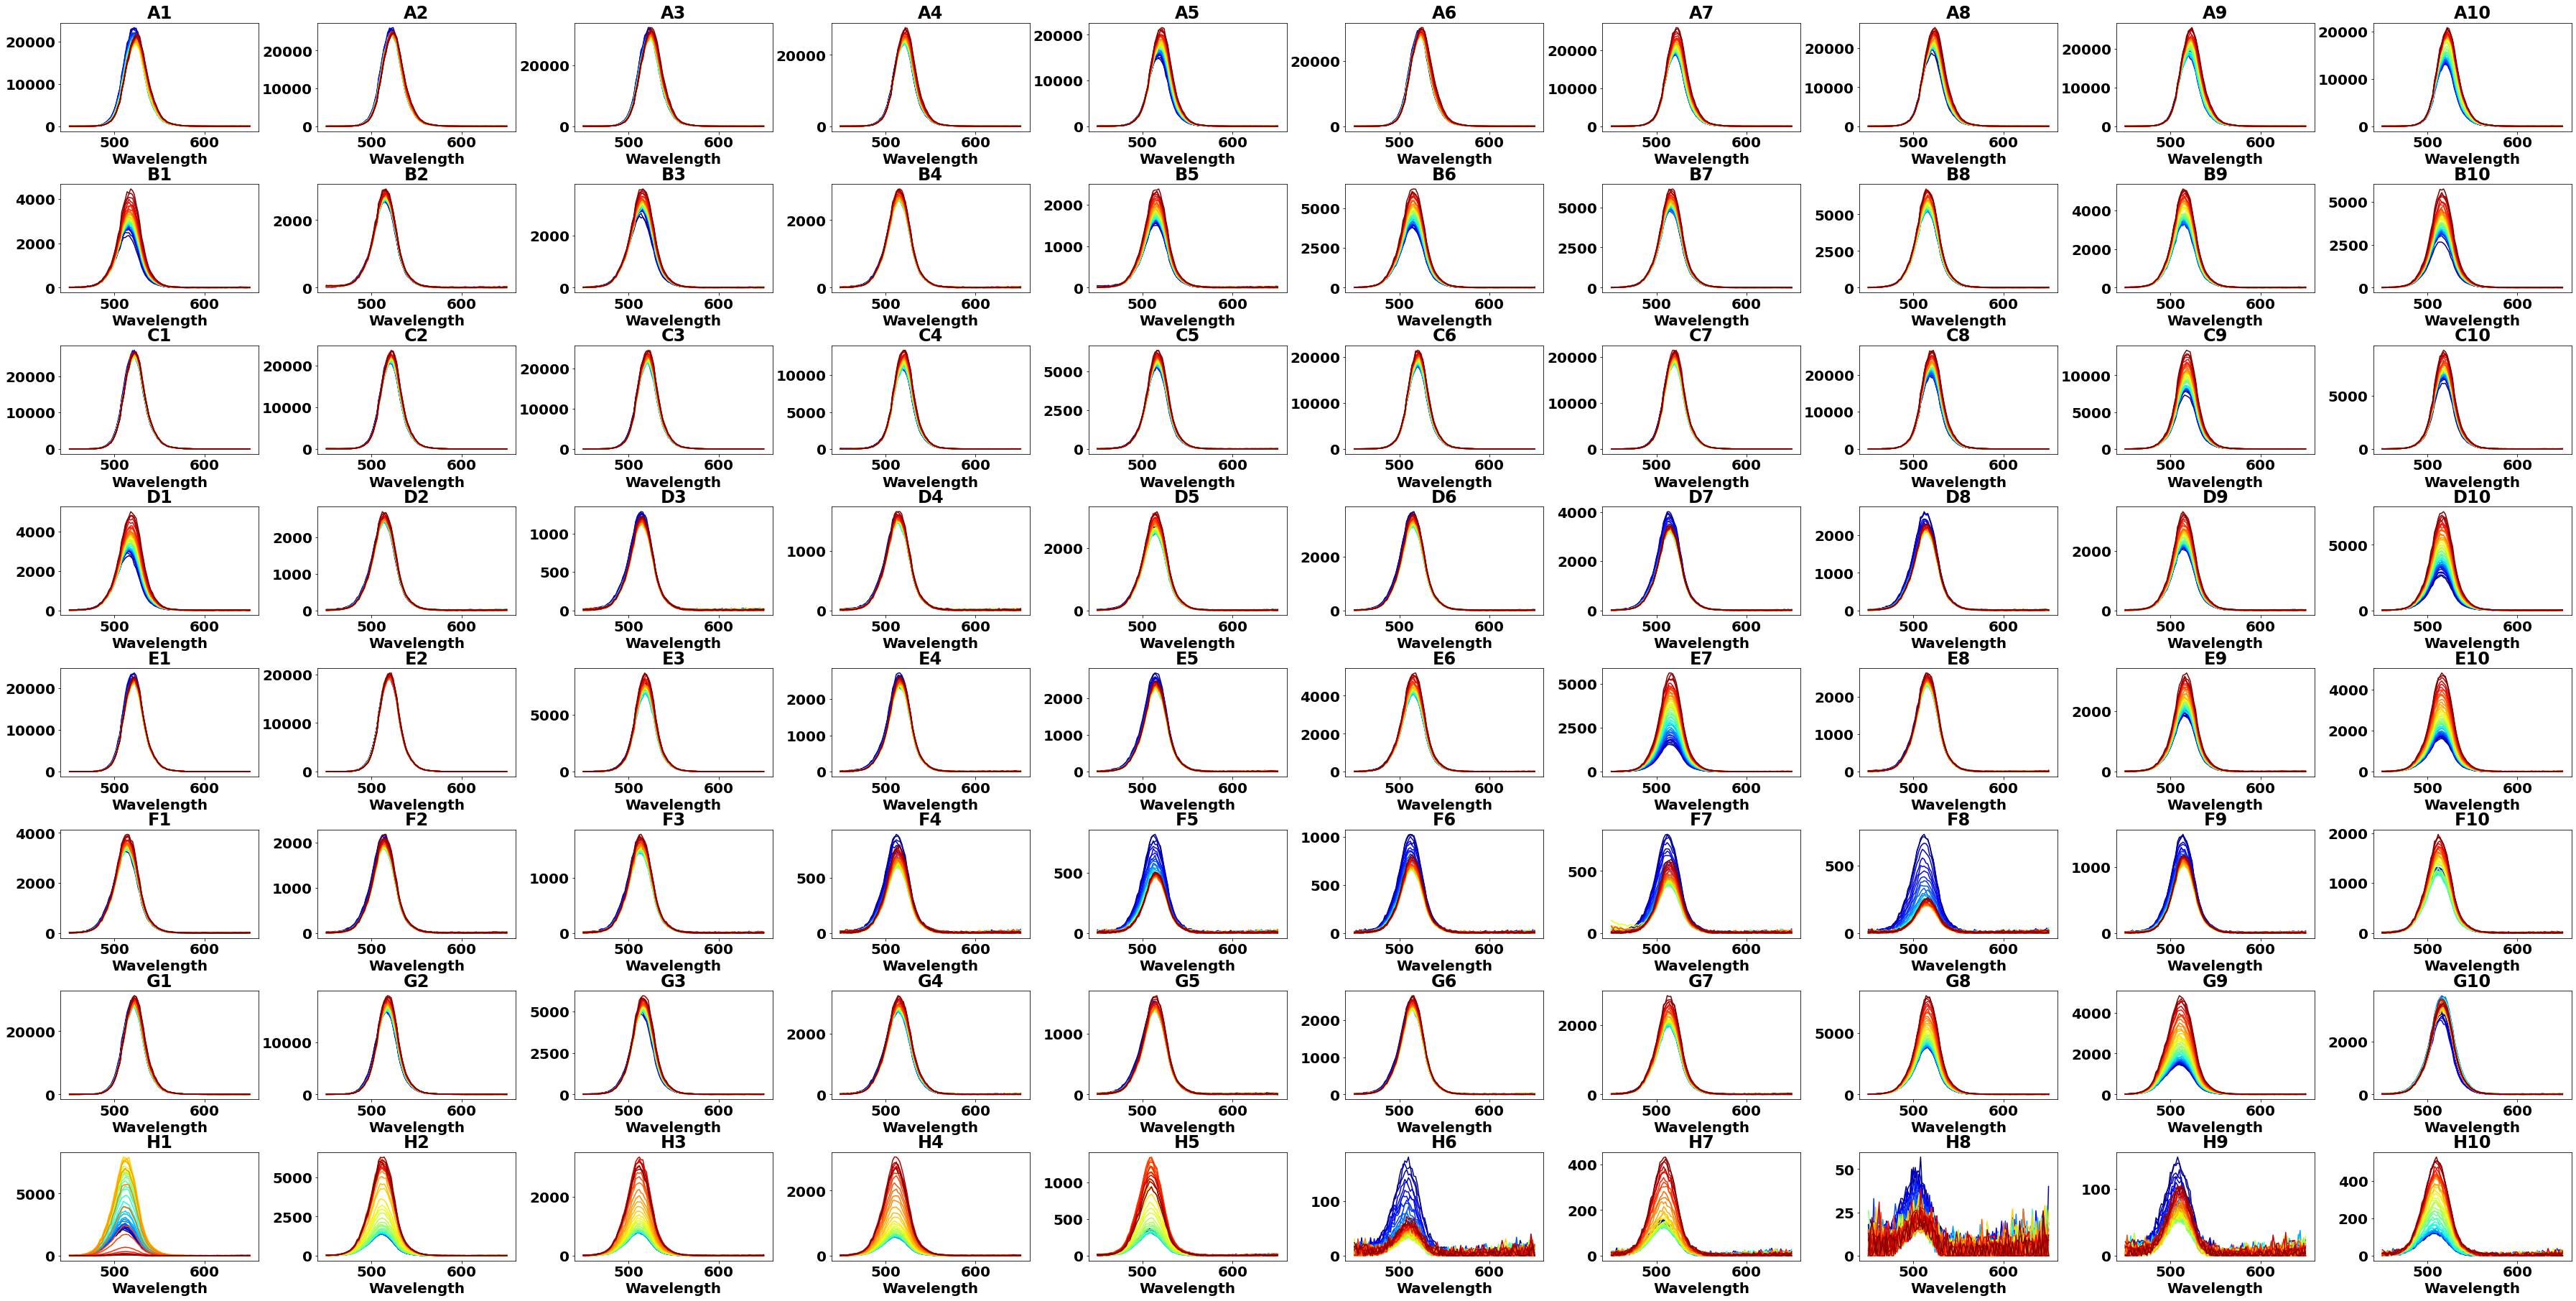

In [52]:
#@title Time Evolution for Luminescence
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Calibri'] + plt.rcParams['font.sans-serif']
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titleweight']='bold'

num_of_rows = 8
num_of_cols = 10

#Define the figure
fig, axes = plt.subplots(nrows = num_of_rows , ncols = num_of_cols, figsize = (50,25))
fig.tight_layout(h_pad=2)

colors = cm.jet(np.linspace(0, 1, len(luminescence_read_numbers)))

for i in range(len(luminescence_read_numbers)): 
  
  plot_row = 0
  plot_column = 0

  for j in range(len(cells)): 
    if cells[j] not in wells_to_ignore:
      d['Read '+ str(luminescence_read_numbers[i])].plot(x = 'Wavelength', y = cells[j], ax = axes[plot_row, plot_column], title = str(cells[j]), legend = False, c = colors[i])
    

    #Putting the plots where they need to be 
    plot_column += 1
    if plot_column == 10:
      plot_row += 1
      plot_column = 0
plt.savefig('OAc OLAm Time evolution plot.tif', bbox_inches='tight',dpi=300)

In [19]:
luminescence_vec.shape

(4646, 82)

In [20]:
luminescence_wavelength.shape

(101,)

In [21]:
ldata = luminescence_vec.reshape([46,101,82])
print(ldata.shape, luminescence_wavelength.shape)
print(luminescence_wavelength.max())

(46, 101, 82) (101,)
650


Text(24.0, 0.5, 'Time (min)')

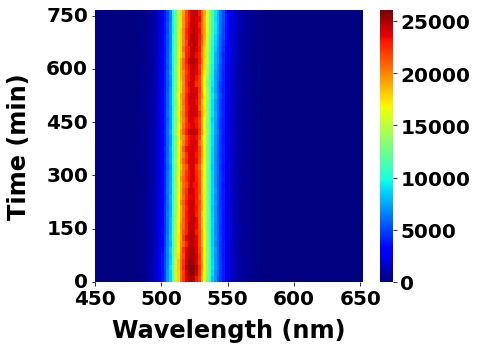

In [22]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 20
plt.figure(figsize=(6,5))
ax2=sns.heatmap(ldata[:,:,3], cmap='jet')
ax2.invert_yaxis()
ax2.set_yticks([0,9,18,27,36,45])
ax2.set_yticklabels([0,150,300,450,600,750])
ax2.set_xticks(np.arange(0,len(luminescence_wavelength),25))
ax2.set_xticklabels(luminescence_wavelength[0::25], rotation='horizontal')
ax2.set_xlabel('Wavelength (nm)', labelpad=10, size=24)
ax2.set_ylabel('Time (min)', labelpad=15, size=24)

In [23]:
#@title Convert the Dictionary into an Array
#Convert  into an array
luminescence_time = np.array(luminescence_read_numbers)
luminescence_time = [int(i) * time_step for i in luminescence_time]

#Convert wavelength information into an array
luminescence_wavelength = np.arange(start_wavelength,end_wavelength + wavelength_step_size,wavelength_step_size)

#Make a grid
nx, ny = np.meshgrid(luminescence_wavelength, luminescence_time)

#Load information into a dataframe
luminescence_df = pd.DataFrame()

for i in luminescence_read_numbers:
  
  luminescence_df  = luminescence_df.append(d['Read ' +str(i)])

luminescence_df.insert(loc = 0, column = 'Time', value = ny.ravel())

luminescence_df = luminescence_df.fillna(0.0)

luminescence_vec = np.array(luminescence_df)


### Read One Gaussian Fit

In [24]:
Readone= np.array(d['Read 1'].drop(['Wavelength'],axis=1))
Readone

array([[ 3., 14.,  5., ...,  5.,  0., 11.],
       [14.,  3., 16., ..., 14.,  0., 19.],
       [18., 20.,  7., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  0., 21., ..., 21.,  0.,  0.],
       [12.,  9., 20., ...,  0.,  8., 15.],
       [21.,  0.,  0., ..., 36.,  0.,  0.]])

{'amplitude': 883323.2928575174, 'center': 522.6137107528813, 'sigma': 11.195895425148462, 'fwhm': 26.364318465048104, 'height': 31475.376708556443}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 24965644.0
    reduced chi-square = 254751.470
    Akaike info crit   = 1260.20696
    Bayesian info crit = 1268.05232
    R-squared          = 0.99680194
[[Variables]]
    amplitude:  883323.293 +/- 5507.45675 (0.62%) (init = 1138644)
    center:     522.613711 +/- 0.08060460 (0.02%) (init = 522)
    sigma:      11.1958954 +/- 0.08060460 (0.72%) (init = 12)
    fwhm:       26.3643185 +/- 0.18980933 (0.72%) == '2.3548200*sigma'
    height:     31475.3767 +/- 196.246764 (0.62%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


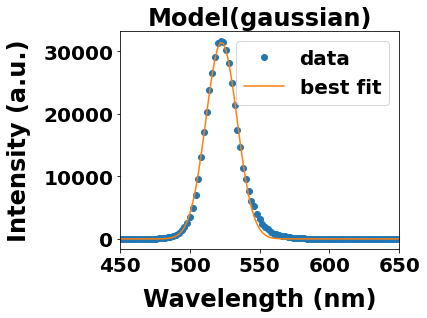

{'amplitude': 1052529.3496279435, 'center': 522.3219788880969, 'sigma': 11.136444753860616, 'fwhm': 26.224322835286056, 'height': 37704.89494975601}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 35987813.9
    reduced chi-square = 367222.590
    Akaike info crit   = 1297.14061
    Bayesian info crit = 1304.98597
    R-squared          = 0.99677586
[[Variables]]
    amplitude:  1052529.35 +/- 6594.79517 (0.63%) (init = 1357128)
    center:     522.321979 +/- 0.08057184 (0.02%) (init = 522)
    sigma:      11.1364448 +/- 0.08057184 (0.72%) (init = 12)
    fwhm:       26.2243228 +/- 0.18973217 (0.72%) == '2.3548200*sigma'
    height:     37704.8949 +/- 236.246282 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


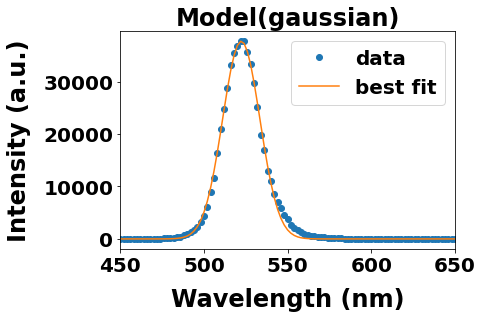

{'amplitude': 1510696.1559773525, 'center': 523.1503541554288, 'sigma': 11.527415115069438, 'fwhm': 27.144987661267816, 'height': 52282.371464084594}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 62865762.3
    reduced chi-square = 641487.371
    Akaike info crit   = 1353.48057
    Bayesian info crit = 1361.32593
    R-squared          = 0.99715035
[[Variables]]
    amplitude:  1510696.16 +/- 8867.95223 (0.59%) (init = 2032641)
    center:     523.150354 +/- 0.07813538 (0.01%) (init = 523)
    sigma:      11.5274151 +/- 0.07813538 (0.68%) (init = 13)
    fwhm:       27.1449877 +/- 0.18399477 (0.68%) == '2.3548200*sigma'
    height:     52282.3715 +/- 306.903369 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


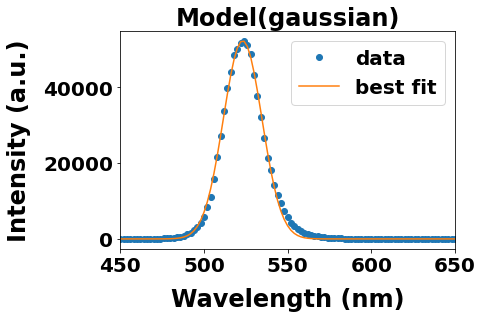

{'amplitude': 989578.0862847413, 'center': 520.0404194650982, 'sigma': 11.128744481566851, 'fwhm': 26.206190080083253, 'height': 35474.3123472676}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 28375319.1
    reduced chi-square = 289544.072
    Akaike info crit   = 1273.13689
    Bayesian info crit = 1280.98225
    R-squared          = 0.99712346
[[Variables]]
    amplitude:  989578.086 +/- 5853.87813 (0.59%) (init = 1282644)
    center:     520.040419 +/- 0.07601675 (0.01%) (init = 520)
    sigma:      11.1287445 +/- 0.07601675 (0.68%) (init = 12)
    fwhm:       26.2061901 +/- 0.17900576 (0.68%) == '2.3548200*sigma'
    height:     35474.3123 +/- 209.849383 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


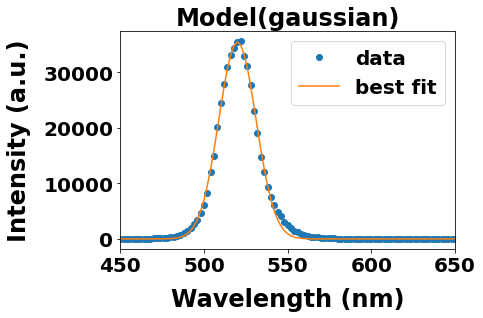

{'amplitude': 582624.6240742656, 'center': 517.7711321484318, 'sigma': 11.36011513306899, 'fwhm': 26.75102631765352, 'height': 20460.49752508361}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 9158025.62
    reduced chi-square = 93449.2410
    Akaike info crit   = 1158.91709
    Bayesian info crit = 1166.76245
    R-squared          = 0.99724318
[[Variables]]
    amplitude:  582624.624 +/- 3360.03491 (0.58%) (init = 732024)
    center:     517.771132 +/- 0.07564992 (0.01%) (init = 518)
    sigma:      11.3601151 +/- 0.07564992 (0.67%) (init = 12)
    fwhm:       26.7510263 +/- 0.17814194 (0.67%) == '2.3548200*sigma'
    height:     20460.4975 +/- 117.997305 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


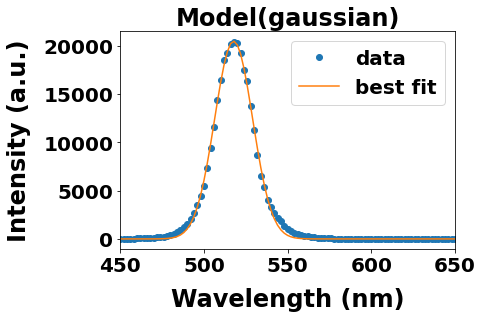

{'amplitude': 1127556.2434309062, 'center': 522.6584378713939, 'sigma': 11.317150987320634, 'fwhm': 26.64985348796238, 'height': 39747.62567342791}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 44275565.3
    reduced chi-square = 451791.483
    Akaike info crit   = 1318.07312
    Bayesian info crit = 1325.91848
    R-squared          = 0.99647281
[[Variables]]
    amplitude:  1127556.24 +/- 7373.98497 (0.65%) (init = 1443960)
    center:     522.658438 +/- 0.08546181 (0.02%) (init = 522)
    sigma:      11.3171510 +/- 0.08546181 (0.76%) (init = 12)
    fwhm:       26.6498535 +/- 0.20124717 (0.76%) == '2.3548200*sigma'
    height:     39747.6257 +/- 259.941881 (0.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


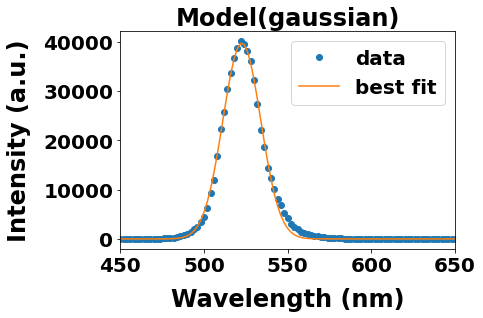

{'amplitude': 649434.2002113512, 'center': 520.359434811524, 'sigma': 10.995546125595794, 'fwhm': 25.89253192747549, 'height': 23562.883605014053}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 14733793.3
    reduced chi-square = 150344.829
    Akaike info crit   = 1206.94391
    Bayesian info crit = 1214.78927
    R-squared          = 0.99657623
[[Variables]]
    amplitude:  649434.200 +/- 4192.91528 (0.65%) (init = 862956)
    center:     520.359435 +/- 0.08197236 (0.02%) (init = 520)
    sigma:      10.9955461 +/- 0.08197236 (0.75%) (init = 12)
    fwhm:       25.8925319 +/- 0.19303016 (0.75%) == '2.3548200*sigma'
    height:     23562.8836 +/- 152.128156 (0.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


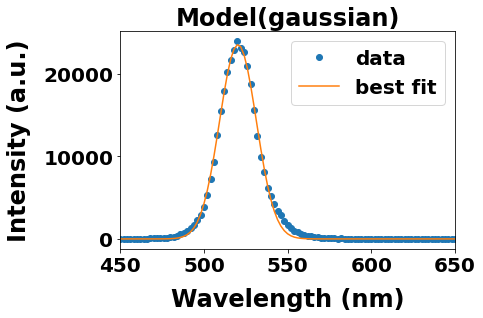

{'amplitude': 640634.8194889299, 'center': 521.000375299853, 'sigma': 11.156868274833665, 'fwhm': 26.272416550943813, 'height': 22907.533014752644}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 14632785.8
    reduced chi-square = 149314.141
    Akaike info crit   = 1206.24912
    Bayesian info crit = 1214.09448
    R-squared          = 0.99644550
[[Variables]]
    amplitude:  640634.819 +/- 4209.04998 (0.66%) (init = 760188)
    center:     521.000375 +/- 0.08464174 (0.02%) (init = 521)
    sigma:      11.1568683 +/- 0.08464174 (0.76%) (init = 11)
    fwhm:       26.2724166 +/- 0.19931607 (0.76%) == '2.3548200*sigma'
    height:     22907.5330 +/- 150.505179 (0.66%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


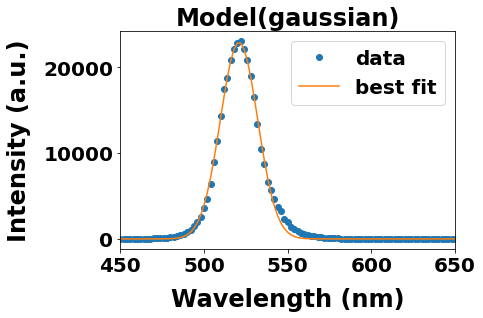

{'amplitude': 544352.0928935471, 'center': 520.4501832896668, 'sigma': 11.062600111648761, 'fwhm': 26.05043199491274, 'height': 19630.56367915655}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 12260815.1
    reduced chi-square = 125110.358
    Akaike info crit   = 1188.38664
    Bayesian info crit = 1196.23201
    R-squared          = 0.99592221
[[Variables]]
    amplitude:  544352.093 +/- 3836.52997 (0.70%) (init = 701496)
    center:     520.450183 +/- 0.09002964 (0.02%) (init = 520)
    sigma:      11.0626001 +/- 0.09002964 (0.81%) (init = 12)
    fwhm:       26.0504320 +/- 0.21200361 (0.81%) == '2.3548200*sigma'
    height:     19630.5637 +/- 138.353972 (0.70%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


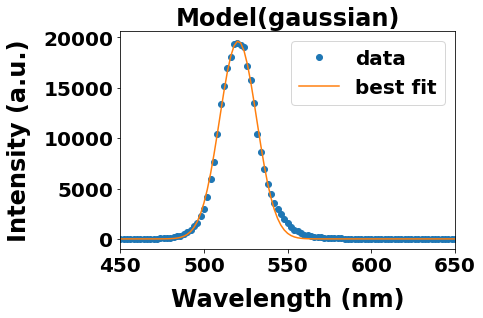

{'amplitude': 361313.64848689165, 'center': 520.1269816209232, 'sigma': 11.019159018477634, 'fwhm': 25.9481360398915, 'height': 13081.152355369712}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 4924444.44
    reduced chi-square = 50249.4331
    Akaike info crit   = 1096.25475
    Bayesian info crit = 1104.10011
    R-squared          = 0.99629745
[[Variables]]
    amplitude:  361313.648 +/- 2426.62842 (0.67%) (init = 469260)
    center:     520.126982 +/- 0.08545493 (0.02%) (init = 520)
    sigma:      11.0191590 +/- 0.08545493 (0.78%) (init = 12)
    fwhm:       25.9481360 +/- 0.20123097 (0.78%) == '2.3548200*sigma'
    height:     13081.1524 +/- 87.8547317 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


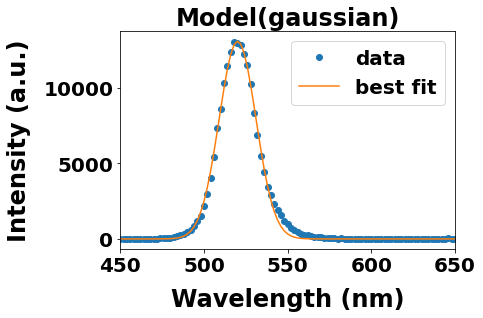

{'amplitude': 91514.35503152954, 'center': 514.0241335364036, 'sigma': 12.591713192420782, 'fwhm': 29.65121805977631, 'height': 2899.4424127505126}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 347490.983
    reduced chi-square = 3545.82636
    Akaike info crit   = 828.480721
    Bayesian info crit = 836.326083
    R-squared          = 0.99513725
[[Variables]]
    amplitude:  91514.3550 +/- 689.073945 (0.75%) (init = 113724)
    center:     514.024134 +/- 0.10947940 (0.02%) (init = 515)
    sigma:      12.5917132 +/- 0.10947939 (0.87%) (init = 13)
    fwhm:       29.6512181 +/- 0.25780426 (0.87%) == '2.3548200*sigma'
    height:     2899.44241 +/- 21.8319310 (0.75%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


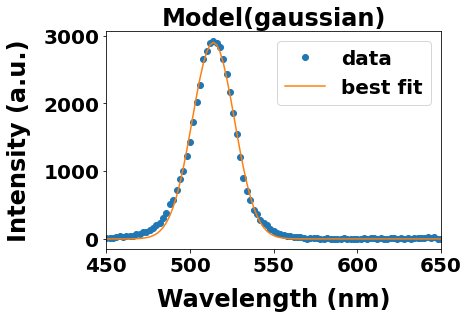

{'amplitude': 100022.45953504357, 'center': 513.9509959116838, 'sigma': 13.002412321263893, 'fwhm': 30.618340582358645, 'height': 3068.9066822862023}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 521336.950
    reduced chi-square = 5319.76480
    Akaike info crit   = 869.452165
    Bayesian info crit = 877.297526
    R-squared          = 0.99363790
[[Variables]]
    amplitude:  100022.460 +/- 857.670792 (0.86%) (init = 122889)
    center:     513.950996 +/- 0.12874066 (0.03%) (init = 515)
    sigma:      13.0024123 +/- 0.12874066 (0.99%) (init = 13)
    fwhm:       30.6183406 +/- 0.30316109 (0.99%) == '2.3548200*sigma'
    height:     3068.90668 +/- 26.3151793 (0.86%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


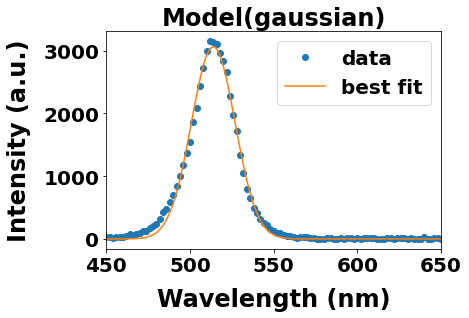

{'amplitude': 104963.44639981426, 'center': 513.0643235893359, 'sigma': 13.337751339558007, 'fwhm': 31.40800360941799, 'height': 3139.536617276318}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 418288.321
    reduced chi-square = 4268.24817
    Akaike info crit   = 847.209378
    Bayesian info crit = 855.054739
    R-squared          = 0.99523202
[[Variables]]
    amplitude:  104963.446 +/- 778.089515 (0.74%) (init = 133392)
    center:     513.064324 +/- 0.11416784 (0.02%) (init = 514)
    sigma:      13.3377513 +/- 0.11416785 (0.86%) (init = 14)
    fwhm:       31.4080036 +/- 0.26884473 (0.86%) == '2.3548200*sigma'
    height:     3139.53662 +/- 23.2732620 (0.74%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


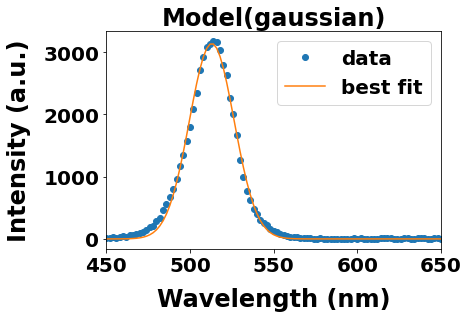

{'amplitude': 115512.49421565415, 'center': 513.9932787485644, 'sigma': 12.98107556004304, 'fwhm': 30.568096350300554, 'height': 3550.0001450555437}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 453800.545
    reduced chi-square = 4630.61781
    Akaike info crit   = 855.439546
    Bayesian info crit = 863.284908
    R-squared          = 0.99586411
[[Variables]]
    amplitude:  115512.494 +/- 799.537136 (0.69%) (init = 151830)
    center:     513.993279 +/- 0.10375056 (0.02%) (init = 514)
    sigma:      12.9810756 +/- 0.10375056 (0.80%) (init = 14)
    fwhm:       30.5680964 +/- 0.24431390 (0.80%) == '2.3548200*sigma'
    height:     3550.00015 +/- 24.5718889 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


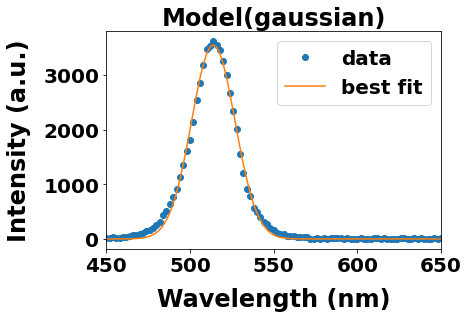

{'amplitude': 63632.835257753446, 'center': 513.5629123381675, 'sigma': 13.283430095691255, 'fwhm': 31.280086857935682, 'height': 1911.0899421591155}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 183413.129
    reduced chi-square = 1871.56254
    Akaike info crit   = 763.941967
    Bayesian info crit = 771.787328
    R-squared          = 0.99430602
[[Variables]]
    amplitude:  63632.8353 +/- 514.187214 (0.81%) (init = 83034)
    center:     513.562912 +/- 0.12394257 (0.02%) (init = 514)
    sigma:      13.2834301 +/- 0.12394257 (0.93%) (init = 14)
    fwhm:       31.2800869 +/- 0.29186244 (0.93%) == '2.3548200*sigma'
    height:     1911.08994 +/- 15.4426460 (0.81%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


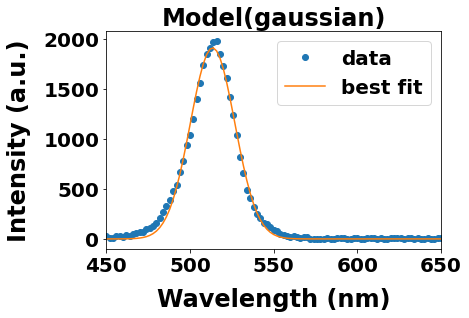

{'amplitude': 200059.6401463569, 'center': 513.4404679672467, 'sigma': 13.354232190953987, 'fwhm': 31.446813047902268, 'height': 5976.551241277947}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1579283.29
    reduced chi-square = 16115.1356
    Akaike info crit   = 981.393478
    Bayesian info crit = 989.238840
    R-squared          = 0.99503487
[[Variables]]
    amplitude:  200059.640 +/- 1512.82986 (0.76%) (init = 259896)
    center:     513.440468 +/- 0.11660561 (0.02%) (init = 514)
    sigma:      13.3542322 +/- 0.11660561 (0.87%) (init = 14)
    fwhm:       31.4468130 +/- 0.27458522 (0.87%) == '2.3548200*sigma'
    height:     5976.55124 +/- 45.1940863 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


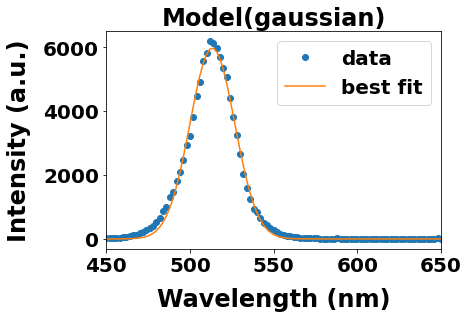

{'amplitude': 192085.23970557505, 'center': 515.17829171963, 'sigma': 12.552133342159518, 'fwhm': 29.55801463678408, 'height': 6105.012210698007}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1626765.73
    reduced chi-square = 16599.6503
    Akaike info crit   = 984.385371
    Bayesian info crit = 992.230732
    R-squared          = 0.99485944
[[Variables]]
    amplitude:  192085.240 +/- 1488.57930 (0.77%) (init = 241839)
    center:     515.178292 +/- 0.11232218 (0.02%) (init = 515)
    sigma:      12.5521333 +/- 0.11232218 (0.89%) (init = 13)
    fwhm:       29.5580146 +/- 0.26449852 (0.89%) == '2.3548200*sigma'
    height:     6105.01221 +/- 47.3113058 (0.77%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


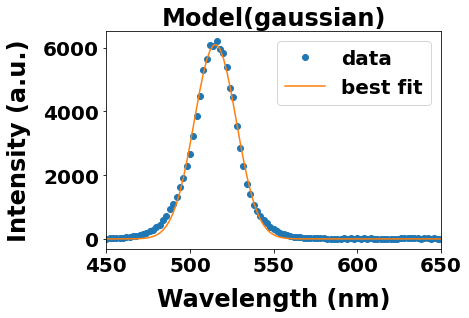

{'amplitude': 210353.73483133575, 'center': 514.6179677691946, 'sigma': 12.751785983786673, 'fwhm': 30.028160670340537, 'height': 6580.96072925804}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 1590898.19
    reduced chi-square = 16233.6550
    Akaike info crit   = 982.133568
    Bayesian info crit = 989.978930
    R-squared          = 0.99572486
[[Variables]]
    amplitude:  210353.735 +/- 1483.74029 (0.71%) (init = 261144)
    center:     514.617968 +/- 0.10386020 (0.02%) (init = 515)
    sigma:      12.7517860 +/- 0.10386020 (0.81%) (init = 13)
    fwhm:       30.0281607 +/- 0.24457209 (0.81%) == '2.3548200*sigma'
    height:     6580.96073 +/- 46.4192066 (0.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


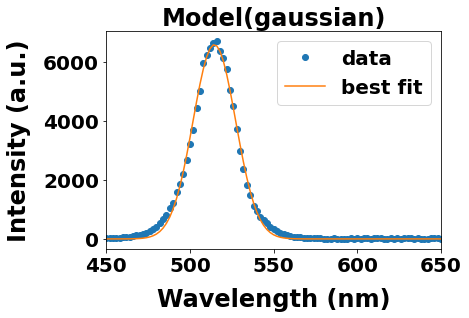

{'amplitude': 104998.07064243396, 'center': 514.2541960287639, 'sigma': 12.686399809059969, 'fwhm': 29.874187998370598, 'height': 3301.817097687614}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 357491.144
    reduced chi-square = 3647.86882
    Akaike info crit   = 831.346281
    Bayesian info crit = 839.191642
    R-squared          = 0.99617329
[[Variables]]
    amplitude:  104998.071 +/- 701.541151 (0.67%) (init = 129909)
    center:     514.254196 +/- 0.09787705 (0.02%) (init = 515)
    sigma:      12.6863998 +/- 0.09787704 (0.77%) (init = 13)
    fwhm:       29.8741880 +/- 0.23048282 (0.77%) == '2.3548200*sigma'
    height:     3301.81710 +/- 22.0610244 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


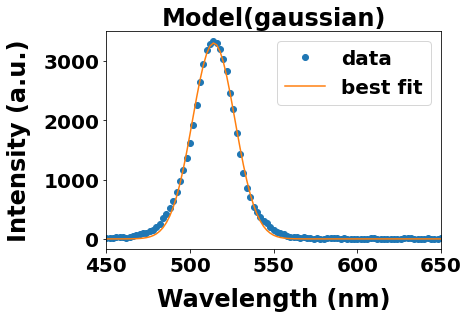

{'amplitude': 85265.00631389742, 'center': 514.944930398268, 'sigma': 12.596877777082597, 'fwhm': 29.663379727029643, 'height': 2700.3372050069006}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 243750.089
    reduced chi-square = 2487.24580
    Akaike info crit   = 792.666602
    Bayesian info crit = 800.511963
    R-squared          = 0.99607371
[[Variables]]
    amplitude:  85265.0063 +/- 577.237037 (0.68%) (init = 109512)
    center:     514.944930 +/- 0.09847272 (0.02%) (init = 515)
    sigma:      12.5968778 +/- 0.09847272 (0.78%) (init = 13)
    fwhm:       29.6633797 +/- 0.23188553 (0.78%) == '2.3548200*sigma'
    height:     2700.33721 +/- 18.2810675 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


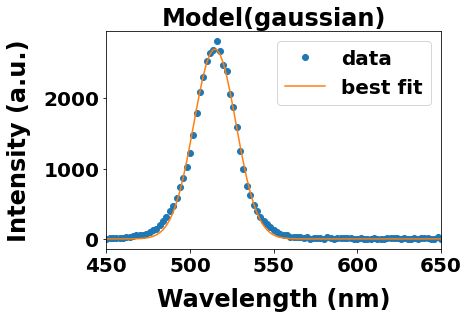

{'amplitude': 944543.1431860145, 'center': 521.8281098666314, 'sigma': 11.1191454409654, 'fwhm': 26.183586067294147, 'height': 33889.13437570265}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 33880662.7
    reduced chi-square = 345721.048
    Akaike info crit   = 1291.04668
    Bayesian info crit = 1298.89204
    R-squared          = 0.99623647
[[Variables]]
    amplitude:  944543.143 +/- 6393.83586 (0.68%) (init = 1161105)
    center:     521.828110 +/- 0.08691210 (0.02%) (init = 521)
    sigma:      11.1191454 +/- 0.08691210 (0.78%) (init = 11)
    fwhm:       26.1835861 +/- 0.20466236 (0.78%) == '2.3548200*sigma'
    height:     33889.1344 +/- 229.403491 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


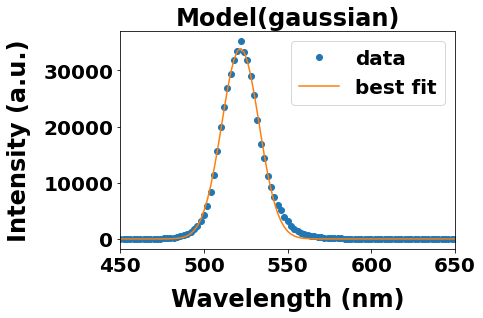

{'amplitude': 798317.8721543753, 'center': 520.9245767393804, 'sigma': 10.961811566219838, 'fwhm': 25.813093112365802, 'height': 29053.84444208255}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 20484669.6
    reduced chi-square = 209027.241
    Akaike info crit   = 1240.22675
    Bayesian info crit = 1248.07211
    R-squared          = 0.99686787
[[Variables]]
    amplitude:  798317.872 +/- 4936.35000 (0.62%) (init = 975447)
    center:     520.924577 +/- 0.07826760 (0.02%) (init = 521)
    sigma:      10.9618116 +/- 0.07826760 (0.71%) (init = 11)
    fwhm:       25.8130931 +/- 0.18430611 (0.71%) == '2.3548200*sigma'
    height:     29053.8444 +/- 179.652741 (0.62%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


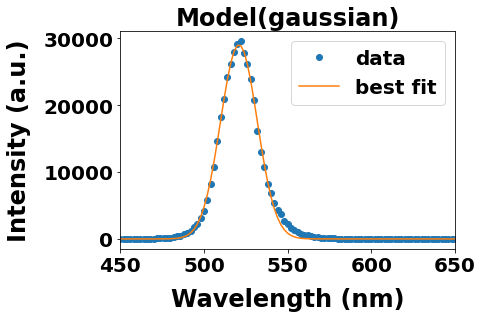

{'amplitude': 891678.6127618789, 'center': 520.2865595111803, 'sigma': 10.981438847667393, 'fwhm': 25.859311827264133, 'height': 32393.598104094974}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 25117867.5
    reduced chi-square = 256304.770
    Akaike info crit   = 1260.82092
    Bayesian info crit = 1268.66628
    R-squared          = 0.99691389
[[Variables]]
    amplitude:  891678.613 +/- 5471.05758 (0.61%) (init = 1154268)
    center:     520.286560 +/- 0.07780218 (0.01%) (init = 520)
    sigma:      10.9814388 +/- 0.07780218 (0.71%) (init = 12)
    fwhm:       25.8593118 +/- 0.18321013 (0.71%) == '2.3548200*sigma'
    height:     32393.5981 +/- 198.756924 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


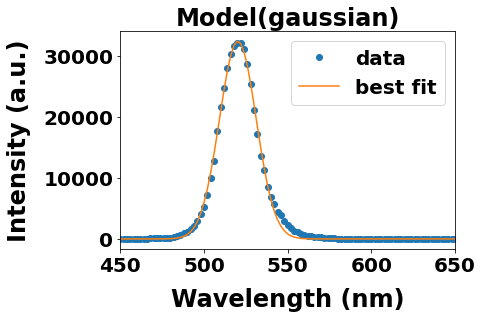

{'amplitude': 415865.8374048459, 'center': 518.8272551408998, 'sigma': 11.112460269990965, 'fwhm': 26.167843692980124, 'height': 14929.76979308023}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 5053374.07
    reduced chi-square = 51565.0415
    Akaike info crit   = 1098.86507
    Bayesian info crit = 1106.71043
    R-squared          = 0.99709309
[[Variables]]
    amplitude:  415865.837 +/- 2468.57084 (0.59%) (init = 498300)
    center:     518.827255 +/- 0.07616784 (0.01%) (init = 519)
    sigma:      11.1124603 +/- 0.07616784 (0.69%) (init = 11)
    fwhm:       26.1678437 +/- 0.17936155 (0.69%) == '2.3548200*sigma'
    height:     14929.7698 +/- 88.6227570 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


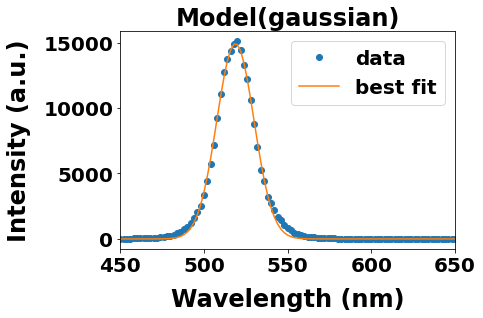

{'amplitude': 216637.7457832019, 'center': 515.5861015314126, 'sigma': 11.934657791492821, 'fwhm': 28.103970860563127, 'height': 7241.5951994175675}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 101
    # variables        = 3
    chi-square         = 1746888.94
    reduced chi-square = 17825.3974
    Akaike info crit   = 991.580876
    Bayesian info crit = 999.426238
    R-squared          = 0.99594239
[[Variables]]
    amplitude:  216637.746 +/- 1504.13758 (0.69%) (init = 261684)
    center:     515.586102 +/- 0.09568253 (0.02%) (init = 516)
    sigma:      11.9346578 +/- 0.09568253 (0.80%) (init = 12)
    fwhm:       28.1039709 +/- 0.22531514 (0.80%) == '2.3548200*sigma'
    height:     7241.59520 +/- 50.2791126 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


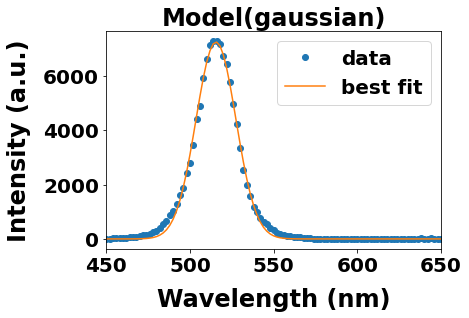

{'amplitude': 731087.7778962355, 'center': 519.8950061394657, 'sigma': 11.177037292165366, 'fwhm': 26.319910956336848, 'height': 26094.736198138664}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 15917524.2
    reduced chi-square = 162423.716
    Akaike info crit   = 1214.74888
    Bayesian info crit = 1222.59424
    R-squared          = 0.99702122
[[Variables]]
    amplitude:  731087.778 +/- 4393.91206 (0.60%) (init = 935388)
    center:     519.895006 +/- 0.07756720 (0.01%) (init = 520)
    sigma:      11.1770373 +/- 0.07756720 (0.69%) (init = 12)
    fwhm:       26.3199110 +/- 0.18265679 (0.69%) == '2.3548200*sigma'
    height:     26094.7362 +/- 156.832073 (0.60%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


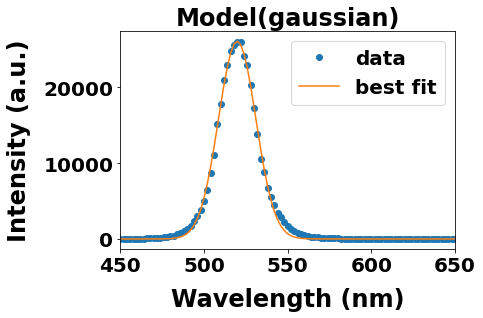

{'amplitude': 791922.5782826138, 'center': 519.2628254813336, 'sigma': 11.072185705485776, 'fwhm': 26.073004342992014, 'height': 28533.78937145771}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 18436130.7
    reduced chi-square = 188123.782
    Akaike info crit   = 1229.58494
    Bayesian info crit = 1237.43030
    R-squared          = 0.99709588
[[Variables]]
    amplitude:  791922.578 +/- 4706.53571 (0.59%) (init = 938091)
    center:     519.262825 +/- 0.07598381 (0.01%) (init = 519)
    sigma:      11.0721857 +/- 0.07598382 (0.69%) (init = 11)
    fwhm:       26.0730043 +/- 0.17892821 (0.69%) == '2.3548200*sigma'
    height:     28533.7894 +/- 169.581279 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


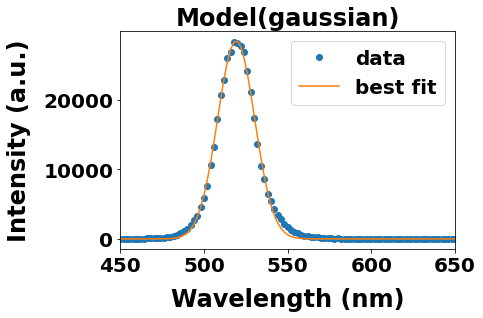

{'amplitude': 866734.1717223926, 'center': 519.0920083169144, 'sigma': 11.36252696997541, 'fwhm': 26.756705759437494, 'height': 30431.34021764831}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 20878434.9
    reduced chi-square = 213045.254
    Akaike info crit   = 1242.14979
    Bayesian info crit = 1249.99515
    R-squared          = 0.99715941
[[Variables]]
    amplitude:  866734.172 +/- 5073.83993 (0.59%) (init = 1094724)
    center:     519.092008 +/- 0.07680605 (0.01%) (init = 520)
    sigma:      11.3625270 +/- 0.07680605 (0.68%) (init = 12)
    fwhm:       26.7567058 +/- 0.18086441 (0.68%) == '2.3548200*sigma'
    height:     30431.3402 +/- 178.144371 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


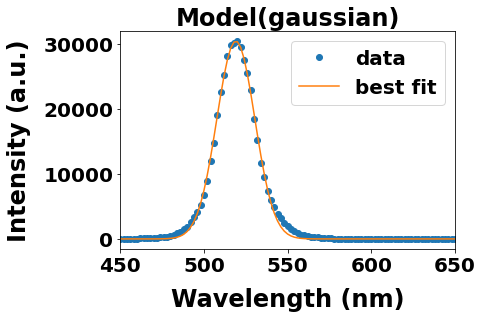

{'amplitude': 219561.45663153878, 'center': 517.246454742699, 'sigma': 11.723514262120593, 'fwhm': 27.606765854726817, 'height': 7471.50986824426}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 2200257.57
    reduced chi-square = 22451.6079
    Akaike info crit   = 1014.88541
    Bayesian info crit = 1022.73077
    R-squared          = 0.99512310
[[Variables]]
    amplitude:  219561.457 +/- 1673.08330 (0.76%) (init = 270576)
    center:     517.246455 +/- 0.10315505 (0.02%) (init = 518)
    sigma:      11.7235143 +/- 0.10315504 (0.88%) (init = 12)
    fwhm:       27.6067659 +/- 0.24291156 (0.88%) == '2.3548200*sigma'
    height:     7471.50987 +/- 56.9339150 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


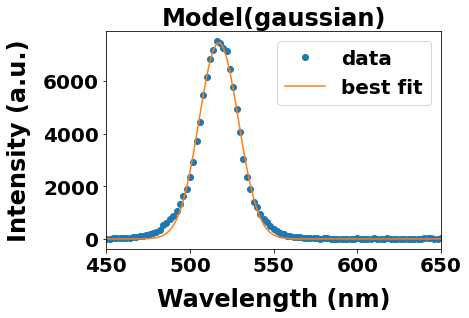

{'amplitude': 168950.5022225144, 'center': 517.7714264439743, 'sigma': 11.413631632497916, 'fwhm': 26.877048040838744, 'height': 5905.35108482855}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1066624.71
    reduced chi-square = 10883.9256
    Akaike info crit   = 941.753812
    Bayesian info crit = 949.599173
    R-squared          = 0.99614353
[[Variables]]
    amplitude:  168950.502 +/- 1149.39186 (0.68%) (init = 213516)
    center:     517.771426 +/- 0.08966071 (0.02%) (init = 518)
    sigma:      11.4136316 +/- 0.08966071 (0.79%) (init = 12)
    fwhm:       26.8770480 +/- 0.21113483 (0.79%) == '2.3548200*sigma'
    height:     5905.35108 +/- 40.1748775 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


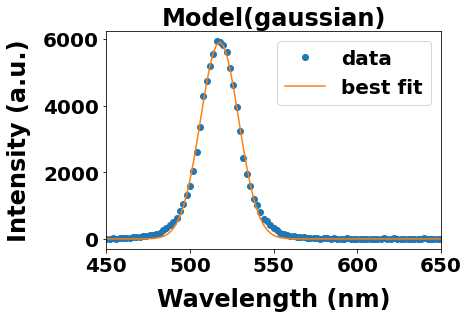

{'amplitude': 118847.64885633173, 'center': 513.9738555988876, 'sigma': 13.202813653404158, 'fwhm': 31.090249647309182, 'height': 3591.1553119673463}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 604260.083
    reduced chi-square = 6165.91922
    Akaike info crit   = 884.360586
    Bayesian info crit = 892.205948
    R-squared          = 0.99468160
[[Variables]]
    amplitude:  118847.649 +/- 930.456704 (0.78%) (init = 153132)
    center:     513.973856 +/- 0.11935548 (0.02%) (init = 514)
    sigma:      13.2028137 +/- 0.11935548 (0.90%) (init = 14)
    fwhm:       31.0902496 +/- 0.28106066 (0.90%) == '2.3548200*sigma'
    height:     3591.15531 +/- 28.1151479 (0.78%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


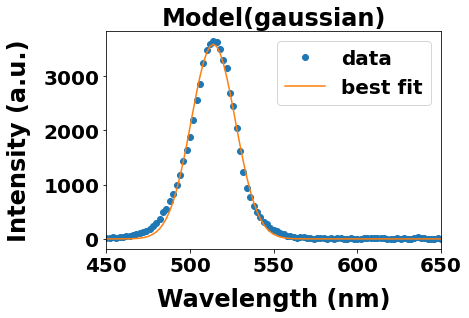

{'amplitude': 105934.2532130243, 'center': 512.7544843963894, 'sigma': 13.254347722023603, 'fwhm': 31.211603102775623, 'height': 3188.512593144344}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 384352.397
    reduced chi-square = 3921.96323
    Akaike info crit   = 838.663654
    Bayesian info crit = 846.509016
    R-squared          = 0.99573201
[[Variables]]
    amplitude:  105934.253 +/- 743.522960 (0.70%) (init = 135282)
    center:     512.754484 +/- 0.10742022 (0.02%) (init = 514)
    sigma:      13.2543477 +/- 0.10742022 (0.81%) (init = 14)
    fwhm:       31.2116031 +/- 0.25295529 (0.81%) == '2.3548200*sigma'
    height:     3188.51259 +/- 22.3792918 (0.70%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


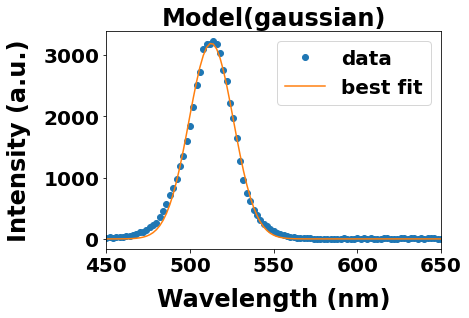

{'amplitude': 56194.10840923602, 'center': 513.2276544047107, 'sigma': 13.256945196674467, 'fwhm': 31.21771968803297, 'height': 1691.0537474993573}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 143965.522
    reduced chi-square = 1469.03594
    Akaike info crit   = 739.483069
    Bayesian info crit = 747.328430
    R-squared          = 0.99429498
[[Variables]]
    amplitude:  56194.1084 +/- 455.094707 (0.81%) (init = 73122)
    center:     513.227654 +/- 0.12397228 (0.02%) (init = 514)
    sigma:      13.2569452 +/- 0.12397228 (0.94%) (init = 14)
    fwhm:       31.2177197 +/- 0.29193239 (0.94%) == '2.3548200*sigma'
    height:     1691.05375 +/- 13.6952166 (0.81%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


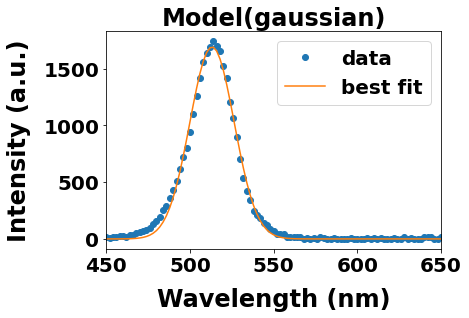

{'amplitude': 69518.76757898788, 'center': 512.5406608243035, 'sigma': 13.448867715869522, 'fwhm': 31.66966267468387, 'height': 2062.1793311567085}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 190543.856
    reduced chi-square = 1944.32507
    Akaike info crit   = 767.794232
    Bayesian info crit = 775.639593
    R-squared          = 0.99496692
[[Variables]]
    amplitude:  69518.7676 +/- 527.340668 (0.76%) (init = 90300)
    center:     512.540661 +/- 0.11779996 (0.02%) (init = 512)
    sigma:      13.4488677 +/- 0.11779996 (0.88%) (init = 14)
    fwhm:       31.6696627 +/- 0.27739771 (0.88%) == '2.3548200*sigma'
    height:     2062.17933 +/- 15.6428615 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


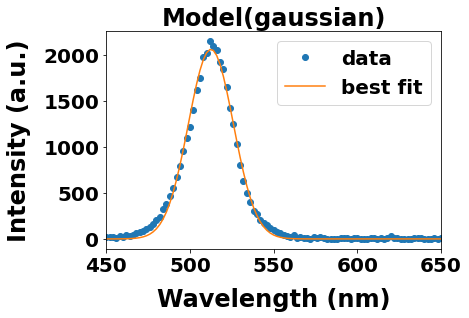

{'amplitude': 124065.52929836302, 'center': 512.5450761877496, 'sigma': 13.50326441696258, 'fwhm': 31.797757114351825, 'height': 3665.409050779717}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 594210.389
    reduced chi-square = 6063.37131
    Akaike info crit   = 882.666689
    Bayesian info crit = 890.512051
    R-squared          = 0.99506006
[[Variables]]
    amplitude:  124065.529 +/- 933.127099 (0.75%) (init = 168525)
    center:     512.545076 +/- 0.11727327 (0.02%) (init = 513)
    sigma:      13.5032644 +/- 0.11727327 (0.87%) (init = 15)
    fwhm:       31.7977571 +/- 0.27615744 (0.87%) == '2.3548200*sigma'
    height:     3665.40905 +/- 27.5684869 (0.75%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


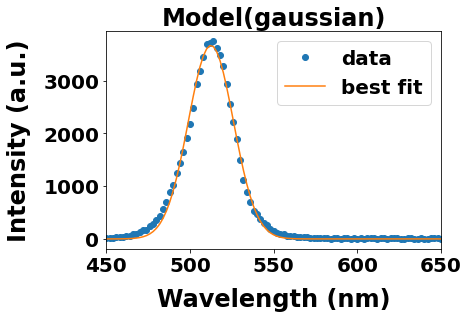

{'amplitude': 147479.23506077434, 'center': 513.5542816275654, 'sigma': 13.175142090533587, 'fwhm': 31.025088097630302, 'height': 4465.6600158915735}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 829536.249
    reduced chi-square = 8464.65560
    Akaike info crit   = 916.363659
    Bayesian info crit = 924.209020
    R-squared          = 0.99526819
[[Variables]]
    amplitude:  147479.235 +/- 1089.04565 (0.74%) (init = 191982)
    center:     513.554282 +/- 0.11234159 (0.02%) (init = 514)
    sigma:      13.1751421 +/- 0.11234159 (0.85%) (init = 14)
    fwhm:       31.0250881 +/- 0.26454423 (0.85%) == '2.3548200*sigma'
    height:     4465.66002 +/- 32.9762549 (0.74%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


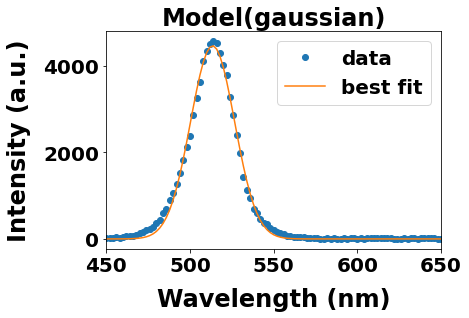

{'amplitude': 183332.19161179508, 'center': 513.2322577196298, 'sigma': 13.1506729625821, 'fwhm': 30.96746770574758, 'height': 5561.613948864378}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1110524.43
    reduced chi-square = 11331.8819
    Akaike info crit   = 945.827463
    Bayesian info crit = 953.672824
    R-squared          = 0.99591110
[[Variables]]
    amplitude:  183332.192 +/- 1258.89246 (0.69%) (init = 238266)
    center:     513.232258 +/- 0.10427202 (0.02%) (init = 514)
    sigma:      13.1506730 +/- 0.10427202 (0.79%) (init = 14)
    fwhm:       30.9674677 +/- 0.24554183 (0.79%) == '2.3548200*sigma'
    height:     5561.61395 +/- 38.1901259 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


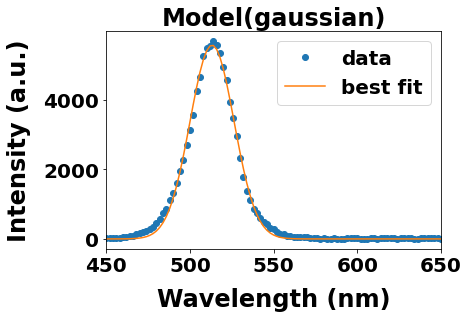

{'amplitude': 110493.44994054265, 'center': 512.45065704775, 'sigma': 13.617336703588839, 'fwhm': 32.06637681634507, 'height': 3237.087546098318}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 478834.485
    reduced chi-square = 4886.06617
    Akaike info crit   = 860.862965
    Bayesian info crit = 868.708327
    R-squared          = 0.99493548
[[Variables]]
    amplitude:  110493.450 +/- 841.181185 (0.76%) (init = 141624)
    center:     512.450657 +/- 0.11970582 (0.02%) (init = 512)
    sigma:      13.6173367 +/- 0.11970582 (0.88%) (init = 14)
    fwhm:       32.0663768 +/- 0.28188566 (0.88%) == '2.3548200*sigma'
    height:     3237.08755 +/- 24.6438140 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


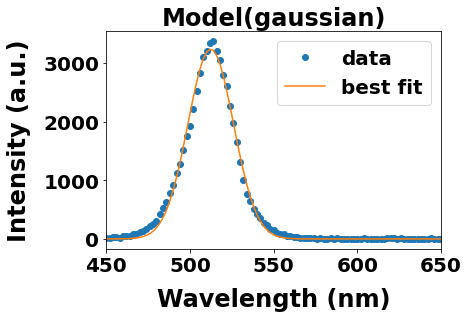

{'amplitude': 69979.69639073715, 'center': 513.8760452979218, 'sigma': 12.87613934089818, 'fwhm': 30.32099044273385, 'height': 2168.185687673287}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 179221.666
    reduced chi-square = 1828.79251
    Akaike info crit   = 761.607074
    Bayesian info crit = 769.452436
    R-squared          = 0.99557322
[[Variables]]
    amplitude:  69979.6964 +/- 500.424968 (0.72%) (init = 93828)
    center:     513.876045 +/- 0.10632191 (0.02%) (init = 514)
    sigma:      12.8761393 +/- 0.10632191 (0.83%) (init = 14)
    fwhm:       30.3209904 +/- 0.25036896 (0.83%) == '2.3548200*sigma'
    height:     2168.18569 +/- 15.5047203 (0.72%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


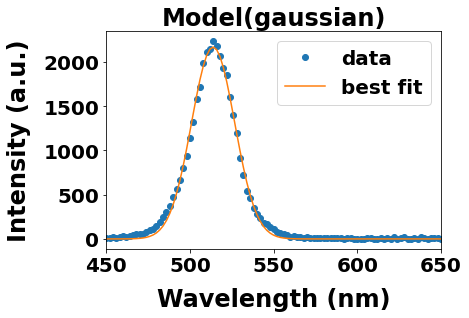

{'amplitude': 98057.62596590759, 'center': 514.2854359186421, 'sigma': 12.915640916667721, 'fwhm': 30.414009543387486, 'height': 3028.834193190919}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 364437.478
    reduced chi-square = 3718.74978
    Akaike info crit   = 833.289967
    Bayesian info crit = 841.135328
    R-squared          = 0.99542577
[[Variables]]
    amplitude:  98057.6260 +/- 714.692005 (0.73%) (init = 122928)
    center:     514.285436 +/- 0.10869818 (0.02%) (init = 515)
    sigma:      12.9156409 +/- 0.10869818 (0.84%) (init = 13)
    fwhm:       30.4140095 +/- 0.25596464 (0.84%) == '2.3548200*sigma'
    height:     3028.83419 +/- 22.0756060 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


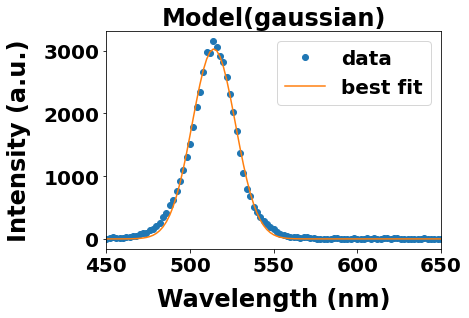

{'amplitude': 829376.0469994224, 'center': 521.0441182011783, 'sigma': 10.908683216878833, 'fwhm': 25.687985412770615, 'height': 30331.175741074123}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 25060242.4
    reduced chi-square = 255716.759
    Akaike info crit   = 1260.58894
    Bayesian info crit = 1268.43430
    R-squared          = 0.99647404
[[Variables]]
    amplitude:  829376.047 +/- 5446.64545 (0.66%) (init = 1016532)
    center:     521.044118 +/- 0.08272172 (0.02%) (init = 521)
    sigma:      10.9086832 +/- 0.08272172 (0.76%) (init = 11)
    fwhm:       25.6879854 +/- 0.19479477 (0.76%) == '2.3548200*sigma'
    height:     30331.1757 +/- 199.189768 (0.66%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


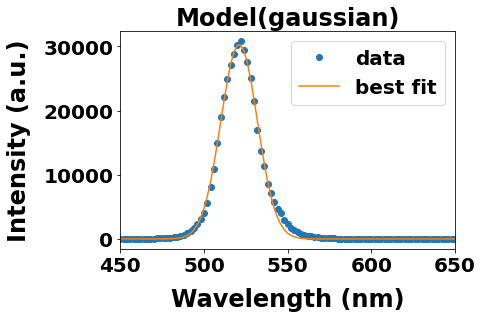

{'amplitude': 767701.7507838138, 'center': 519.4237793081674, 'sigma': 10.975016723116596, 'fwhm': 25.844188879929423, 'height': 27905.98956688877}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 17373493.7
    reduced chi-square = 177280.548
    Akaike info crit   = 1223.58891
    Bayesian info crit = 1231.43427
    R-squared          = 0.99712201
[[Variables]]
    amplitude:  767701.751 +/- 4548.79163 (0.59%) (init = 915816)
    center:     519.423779 +/- 0.07508927 (0.01%) (init = 519)
    sigma:      10.9750167 +/- 0.07508927 (0.68%) (init = 11)
    fwhm:       25.8441889 +/- 0.17682172 (0.68%) == '2.3548200*sigma'
    height:     27905.9896 +/- 165.348711 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


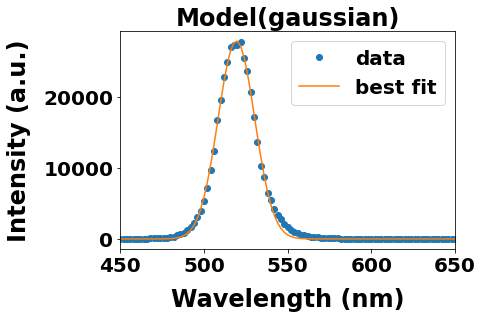

{'amplitude': 305883.2332092503, 'center': 517.9448324255537, 'sigma': 11.363132579201363, 'fwhm': 26.758131860154954, 'height': 10739.095028363328}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 2778778.70
    reduced chi-square = 28354.8847
    Akaike info crit   = 1038.46256
    Bayesian info crit = 1046.30792
    R-squared          = 0.99696274
[[Variables]]
    amplitude:  305883.233 +/- 1851.09117 (0.61%) (init = 384192)
    center:     517.944832 +/- 0.07940381 (0.02%) (init = 518)
    sigma:      11.3631326 +/- 0.07940380 (0.70%) (init = 12)
    fwhm:       26.7581319 +/- 0.18698166 (0.70%) == '2.3548200*sigma'
    height:     10739.0950 +/- 64.9891660 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


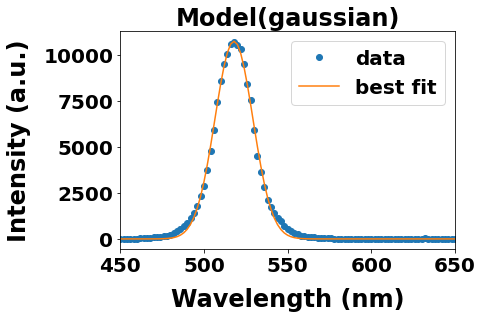

{'amplitude': 110621.1499449718, 'center': 514.7106753207622, 'sigma': 12.648061023397311, 'fwhm': 29.78390705911646, 'height': 3489.1874656561445}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 618024.911
    reduced chi-square = 6306.37664
    Akaike info crit   = 886.635516
    Bayesian info crit = 894.480878
    R-squared          = 0.99404956
[[Variables]]
    amplitude:  110621.150 +/- 921.012448 (0.83%) (init = 141258)
    center:     514.710675 +/- 0.12159651 (0.02%) (init = 515)
    sigma:      12.6480610 +/- 0.12159651 (0.96%) (init = 13)
    fwhm:       29.7839071 +/- 0.28633790 (0.96%) == '2.3548200*sigma'
    height:     3489.18747 +/- 29.0503887 (0.83%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


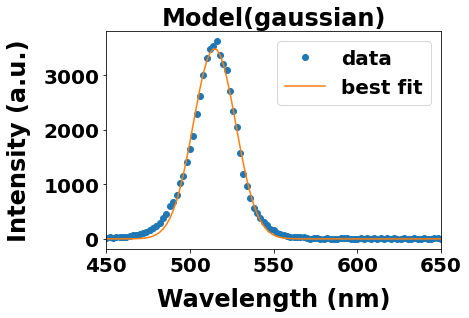

{'amplitude': 122627.49412090876, 'center': 513.6284075029577, 'sigma': 13.178307824394354, 'fwhm': 31.032542831040313, 'height': 3712.2592065480258}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 689505.129
    reduced chi-square = 7035.76662
    Akaike info crit   = 897.689499
    Bayesian info crit = 905.534860
    R-squared          = 0.99431572
[[Variables]]
    amplitude:  122627.494 +/- 993.000894 (0.81%) (init = 160734)
    center:     513.628408 +/- 0.12322301 (0.02%) (init = 514)
    sigma:      13.1783078 +/- 0.12322301 (0.94%) (init = 14)
    fwhm:       31.0325428 +/- 0.29016800 (0.94%) == '2.3548200*sigma'
    height:     3712.25921 +/- 30.0608141 (0.81%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


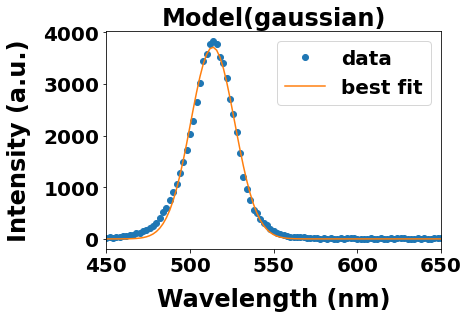

{'amplitude': 193520.3195264492, 'center': 514.1336568897857, 'sigma': 13.035485832998985, 'fwhm': 30.69622274926267, 'height': 5922.5595699071}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1553341.24
    reduced chi-square = 15850.4208
    Akaike info crit   = 979.720627
    Bayesian info crit = 987.565989
    R-squared          = 0.99493668
[[Variables]]
    amplitude:  193520.320 +/- 1482.33609 (0.77%) (init = 235677)
    center:     514.133657 +/- 0.11529654 (0.02%) (init = 515)
    sigma:      13.0354858 +/- 0.11529654 (0.88%) (init = 13)
    fwhm:       30.6962227 +/- 0.27150260 (0.88%) == '2.3548200*sigma'
    height:     5922.55957 +/- 45.3658723 (0.77%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


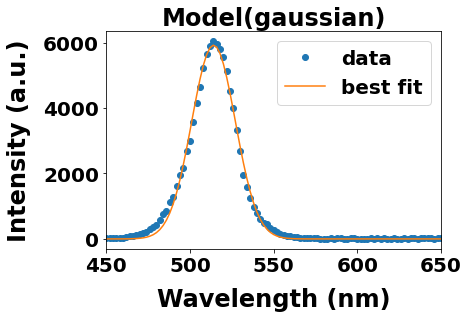

{'amplitude': 53195.61934957001, 'center': 515.136750203913, 'sigma': 12.428758462371384, 'fwhm': 29.267489002361383, 'height': 1707.4901565987027}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 112794.824
    reduced chi-square = 1150.96759
    Akaike info crit   = 714.838726
    Bayesian info crit = 722.684088
    R-squared          = 0.99537697
[[Variables]]
    amplitude:  53195.6193 +/- 390.039860 (0.73%) (init = 67314)
    center:     515.136750 +/- 0.10522785 (0.02%) (init = 515)
    sigma:      12.4287585 +/- 0.10522785 (0.85%) (init = 13)
    fwhm:       29.2674890 +/- 0.24779265 (0.85%) == '2.3548200*sigma'
    height:     1707.49016 +/- 12.5196343 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


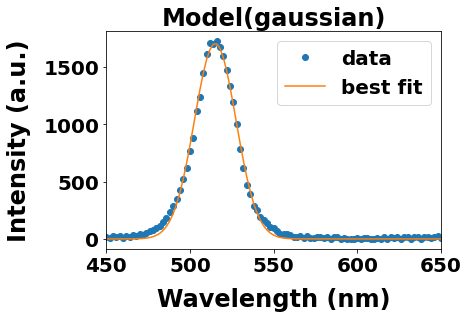

{'amplitude': 106583.23552904424, 'center': 514.5487769202224, 'sigma': 12.975577162011863, 'fwhm': 30.555148612648775, 'height': 3276.9687692879334}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 634369.609
    reduced chi-square = 6473.15927
    Akaike info crit   = 889.271919
    Bayesian info crit = 897.117281
    R-squared          = 0.99316595
[[Variables]]
    amplitude:  106583.236 +/- 945.110427 (0.89%) (init = 132717)
    center:     514.548777 +/- 0.13285799 (0.03%) (init = 515)
    sigma:      12.9755772 +/- 0.13285799 (1.02%) (init = 13)
    fwhm:       30.5551486 +/- 0.31285666 (1.02%) == '2.3548200*sigma'
    height:     3276.96877 +/- 29.0579255 (0.89%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


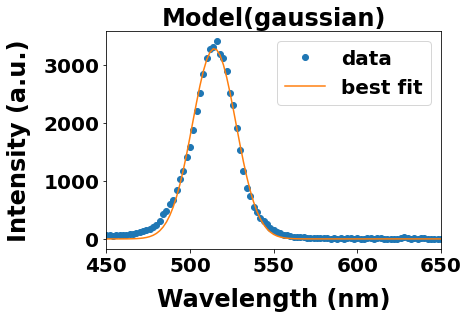

{'amplitude': 56828.085885907996, 'center': 515.6560044657608, 'sigma': 12.598083772025959, 'fwhm': 29.66621962804217, 'height': 1799.5694978837103}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 165112.917
    reduced chi-square = 1684.82568
    Akaike info crit   = 753.325699
    Bayesian info crit = 761.171061
    R-squared          = 0.99397111
[[Variables]]
    amplitude:  56828.0859 +/- 475.106851 (0.84%) (init = 67572)
    center:     515.656004 +/- 0.12161876 (0.02%) (init = 516)
    sigma:      12.5980838 +/- 0.12161877 (0.97%) (init = 12)
    fwhm:       29.6662196 +/- 0.28639031 (0.97%) == '2.3548200*sigma'
    height:     1799.56950 +/- 15.0451275 (0.84%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


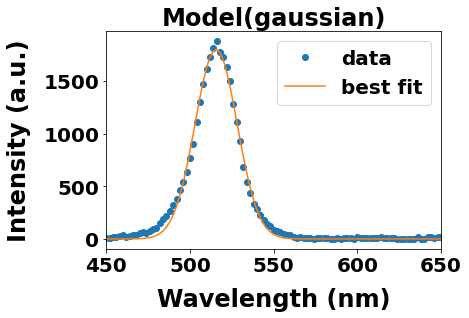

{'amplitude': 50663.244086755076, 'center': 514.468842161966, 'sigma': 13.130981392330638, 'fwhm': 30.921097602288032, 'height': 1539.2384253347925}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 154858.745
    reduced chi-square = 1580.19128
    Akaike info crit   = 746.849963
    Bayesian info crit = 754.695324
    R-squared          = 0.99252684
[[Variables]]
    amplitude:  50663.2441 +/- 469.748531 (0.93%) (init = 62088)
    center:     514.468842 +/- 0.14058465 (0.03%) (init = 515)
    sigma:      13.1309814 +/- 0.14058465 (1.07%) (init = 13)
    fwhm:       30.9210976 +/- 0.33105155 (1.07%) == '2.3548200*sigma'
    height:     1539.23843 +/- 14.2717626 (0.93%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


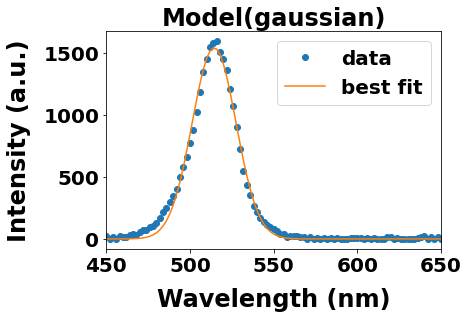

{'amplitude': 148992.96635343242, 'center': 511.9387563708782, 'sigma': 13.556475170137471, 'fwhm': 31.923058860143122, 'height': 4384.590827252494}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 812637.783
    reduced chi-square = 8292.22228
    Akaike info crit   = 914.284944
    Bayesian info crit = 922.130306
    R-squared          = 0.99531477
[[Variables]]
    amplitude:  148992.966 +/- 1093.38283 (0.73%) (init = 186228)
    center:     511.938756 +/- 0.11487431 (0.02%) (init = 512)
    sigma:      13.5564752 +/- 0.11487432 (0.85%) (init = 14)
    fwhm:       31.9230589 +/- 0.27050834 (0.85%) == '2.3548200*sigma'
    height:     4384.59083 +/- 32.1762739 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


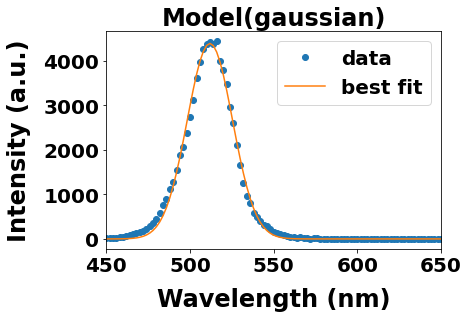

{'amplitude': 100874.96365159481, 'center': 512.5616661982932, 'sigma': 13.244937147796698, 'fwhm': 31.189442894374622, 'height': 3038.3904100502373}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 333994.152
    reduced chi-square = 3408.10359
    Akaike info crit   = 824.479583
    Bayesian info crit = 832.324944
    R-squared          = 0.99591106
[[Variables]]
    amplitude:  100874.964 +/- 692.857828 (0.69%) (init = 121056)
    center:     512.561666 +/- 0.10504604 (0.02%) (init = 513)
    sigma:      13.2449371 +/- 0.10504604 (0.79%) (init = 13)
    fwhm:       31.1894429 +/- 0.24736453 (0.79%) == '2.3548200*sigma'
    height:     3038.39041 +/- 20.8691185 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


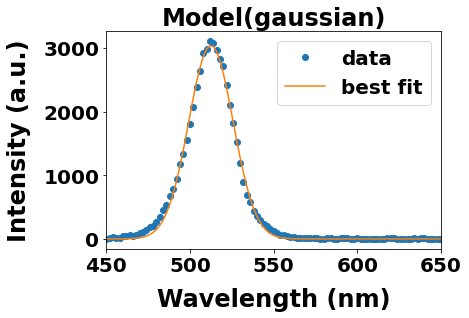

{'amplitude': 79827.25345612908, 'center': 511.67991891098035, 'sigma': 13.554126648887099, 'fwhm': 31.91752851533232, 'height': 2349.5772853122876}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 226507.733
    reduced chi-square = 2311.30340
    Akaike info crit   = 785.256799
    Bayesian info crit = 793.102160
    R-squared          = 0.99542676
[[Variables]]
    amplitude:  79827.2535 +/- 577.201714 (0.72%) (init = 101682)
    center:     511.679919 +/- 0.11316643 (0.02%) (init = 512)
    sigma:      13.5541266 +/- 0.11316643 (0.83%) (init = 14)
    fwhm:       31.9175285 +/- 0.26648657 (0.83%) == '2.3548200*sigma'
    height:     2349.57729 +/- 16.9889426 (0.72%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


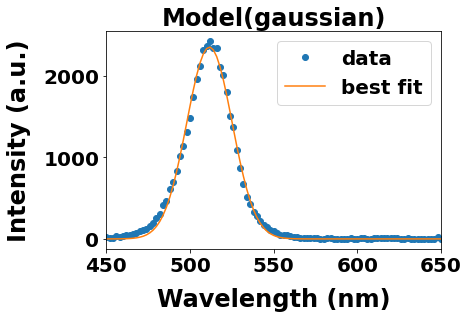

{'amplitude': 41014.367186201125, 'center': 511.8564879318713, 'sigma': 13.531271897881178, 'fwhm': 31.863709690568555, 'height': 1209.2260137696103}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 71451.2722
    reduced chi-square = 729.094615
    Akaike info crit   = 668.726698
    Bayesian info crit = 676.572059
    R-squared          = 0.99449397
[[Variables]]
    amplitude:  41014.3672 +/- 323.910318 (0.79%) (init = 51702)
    center:     511.856488 +/- 0.12339489 (0.02%) (init = 512)
    sigma:      13.5312719 +/- 0.12339489 (0.91%) (init = 14)
    fwhm:       31.8637097 +/- 0.29057276 (0.91%) == '2.3548200*sigma'
    height:     1209.22601 +/- 9.54984948 (0.79%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


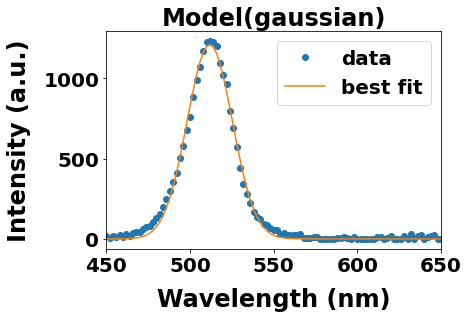

{'amplitude': 36026.28338337272, 'center': 512.3391326885727, 'sigma': 13.305951699835841, 'fwhm': 31.33312118180744, 'height': 1080.148844489779}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 60203.0009
    reduced chi-square = 614.316336
    Akaike info crit   = 651.426053
    Bayesian info crit = 659.271415
    R-squared          = 0.99409570
[[Variables]]
    amplitude:  36026.2834 +/- 294.837826 (0.82%) (init = 47040)
    center:     512.339133 +/- 0.12574194 (0.02%) (init = 512)
    sigma:      13.3059517 +/- 0.12574194 (0.95%) (init = 14)
    fwhm:       31.3331212 +/- 0.29609963 (0.95%) == '2.3548200*sigma'
    height:     1080.14884 +/- 8.83991472 (0.82%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


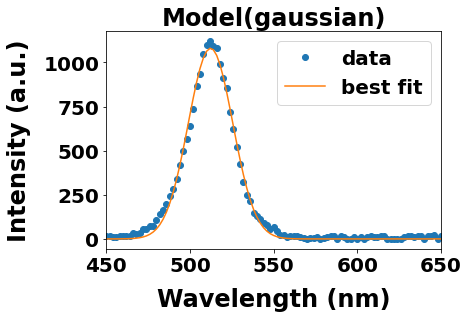

{'amplitude': 46344.887500380835, 'center': 511.73248485241277, 'sigma': 13.417558083869695, 'fwhm': 31.595934127058037, 'height': 1377.9657890857347}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 74184.3396
    reduced chi-square = 756.983057
    Akaike info crit   = 672.517971
    Bayesian info crit = 680.363333
    R-squared          = 0.99560585
[[Variables]]
    amplitude:  46344.8875 +/- 328.657315 (0.71%) (init = 59724)
    center:     511.732485 +/- 0.10987141 (0.02%) (init = 512)
    sigma:      13.4175581 +/- 0.10987141 (0.82%) (init = 14)
    fwhm:       31.5959341 +/- 0.25872740 (0.82%) == '2.3548200*sigma'
    height:     1377.96579 +/- 9.77192563 (0.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


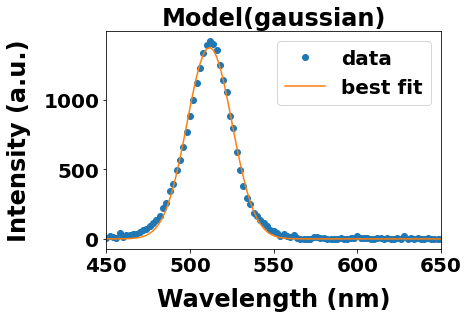

{'amplitude': 36305.381071442505, 'center': 511.77841576581676, 'sigma': 13.52742526816891, 'fwhm': 31.854651569989514, 'height': 1070.6954161557367}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 51481.4759
    reduced chi-square = 525.321183
    Akaike info crit   = 635.619538
    Bayesian info crit = 643.464900
    R-squared          = 0.99492881
[[Variables]]
    amplitude:  36305.3811 +/- 274.905519 (0.76%) (init = 45990)
    center:     511.778416 +/- 0.11827618 (0.02%) (init = 512)
    sigma:      13.5274253 +/- 0.11827619 (0.87%) (init = 14)
    fwhm:       31.8546516 +/- 0.27851913 (0.87%) == '2.3548200*sigma'
    height:     1070.69542 +/- 8.10734456 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


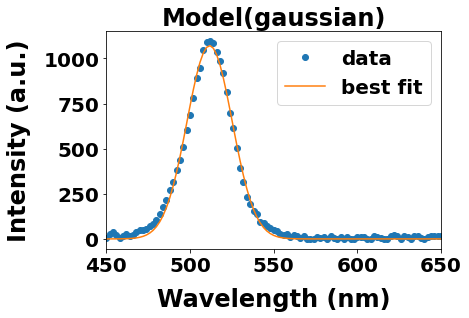

{'amplitude': 35089.54870452569, 'center': 511.0161813782476, 'sigma': 13.877906861824224, 'fwhm': 32.67997263636092, 'height': 1008.7043677064567}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 45323.0595
    reduced chi-square = 462.480199
    Akaike info crit   = 622.751521
    Bayesian info crit = 630.596883
    R-squared          = 0.99504994
[[Variables]]
    amplitude:  35089.5487 +/- 261.259681 (0.74%) (init = 47025)
    center:     511.016181 +/- 0.11931325 (0.02%) (init = 511)
    sigma:      13.8779069 +/- 0.11931326 (0.86%) (init = 15)
    fwhm:       32.6799726 +/- 0.28096124 (0.86%) == '2.3548200*sigma'
    height:     1008.70437 +/- 7.51032967 (0.74%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


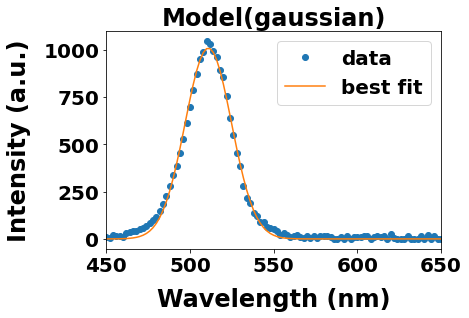

{'amplitude': 60521.79443525622, 'center': 513.4290993199779, 'sigma': 13.01719912281711, 'fwhm': 30.653160838392186, 'height': 1854.8309543645557}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 137886.302
    reduced chi-square = 1407.00308
    Akaike info crit   = 735.125485
    Bayesian info crit = 742.970847
    R-squared          = 0.99538670
[[Variables]]
    amplitude:  60521.7944 +/- 441.337293 (0.73%) (init = 73593)
    center:     513.429099 +/- 0.10960919 (0.02%) (init = 513)
    sigma:      13.0171991 +/- 0.10960919 (0.84%) (init = 13)
    fwhm:       30.6531608 +/- 0.25810991 (0.84%) == '2.3548200*sigma'
    height:     1854.83095 +/- 13.5258316 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


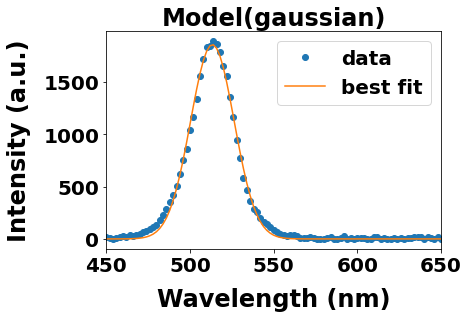

{'amplitude': 43595.63189004038, 'center': 511.3973156340478, 'sigma': 13.752329693187555, 'fwhm': 32.38426100811192, 'height': 1264.668753889862}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 62575.4933
    reduced chi-square = 638.525442
    Akaike info crit   = 655.329857
    Bayesian info crit = 663.175218
    R-squared          = 0.99566287
[[Variables]]
    amplitude:  43595.6319 +/- 305.591395 (0.70%) (init = 58230)
    center:     511.397316 +/- 0.11131266 (0.02%) (init = 511)
    sigma:      13.7523297 +/- 0.11131266 (0.81%) (init = 15)
    fwhm:       32.3842610 +/- 0.26212128 (0.81%) == '2.3548200*sigma'
    height:     1264.66875 +/- 8.86493254 (0.70%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


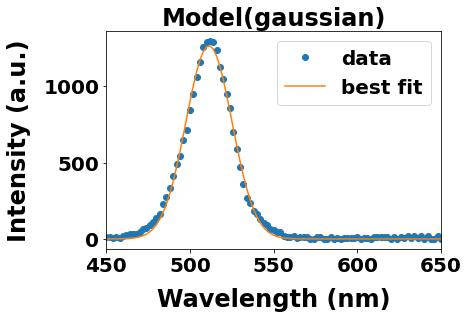

{'amplitude': 1168478.8301412335, 'center': 520.9454674553098, 'sigma': 11.118373154033932, 'fwhm': 26.181767470582187, 'height': 41926.604327785484}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 41539384.4
    reduced chi-square = 423871.269
    Akaike info crit   = 1311.63024
    Bayesian info crit = 1319.47560
    R-squared          = 0.99698440
[[Variables]]
    amplitude:  1168478.83 +/- 7079.47190 (0.61%) (init = 1518264)
    center:     520.945467 +/- 0.07778409 (0.01%) (init = 520)
    sigma:      11.1183732 +/- 0.07778409 (0.70%) (init = 12)
    fwhm:       26.1817675 +/- 0.18316753 (0.70%) == '2.3548200*sigma'
    height:     41926.6043 +/- 254.021108 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


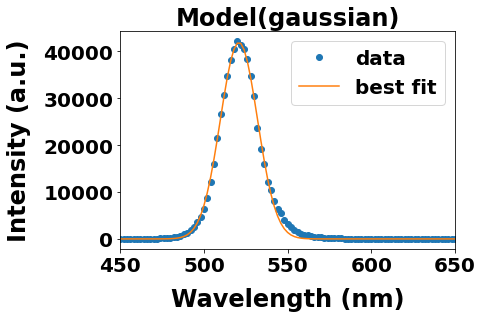

{'amplitude': 630543.0741522603, 'center': 516.6590465073671, 'sigma': 11.466570962292634, 'fwhm': 27.00171063342594, 'height': 21937.70963251233}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 9629222.75
    reduced chi-square = 98257.3750
    Akaike info crit   = 1163.98445
    Bayesian info crit = 1171.82981
    R-squared          = 0.99749715
[[Variables]]
    amplitude:  630543.074 +/- 3461.49494 (0.55%) (init = 785772)
    center:     516.659047 +/- 0.07268639 (0.01%) (init = 516)
    sigma:      11.4665710 +/- 0.07268639 (0.63%) (init = 12)
    fwhm:       27.0017106 +/- 0.17116337 (0.63%) == '2.3548200*sigma'
    height:     21937.7096 +/- 120.431765 (0.55%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


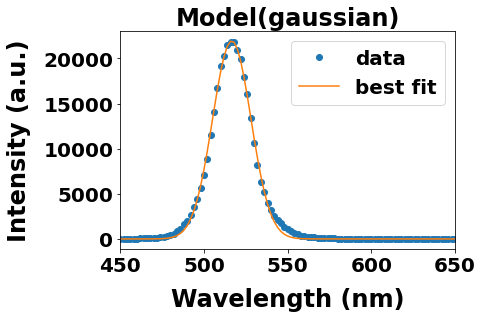

{'amplitude': 181777.65168695425, 'center': 514.4156334220185, 'sigma': 12.181860862870934, 'fwhm': 28.686089597105735, 'height': 5953.014508121849}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1028521.82
    reduced chi-square = 10495.1206
    Akaike info crit   = 938.079782
    Bayesian info crit = 945.925143
    R-squared          = 0.99652053
[[Variables]]
    amplitude:  181777.652 +/- 1166.04151 (0.64%) (init = 234741)
    center:     514.415633 +/- 0.09023124 (0.02%) (init = 515)
    sigma:      12.1818609 +/- 0.09023124 (0.74%) (init = 13)
    fwhm:       28.6860896 +/- 0.21247832 (0.74%) == '2.3548200*sigma'
    height:     5953.01451 +/- 38.1865762 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


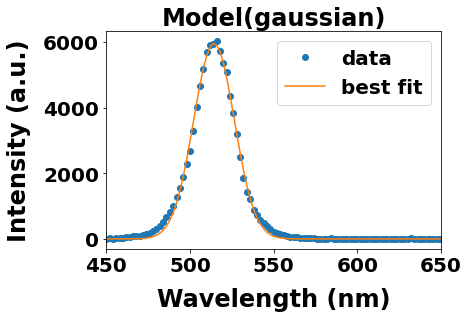

{'amplitude': 123327.89872456463, 'center': 511.95644846522623, 'sigma': 13.577181209719676, 'fwhm': 31.97181785627209, 'height': 3623.779841438878}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 458024.128
    reduced chi-square = 4673.71559
    Akaike info crit   = 856.375219
    Bayesian info crit = 864.220581
    R-squared          = 0.99612504
[[Variables]]
    amplitude:  123327.899 +/- 821.486798 (0.67%) (init = 155064)
    center:     511.956448 +/- 0.10442868 (0.02%) (init = 512)
    sigma:      13.5771812 +/- 0.10442868 (0.77%) (init = 14)
    fwhm:       31.9718179 +/- 0.24591074 (0.77%) == '2.3548200*sigma'
    height:     3623.77984 +/- 24.1380445 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


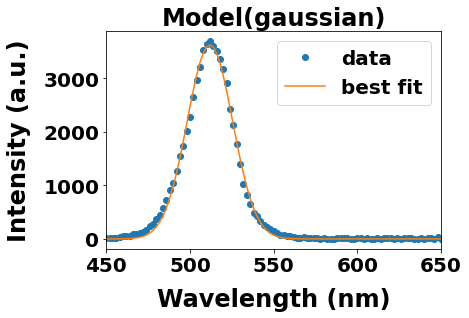

{'amplitude': 72848.81740290605, 'center': 511.9703393728873, 'sigma': 13.79417164130268, 'fwhm': 32.48279126437238, 'height': 2106.8662564685033}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 240154.311
    reduced chi-square = 2450.55419
    Akaike info crit   = 791.165561
    Bayesian info crit = 799.010922
    R-squared          = 0.99404403
[[Variables]]
    amplitude:  72848.8174 +/- 599.576735 (0.82%) (init = 91182)
    center:     511.970339 +/- 0.13109585 (0.03%) (init = 512)
    sigma:      13.7941716 +/- 0.13109586 (0.95%) (init = 14)
    fwhm:       32.4827913 +/- 0.30870714 (0.95%) == '2.3548200*sigma'
    height:     2106.86626 +/- 17.3404499 (0.82%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


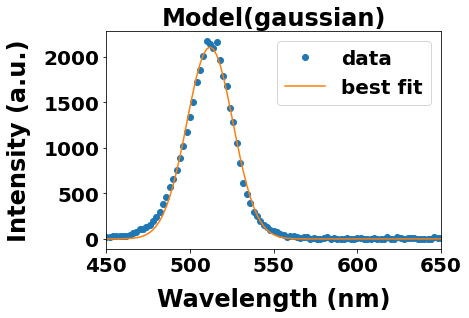

{'amplitude': 114493.21609049653, 'center': 512.9215915616098, 'sigma': 13.07997109851906, 'fwhm': 30.800977542214653, 'height': 3492.0709394160085}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 548406.440
    reduced chi-square = 5595.98408
    Akaike info crit   = 874.564797
    Bayesian info crit = 882.410158
    R-squared          = 0.99487412
[[Variables]]
    amplitude:  114493.216 +/- 882.274651 (0.77%) (init = 139152)
    center:     512.921592 +/- 0.11638561 (0.02%) (init = 513)
    sigma:      13.0799711 +/- 0.11638561 (0.89%) (init = 13)
    fwhm:       30.8009775 +/- 0.27406717 (0.89%) == '2.3548200*sigma'
    height:     3492.07094 +/- 26.9095542 (0.77%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


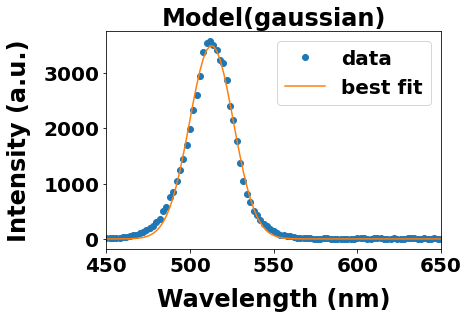

{'amplitude': 103012.6011728542, 'center': 512.1184141742865, 'sigma': 13.69606126705558, 'fwhm': 32.25175899288782, 'height': 3000.576825669831}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 394180.860
    reduced chi-square = 4022.25367
    Akaike info crit   = 841.213905
    Bayesian info crit = 849.059266
    R-squared          = 0.99516976
[[Variables]]
    amplitude:  103012.601 +/- 765.413261 (0.74%) (init = 130326)
    center:     512.118414 +/- 0.11750896 (0.02%) (init = 512)
    sigma:      13.6960613 +/- 0.11750897 (0.86%) (init = 14)
    fwhm:       32.2517590 +/- 0.27671246 (0.86%) == '2.3548200*sigma'
    height:     3000.57683 +/- 22.2951597 (0.74%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


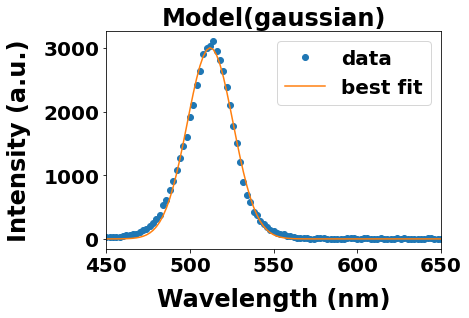

{'amplitude': 190257.08497528403, 'center': 513.7506553811347, 'sigma': 13.341076866355486, 'fwhm': 31.415834626431227, 'height': 5689.315775006853}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 2231655.64
    reduced chi-square = 22771.9964
    Akaike info crit   = 1016.31651
    Bayesian info crit = 1024.16187
    R-squared          = 0.99223993
[[Variables]]
    amplitude:  190257.085 +/- 1797.46654 (0.94%) (init = 245070)
    center:     513.750655 +/- 0.14553986 (0.03%) (init = 514)
    sigma:      13.3410769 +/- 0.14553986 (1.09%) (init = 14)
    fwhm:       31.4158346 +/- 0.34272017 (1.09%) == '2.3548200*sigma'
    height:     5689.31578 +/- 53.7503325 (0.94%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


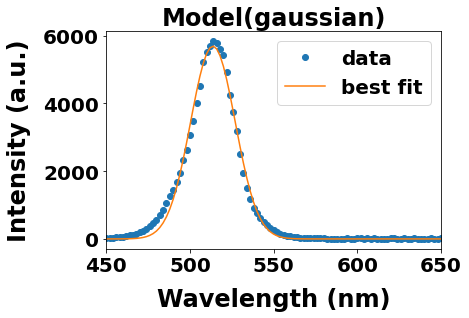

{'amplitude': 65642.05595667234, 'center': 508.7826969010862, 'sigma': 15.314516779160702, 'fwhm': 36.0629304019032, 'height': 1709.9718624957322}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 87083.4279
    reduced chi-square = 888.606408
    Akaike info crit   = 688.709638
    Bayesian info crit = 696.554999
    R-squared          = 0.99696837
[[Variables]]
    amplitude:  65642.0560 +/- 380.426435 (0.58%) (init = 88587)
    center:     508.782697 +/- 0.10248521 (0.02%) (init = 509)
    sigma:      15.3145168 +/- 0.10248560 (0.67%) (init = 17)
    fwhm:       36.0629304 +/- 0.24133513 (0.67%) == '2.3548200*sigma'
    height:     1709.97186 +/- 9.91009241 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


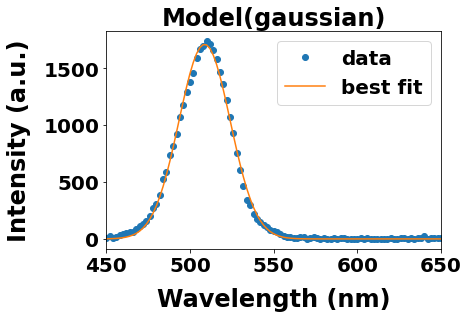

{'amplitude': 125016.74915645977, 'center': 514.0943372799179, 'sigma': 13.149311728879454, 'fwhm': 30.964262245399915, 'height': 3792.93384135561}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 902277.037
    reduced chi-square = 9206.90854
    Akaike info crit   = 924.853194
    Bayesian info crit = 932.698555
    R-squared          = 0.99286655
[[Variables]]
    amplitude:  125016.749 +/- 1134.67151 (0.91%) (init = 155337)
    center:     514.094337 +/- 0.13780754 (0.03%) (init = 515)
    sigma:      13.1493117 +/- 0.13780754 (1.05%) (init = 13)
    fwhm:       30.9642622 +/- 0.32451196 (1.05%) == '2.3548200*sigma'
    height:     3792.93384 +/- 34.4251875 (0.91%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


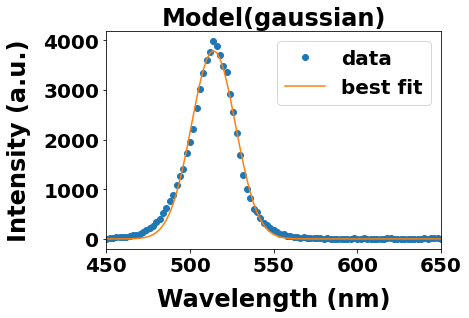

{'amplitude': 84683.99056706495, 'center': 509.7316816325281, 'sigma': 14.195859208832687, 'fwhm': 33.42869318214339, 'height': 2379.850734852507}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 265796.052
    reduced chi-square = 2712.20461
    Akaike info crit   = 801.411769
    Bayesian info crit = 809.257131
    R-squared          = 0.99492247
[[Variables]]
    amplitude:  84683.9906 +/- 639.891015 (0.76%) (init = 111195)
    center:     509.731682 +/- 0.12386156 (0.02%) (init = 509)
    sigma:      14.1958592 +/- 0.12386158 (0.87%) (init = 15)
    fwhm:       33.4286932 +/- 0.29167174 (0.87%) == '2.3548200*sigma'
    height:     2379.85073 +/- 17.9827022 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


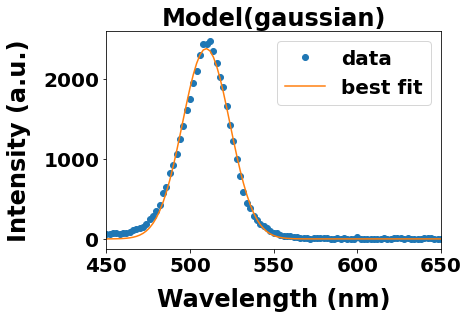

{'amplitude': 65888.15070273768, 'center': 509.6186864009075, 'sigma': 14.164855640946497, 'fwhm': 33.35568536041363, 'height': 1855.6892530632513}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 152543.823
    reduced chi-square = 1556.56962
    Akaike info crit   = 745.328755
    Bayesian info crit = 753.174116
    R-squared          = 0.99520224
[[Variables]]
    amplitude:  65888.1507 +/- 484.231702 (0.73%) (init = 82236)
    center:     509.618686 +/- 0.12020627 (0.02%) (init = 510)
    sigma:      14.1648556 +/- 0.12020630 (0.85%) (init = 14)
    fwhm:       33.3556854 +/- 0.28306419 (0.85%) == '2.3548200*sigma'
    height:     1855.68925 +/- 13.6380087 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


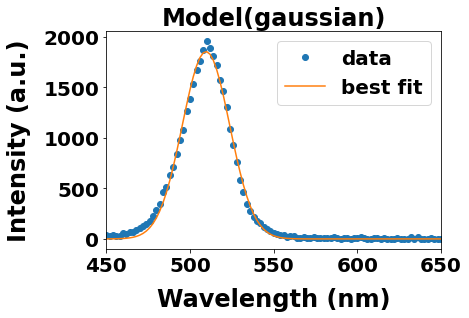

{'amplitude': 40134.005563649065, 'center': 509.872283565658, 'sigma': 13.951984197807501, 'fwhm': 32.85441142868106, 'height': 1147.5896374861895}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 101
    # variables        = 3
    chi-square         = 61317.8704
    reduced chi-square = 625.692555
    Akaike info crit   = 653.279315
    Bayesian info crit = 661.124676
    R-squared          = 0.99489877
[[Variables]]
    amplitude:  40134.0056 +/- 304.692136 (0.76%) (init = 50316)
    center:     509.872284 +/- 0.12230768 (0.02%) (init = 510)
    sigma:      13.9519842 +/- 0.12230769 (0.88%) (init = 14)
    fwhm:       32.8544114 +/- 0.28801261 (0.88%) == '2.3548200*sigma'
    height:     1147.58964 +/- 8.71234632 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


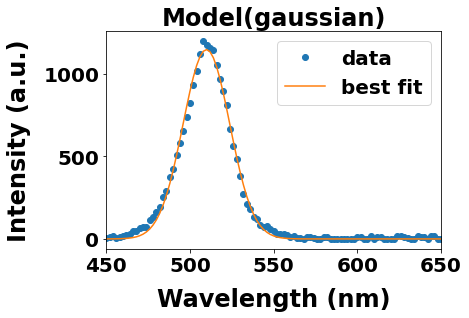

{'amplitude': 29314.890702803226, 'center': 509.41118585958367, 'sigma': 14.083342749973083, 'fwhm': 33.163737174491615, 'height': 830.410090051049}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 28859.5276
    reduced chi-square = 294.484976
    Akaike info crit   = 577.162570
    Bayesian info crit = 585.007931
    R-squared          = 0.99544512
[[Variables]]
    amplitude:  29314.8907 +/- 210.013567 (0.72%) (init = 36540)
    center:     509.411186 +/- 0.11650215 (0.02%) (init = 510)
    sigma:      14.0833427 +/- 0.11650217 (0.83%) (init = 14)
    fwhm:       33.1637372 +/- 0.27434164 (0.83%) == '2.3548200*sigma'
    height:     830.410090 +/- 5.94910353 (0.72%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


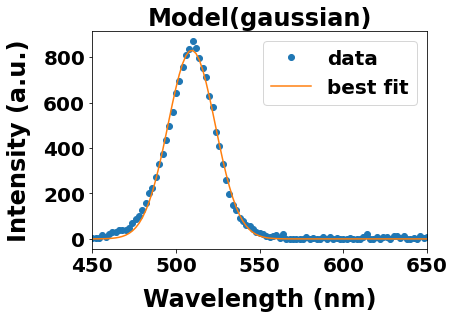

{'amplitude': 18845.03265707523, 'center': 507.56945661054243, 'sigma': 14.602781902051293, 'fwhm': 34.38692287858843, 'height': 514.8389342672178}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 16880.8540
    reduced chi-square = 172.253612
    Akaike info crit   = 523.000299
    Bayesian info crit = 530.845661
    R-squared          = 0.99313118
[[Variables]]
    amplitude:  18845.0327 +/- 163.555728 (0.87%) (init = 23895)
    center:     507.569457 +/- 0.14634368 (0.03%) (init = 507)
    sigma:      14.6027819 +/- 0.14634393 (1.00%) (init = 15)
    fwhm:       34.3869229 +/- 0.34461362 (1.00%) == '2.3548200*sigma'
    height:     514.838934 +/- 4.46828057 (0.87%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


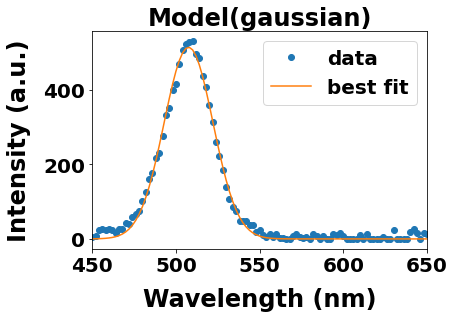

{'amplitude': 9346.908489938964, 'center': 507.55555237212275, 'sigma': 15.023155100922619, 'fwhm': 35.376826094754605, 'height': 248.20865828888202}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 11118.9808
    reduced chi-square = 113.458988
    Akaike info crit   = 480.830128
    Bayesian info crit = 488.675489
    R-squared          = 0.98044691
[[Variables]]
    amplitude:  9346.90849 +/- 134.637140 (1.44%) (init = 11520)
    center:     507.555552 +/- 0.24987792 (0.05%) (init = 507)
    sigma:      15.0231551 +/- 0.24987891 (1.66%) (init = 15)
    fwhm:       35.3768261 +/- 0.58841985 (1.66%) == '2.3548200*sigma'
    height:     248.208658 +/- 3.57531538 (1.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


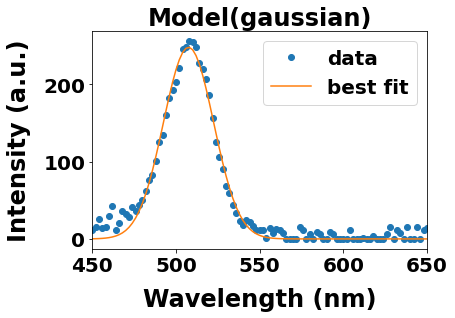

{'amplitude': 7880.785976021945, 'center': 506.5586165866379, 'sigma': 14.976276598765224, 'fwhm': 35.266435660304325, 'height': 209.93061007841942}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 7699.87723
    reduced chi-square = 78.5701758
    Akaike info crit   = 443.717754
    Bayesian info crit = 451.563115
    R-squared          = 0.98089079
[[Variables]]
    amplitude:  7880.78598 +/- 111.864880 (1.42%) (init = 10260)
    center:     506.558617 +/- 0.24546834 (0.05%) (init = 507)
    sigma:      14.9762766 +/- 0.24546976 (1.64%) (init = 15)
    fwhm:       35.2664357 +/- 0.57803711 (1.64%) == '2.3548200*sigma'
    height:     209.930610 +/- 2.97988170 (1.42%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


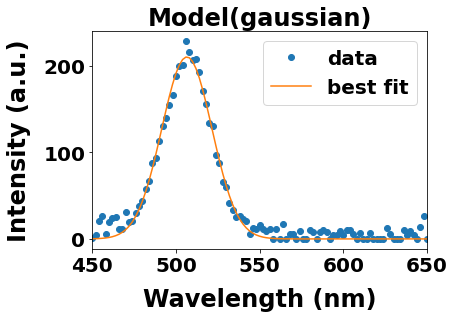

{'amplitude': 3006.966320141337, 'center': 501.90557545483614, 'sigma': 18.33337728866101, 'fwhm': 43.17180350688472, 'height': 65.43290092664293}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 9438.30478
    reduced chi-square = 96.3092324
    Akaike info crit   = 464.278526
    Bayesian info crit = 472.123887
    R-squared          = 0.76090551
[[Variables]]
    amplitude:  3006.96632 +/- 137.127236 (4.56%) (init = 3888)
    center:     501.905575 +/- 0.96489524 (0.19%) (init = 503.1111)
    sigma:      18.3333773 +/- 0.96637085 (5.27%) (init = 18)
    fwhm:       43.1718035 +/- 2.27562939 (5.27%) == '2.3548200*sigma'
    height:     65.4329009 +/- 2.98314974 (4.56%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.578


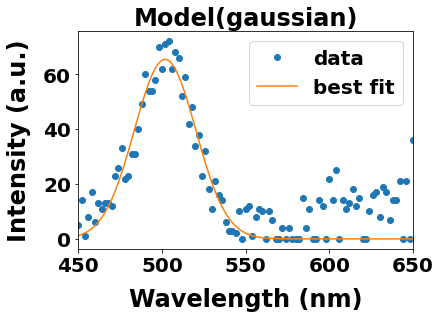

{'amplitude': 7714.386182359533, 'center': 507.28971434272006, 'sigma': 15.112400663186225, 'fwhm': 35.58698332968419, 'height': 203.64699396673265}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 5237.57782
    reduced chi-square = 53.4446716
    Akaike info crit   = 404.797884
    Bayesian info crit = 412.643246
    R-squared          = 0.98653014
[[Variables]]
    amplitude:  7714.38618 +/- 92.6794403 (1.20%) (init = 9990)
    center:     507.289714 +/- 0.20964502 (0.04%) (init = 507)
    sigma:      15.1124007 +/- 0.20964612 (1.39%) (init = 15)
    fwhm:       35.5869833 +/- 0.49367887 (1.39%) == '2.3548200*sigma'
    height:     203.646994 +/- 2.44658394 (1.20%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


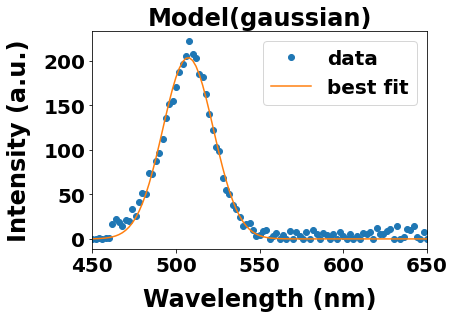

{'amplitude': 5933.519115573882, 'center': 506.77322228307116, 'sigma': 16.1123137708312, 'fwhm': 37.94159871382873, 'height': 146.91445292893494}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 5896.61330
    reduced chi-square = 60.1695235
    Akaike info crit   = 416.768306
    Bayesian info crit = 424.613668
    R-squared          = 0.97157536
[[Variables]]
    amplitude:  5933.51912 +/- 101.539355 (1.71%) (init = 7632)
    center:     506.773222 +/- 0.31837798 (0.06%) (init = 508)
    sigma:      16.1123138 +/- 0.31838812 (1.98%) (init = 16)
    fwhm:       37.9415987 +/- 0.74974672 (1.98%) == '2.3548200*sigma'
    height:     146.914453 +/- 2.51410820 (1.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


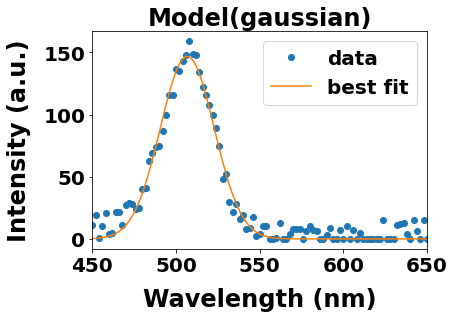

In [25]:
# Note that this code is to play around. I did not optimize parameters here
# Optimized parameters are in Gauss4Fit function
plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titleweight']='bold'


data = Readone
result_readone= np.zeros((data.shape[0],data.shape[1],4))
x = luminescence_wavelength  #np.arange(dat.shape[0])


plt.figure(figsize=(5,4))
fwhm=[]
center=[]
height=[]
fit_data=[]
for i in range (80):
  y=data[:,i]
  mod = GaussianModel()
  pars = mod.guess(y, x=x)
  result = mod.fit(y, pars, x=x) 
  val= result.params.valuesdict()
  f= np.array(val['fwhm'])
  fwhm.append(f)
  c= np.array(val['center'])
  center.append(c)
  h=np.array(val['height'])
  height.append(h)
  #values= np.array(result.params.valuesdict())
  #fit_data.append(values)
  print(result.params.valuesdict())
  para=result.fit_report()
  print(result.fit_report())
  
  result.plot_fit()
  plt.xlim(450,650)

  plt.xlabel('Wavelength (nm)', fontsize=24, labelpad=12)
  plt.ylabel('Intensity (a.u.)', fontsize=24, labelpad=12)      
      
  plt.show()
  
  



### Bar plot for Read One

## Intensity Bar plot

In [26]:
composition

A1     A2     A3     A4     A5     A6     A7     A8     A9  \
Wells             1      2      3      4      5      6      7      8      9   
OA              100    100    100    100    100    100    100    100    100   
OLA              10     20     30     40     50     60     70     80     90   
Ligand Ratio  1:0.1  1:0.2  1:0.3  1:0.4  1:0.5  1:0.6  1:0.7  1:0.8  1:0.9   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

              A10  ...     H2     H3     H4     H5     H6     H7     H8  \
Wells          10  ...     86     87     88     89     90     91     92   
OA            100  ...    100    100    100    100    100    100    100   
OLA           100  ...    120    130    140    150    160    170    180   
Ligand Ratio  1:1  ...  1:1.2  1:1.3  1:1.4  1:1.5  1:1.6  1:1.7  1:1.8   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
NaN           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                 H9  H10 Unnamed: 97  
Wells            93   94         NaN  
OA              100  100         NaN  
OLA             190  200         NaN  
Ligand Ratio  1:1.9  1:2         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN         NaN  
NaN             NaN  NaN              

[17 rows x 81 columns]

In [27]:
intensity_bar= pd.DataFrame(height)
intensity_bar.rename(columns={intensity_bar.columns[0]: 'Height'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

intensity_bar['wells']=wells

print(intensity_bar)

          Height  wells
0   31475.376709  1:0.1
1   37704.894950  1:0.2
2   52282.371464  1:0.3
3   35474.312347  1:0.4
4   20460.497525  1:0.5
..           ...    ...
75    248.208658  1:1.6
76    209.930610  1:1.7
77     65.432901  1:1.8
78    203.646994  1:1.9
79    146.914453    1:2

[80 rows x 2 columns]


Text(0.5, 1.0, '150 ul PbBr2')

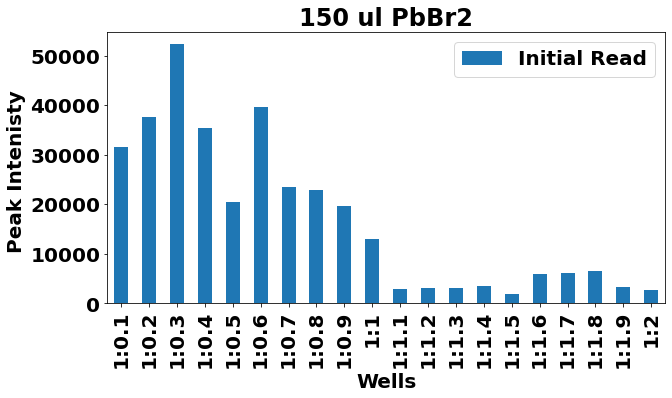

In [28]:

plotdata= intensity_bar[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(10,5),cmap=cmap);

ax.set_xlabel("Wells")
ax.set_ylabel("Peak Intenisty ")
ax.set_xticklabels(intensity_bar['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'])

ax.set_title('150 ul PbBr2')

##FWHM Bar Plot

In [29]:
fwhm_bar= pd.DataFrame(fwhm)
fwhm_bar.rename(columns={fwhm_bar.columns[0]: 'fwhm'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

fwhm_bar['wells']=wells

print(fwhm_bar)

         fwhm  wells
0   26.364318  1:0.1
1   26.224323  1:0.2
2   27.144988  1:0.3
3   26.206190  1:0.4
4   26.751026  1:0.5
..        ...    ...
75  35.376826  1:1.6
76  35.266436  1:1.7
77  43.171804  1:1.8
78  35.586983  1:1.9
79  37.941599    1:2

[80 rows x 2 columns]


Text(0.5, 1.0, '300 ul PbBr2')

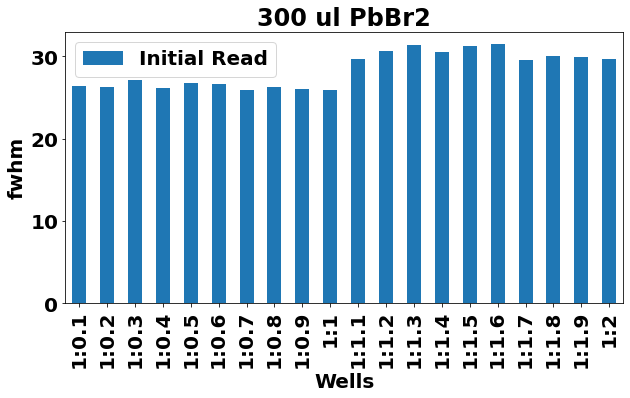

In [30]:

plotdata= fwhm_bar[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(10,5),cmap=cmap);

ax.set_xlabel("Wells")
ax.set_ylabel("fwhm")
ax.set_xticklabels(fwhm_bar['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'])

ax.set_title('300 ul PbBr2')

##Center Bar Plot for Read Initial

In [31]:
center_bar= pd.DataFrame(center)
center_bar.rename(columns={center_bar.columns[0]: 'center'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

center_bar['wells']=wells

print(center_bar)

        center  wells
0   522.613711  1:0.1
1   522.321979  1:0.2
2   523.150354  1:0.3
3   520.040419  1:0.4
4   517.771132  1:0.5
..         ...    ...
75  507.555552  1:1.6
76  506.558617  1:1.7
77  501.905575  1:1.8
78  507.289714  1:1.9
79  506.773222    1:2

[80 rows x 2 columns]


Text(0.5, 1.0, '300 ul PbBr2')

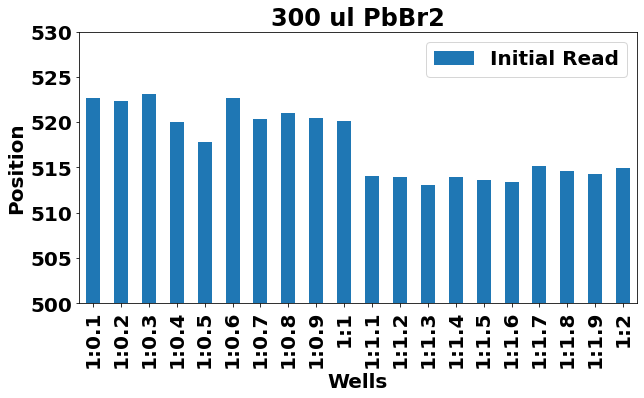

In [32]:

plotdata= center_bar[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(10,5),cmap=cmap);

plt.ylim([500, 530])
ax.set_xlabel("Wells")
ax.set_ylabel("Position")
ax.set_xticklabels(center_bar['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'])

ax.set_title('300 ul PbBr2')

## Gaussian Fit for Final Read

In [33]:
Readfinal= np.array(d['Read 92'].drop(['Wavelength'],axis=1))

{'amplitude': 639024.0232759286, 'center': 524.3121597277536, 'sigma': 12.01873848385003, 'fwhm': 28.301965756539726, 'height': 21211.353749273705}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 9628155.87
    reduced chi-square = 98246.4885
    Akaike info crit   = 1163.97326
    Bayesian info crit = 1171.81862
    R-squared          = 0.99742802
[[Variables]]
    amplitude:  639024.023 +/- 3543.64860 (0.55%) (init = 768276)
    center:     524.312160 +/- 0.07695934 (0.01%) (init = 524)
    sigma:      12.0187385 +/- 0.07695934 (0.64%) (init = 12)
    fwhm:       28.3019658 +/- 0.18122539 (0.64%) == '2.3548200*sigma'
    height:     21211.3537 +/- 117.625527 (0.55%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


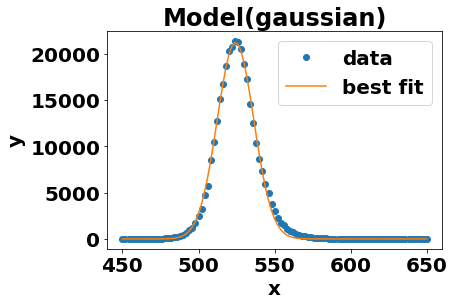

{'amplitude': 716898.6193958871, 'center': 523.9970048563764, 'sigma': 11.773143635013836, 'fwhm': 27.723634094603284, 'height': 24292.67772101582}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 15180606.0
    reduced chi-square = 154904.143
    Akaike info crit   = 1209.96128
    Bayesian info crit = 1217.80664
    R-squared          = 0.99686105
[[Variables]]
    amplitude:  716898.619 +/- 4403.94151 (0.61%) (init = 887652)
    center:     523.997005 +/- 0.08351151 (0.02%) (init = 524)
    sigma:      11.7731436 +/- 0.08351151 (0.71%) (init = 12)
    fwhm:       27.7236341 +/- 0.19665456 (0.71%) == '2.3548200*sigma'
    height:     24292.6777 +/- 149.231210 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


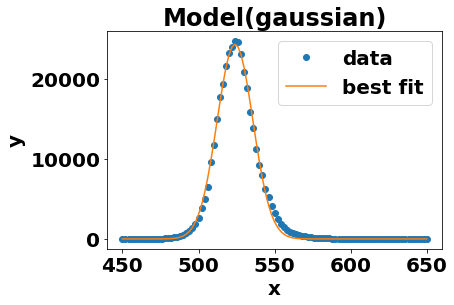

{'amplitude': 960419.8672648829, 'center': 525.3280446414334, 'sigma': 11.93535541643009, 'fwhm': 28.105613641717905, 'height': 32102.279106402122}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 15272114.5
    reduced chi-square = 155837.903
    Akaike info crit   = 1210.56828
    Bayesian info crit = 1218.41364
    R-squared          = 0.99821263
[[Variables]]
    amplitude:  960419.867 +/- 4447.52290 (0.46%) (init = 1259700)
    center:     525.328045 +/- 0.06382086 (0.01%) (init = 525)
    sigma:      11.9353554 +/- 0.06382086 (0.53%) (init = 13)
    fwhm:       28.1056136 +/- 0.15028664 (0.53%) == '2.3548200*sigma'
    height:     32102.2791 +/- 148.659787 (0.46%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


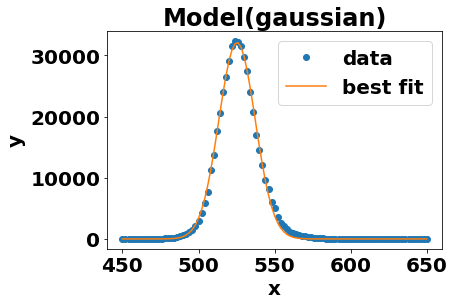

{'amplitude': 765046.9104889012, 'center': 522.1541442745137, 'sigma': 11.390928411342685, 'fwhm': 26.823586041597984, 'height': 26794.091144881524}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 15511746.1
    reduced chi-square = 158283.123
    Akaike info crit   = 1212.14075
    Bayesian info crit = 1219.98611
    R-squared          = 0.99729275
[[Variables]]
    amplitude:  765046.910 +/- 4378.85060 (0.57%) (init = 995760)
    center:     522.154144 +/- 0.07528366 (0.01%) (init = 522)
    sigma:      11.3909284 +/- 0.07528366 (0.66%) (init = 12)
    fwhm:       26.8235860 +/- 0.17727947 (0.66%) == '2.3548200*sigma'
    height:     26794.0911 +/- 153.359682 (0.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


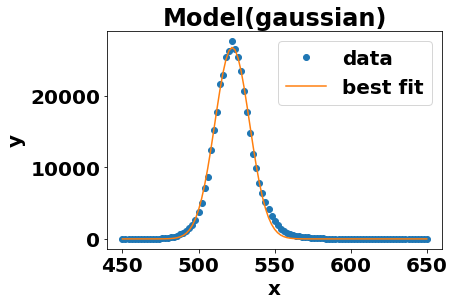

{'amplitude': 625523.4882199467, 'center': 520.7596551834854, 'sigma': 11.635250870820075, 'fwhm': 27.39892145562453, 'height': 21447.5632597082}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 8735335.67
    reduced chi-square = 89136.0782
    Akaike info crit   = 1154.14441
    Bayesian info crit = 1161.98977
    R-squared          = 0.99765336
[[Variables]]
    amplitude:  625523.488 +/- 3321.07338 (0.53%) (init = 776592)
    center:     520.759655 +/- 0.07133139 (0.01%) (init = 520)
    sigma:      11.6352509 +/- 0.07133139 (0.61%) (init = 12)
    fwhm:       27.3989215 +/- 0.16797259 (0.61%) == '2.3548200*sigma'
    height:     21447.5633 +/- 113.871041 (0.53%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


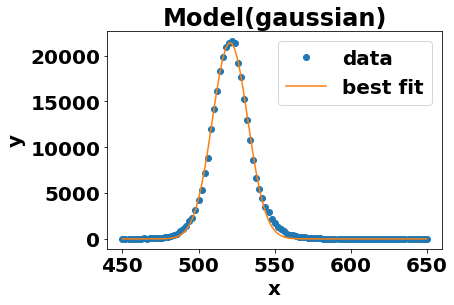

{'amplitude': 903919.4260352278, 'center': 524.6363799255637, 'sigma': 12.105141533404792, 'fwhm': 28.505429385692274, 'height': 29789.96105432111}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 22998919.3
    reduced chi-square = 234682.850
    Akaike info crit   = 1251.91956
    Bayesian info crit = 1259.76493
    R-squared          = 0.99690469
[[Variables]]
    amplitude:  903919.426 +/- 5496.53449 (0.61%) (init = 1173354)
    center:     524.636380 +/- 0.08499605 (0.02%) (init = 525)
    sigma:      12.1051415 +/- 0.08499605 (0.70%) (init = 13)
    fwhm:       28.5054294 +/- 0.20015039 (0.70%) == '2.3548200*sigma'
    height:     29789.9611 +/- 181.146248 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


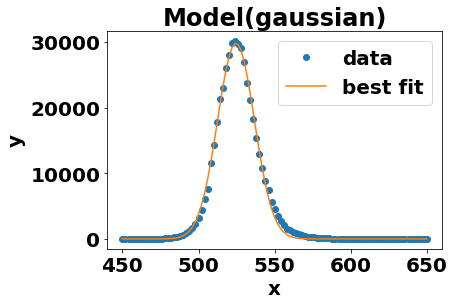

{'amplitude': 740517.7258947447, 'center': 522.5483043498051, 'sigma': 11.525699090800014, 'fwhm': 27.14094673299769, 'height': 25631.7506150261}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 17473140.8
    reduced chi-square = 178297.355
    Akaike info crit   = 1224.16655
    Bayesian info crit = 1232.01191
    R-squared          = 0.99669579
[[Variables]]
    amplitude:  740517.726 +/- 4674.87797 (0.63%) (init = 934056)
    center:     522.548304 +/- 0.08401805 (0.02%) (init = 522)
    sigma:      11.5256991 +/- 0.08401804 (0.73%) (init = 12)
    fwhm:       27.1409467 +/- 0.19784737 (0.73%) == '2.3548200*sigma'
    height:     25631.7506 +/- 161.813155 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


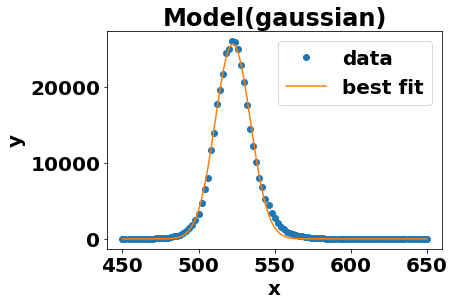

{'amplitude': 743373.1262628086, 'center': 523.4751786849247, 'sigma': 11.799111333991586, 'fwhm': 27.784783351510068, 'height': 25134.34921959918}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 15923323.4
    reduced chi-square = 162482.892
    Akaike info crit   = 1214.78567
    Bayesian info crit = 1222.63103
    R-squared          = 0.99692803
[[Variables]]
    amplitude:  743373.126 +/- 4515.35409 (0.61%) (init = 986193)
    center:     523.475179 +/- 0.08275683 (0.02%) (init = 523)
    sigma:      11.7991113 +/- 0.08275684 (0.70%) (init = 13)
    fwhm:       27.7847834 +/- 0.19487745 (0.70%) == '2.3548200*sigma'
    height:     25134.3492 +/- 152.669672 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


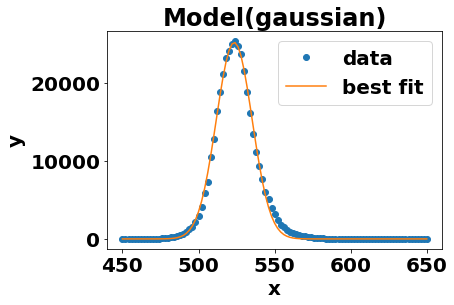

{'amplitude': 734140.1558579284, 'center': 523.1145305444078, 'sigma': 11.716703189418354, 'fwhm': 27.590727004506128, 'height': 24996.75527880806}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 17137164.6
    reduced chi-square = 174869.027
    Akaike info crit   = 1222.20559
    Bayesian info crit = 1230.05095
    R-squared          = 0.99663922
[[Variables]]
    amplitude:  734140.156 +/- 4667.90234 (0.64%) (init = 919908)
    center:     523.114531 +/- 0.08602350 (0.02%) (init = 522)
    sigma:      11.7167032 +/- 0.08602350 (0.73%) (init = 12)
    fwhm:       27.5907270 +/- 0.20256986 (0.73%) == '2.3548200*sigma'
    height:     24996.7553 +/- 158.937402 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


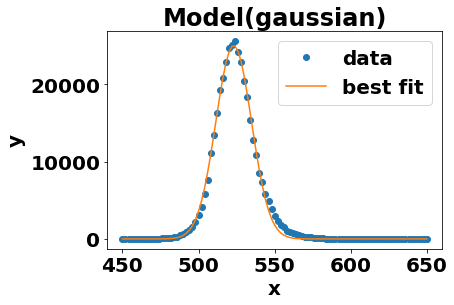

{'amplitude': 577018.9619464681, 'center': 522.3365833114907, 'sigma': 11.463478721729622, 'fwhm': 26.99442896350335, 'height': 20080.92634098806}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 11140479.8
    reduced chi-square = 113678.365
    Akaike info crit   = 1178.70851
    Bayesian info crit = 1186.55387
    R-squared          = 0.99655527
[[Variables]]
    amplitude:  577018.962 +/- 3722.72030 (0.65%) (init = 746496)
    center:     522.336583 +/- 0.08539969 (0.02%) (init = 522)
    sigma:      11.4634787 +/- 0.08539969 (0.74%) (init = 12)
    fwhm:       26.9944290 +/- 0.20110090 (0.74%) == '2.3548200*sigma'
    height:     20080.9263 +/- 129.555000 (0.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


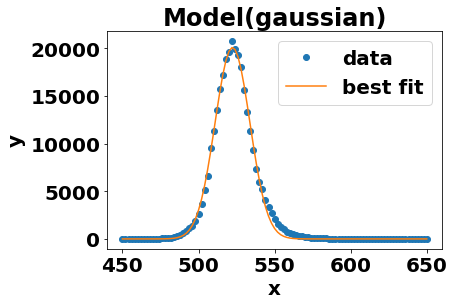

{'amplitude': 133895.8356572625, 'center': 517.0030769173842, 'sigma': 12.168964499792013, 'fwhm': 28.65572098340023, 'height': 4389.585707020782}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 611125.417
    reduced chi-square = 6235.97365
    Akaike info crit   = 885.501634
    Bayesian info crit = 893.346995
    R-squared          = 0.99619862
[[Variables]]
    amplitude:  133895.836 +/- 898.343662 (0.67%) (init = 173823)
    center:     517.003077 +/- 0.09427551 (0.02%) (init = 517)
    sigma:      12.1689645 +/- 0.09427551 (0.77%) (init = 13)
    fwhm:       28.6557210 +/- 0.22200186 (0.77%) == '2.3548200*sigma'
    height:     4389.58571 +/- 29.4509475 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


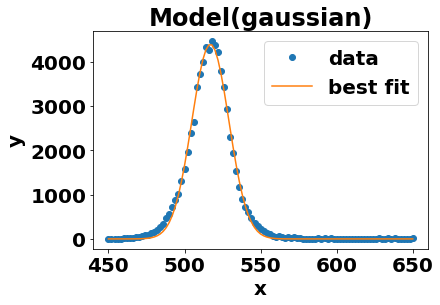

{'amplitude': 90920.70342235887, 'center': 514.9515855327235, 'sigma': 12.65862197375509, 'fwhm': 29.80877619623796, 'height': 2865.4078316056907}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 348093.336
    reduced chi-square = 3551.97281
    Akaike info crit   = 828.655647
    Bayesian info crit = 836.501008
    R-squared          = 0.99500732
[[Variables]]
    amplitude:  90920.7034 +/- 691.498896 (0.76%) (init = 114153)
    center:     514.951586 +/- 0.11116930 (0.02%) (init = 515)
    sigma:      12.6586220 +/- 0.11116930 (0.88%) (init = 13)
    fwhm:       29.8087762 +/- 0.26178369 (0.88%) == '2.3548200*sigma'
    height:     2865.40783 +/- 21.7929180 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


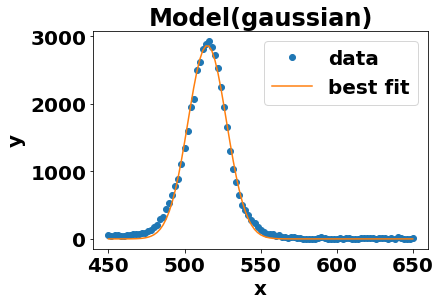

{'amplitude': 123268.20691095015, 'center': 515.3253278328746, 'sigma': 13.065837294448162, 'fwhm': 30.767694977712424, 'height': 3763.7773128268045}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 424920.816
    reduced chi-square = 4335.92669
    Akaike info crit   = 848.798297
    Bayesian info crit = 856.643659
    R-squared          = 0.99657763
[[Variables]]
    amplitude:  123268.207 +/- 776.198921 (0.63%) (init = 158718)
    center:     515.325328 +/- 0.09500116 (0.02%) (init = 516)
    sigma:      13.0658373 +/- 0.09500116 (0.73%) (init = 14)
    fwhm:       30.7676950 +/- 0.22371064 (0.73%) == '2.3548200*sigma'
    height:     3763.77731 +/- 23.6998779 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


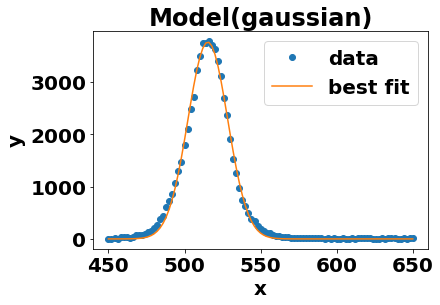

{'amplitude': 90206.96545073813, 'center': 514.9659781619456, 'sigma': 12.580768854582464, 'fwhm': 29.62544611414788, 'height': 2860.5067535144995}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 272583.130
    reduced chi-square = 2781.46051
    Akaike info crit   = 803.958418
    Bayesian info crit = 811.803779
    R-squared          = 0.99609591
[[Variables]]
    amplitude:  90206.9655 +/- 610.033150 (0.68%) (init = 114036)
    center:     514.965978 +/- 0.09824042 (0.02%) (init = 515)
    sigma:      12.5807689 +/- 0.09824042 (0.78%) (init = 13)
    fwhm:       29.6254461 +/- 0.23133851 (0.78%) == '2.3548200*sigma'
    height:     2860.50675 +/- 19.3444567 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


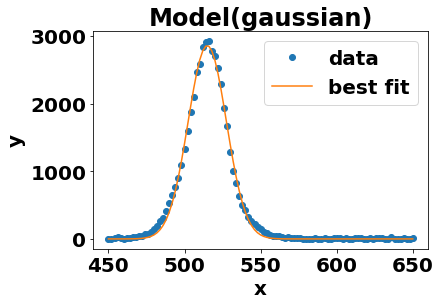

{'amplitude': 76555.14934833546, 'center': 514.7782560106632, 'sigma': 12.952031673737386, 'fwhm': 30.499703225950274, 'height': 2358.01518458267}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 222904.828
    reduced chi-square = 2274.53906
    Akaike info crit   = 783.637346
    Bayesian info crit = 791.482707
    R-squared          = 0.99537665
[[Variables]]
    amplitude:  76555.1493 +/- 559.729888 (0.73%) (init = 92820)
    center:     514.778256 +/- 0.10934807 (0.02%) (init = 515)
    sigma:      12.9520317 +/- 0.10934807 (0.84%) (init = 13)
    fwhm:       30.4997032 +/- 0.25749502 (0.84%) == '2.3548200*sigma'
    height:     2358.01518 +/- 17.2405263 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


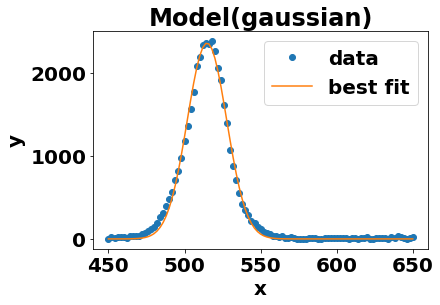

{'amplitude': 201577.46233506603, 'center': 514.9947492474025, 'sigma': 12.952997338819035, 'fwhm': 30.501977193397842, 'height': 6208.4299369929895}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 1342119.96
    reduced chi-square = 13695.1016
    Akaike info crit   = 964.958687
    Bayesian info crit = 972.804048
    R-squared          = 0.99600350
[[Variables]]
    amplitude:  201577.462 +/- 1373.50780 (0.68%) (init = 243009)
    center:     514.994749 +/- 0.10191288 (0.02%) (init = 515)
    sigma:      12.9529973 +/- 0.10191288 (0.79%) (init = 13)
    fwhm:       30.5019772 +/- 0.23998649 (0.79%) == '2.3548200*sigma'
    height:     6208.42994 +/- 42.3029960 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


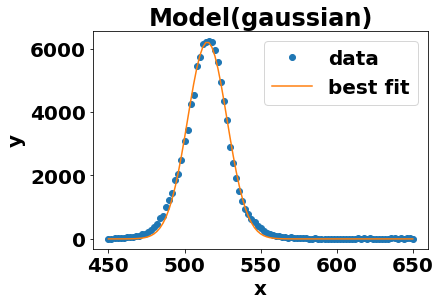

{'amplitude': 187214.02353133075, 'center': 516.2609527120535, 'sigma': 12.262828183378614, 'fwhm': 28.87675306278363, 'height': 6090.568343856999}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 1173847.59
    reduced chi-square = 11978.0366
    Akaike info crit   = 951.428370
    Bayesian info crit = 959.273732
    R-squared          = 0.99621934
[[Variables]]
    amplitude:  187214.024 +/- 1249.82688 (0.67%) (init = 221148)
    center:     516.260953 +/- 0.09453010 (0.02%) (init = 516)
    sigma:      12.2628282 +/- 0.09453011 (0.77%) (init = 12)
    fwhm:       28.8767531 +/- 0.22260138 (0.77%) == '2.3548200*sigma'
    height:     6090.56834 +/- 40.6600964 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


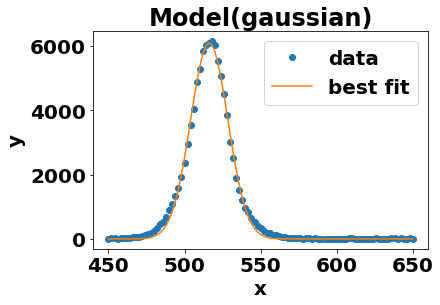

{'amplitude': 202423.24106888825, 'center': 515.7295544368146, 'sigma': 12.39742427662509, 'fwhm': 29.193702635082296, 'height': 6513.868652356913}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1385410.32
    reduced chi-square = 14136.8400
    Akaike info crit   = 968.165026
    Bayesian info crit = 976.010388
    R-squared          = 0.99613261
[[Variables]]
    amplitude:  202423.241 +/- 1365.22626 (0.67%) (init = 238824)
    center:     515.729554 +/- 0.09654832 (0.02%) (init = 516)
    sigma:      12.3974243 +/- 0.09654832 (0.78%) (init = 12)
    fwhm:       29.1937026 +/- 0.22735392 (0.78%) == '2.3548200*sigma'
    height:     6513.86865 +/- 43.9322060 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


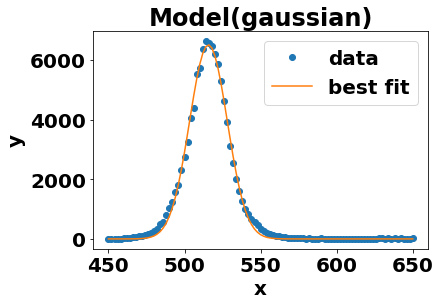

{'amplitude': 157511.69041353939, 'center': 515.43197938239, 'sigma': 12.391945158605756, 'fwhm': 29.180800298388007, 'height': 5070.880741174568}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 740953.965
    reduced chi-square = 7560.75475
    Akaike info crit   = 904.957899
    Bayesian info crit = 912.803261
    R-squared          = 0.99658473
[[Variables]]
    amplitude:  157511.690 +/- 998.195965 (0.63%) (init = 199836)
    center:     515.431979 +/- 0.09068016 (0.02%) (init = 515)
    sigma:      12.3919452 +/- 0.09068016 (0.73%) (init = 13)
    fwhm:       29.1808003 +/- 0.21353545 (0.73%) == '2.3548200*sigma'
    height:     5070.88074 +/- 32.1356200 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


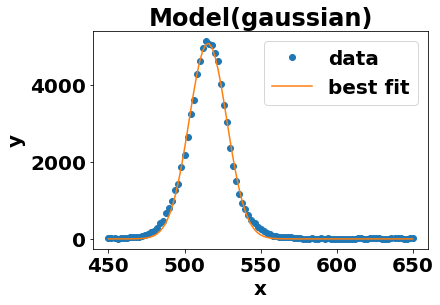

{'amplitude': 177237.233735727, 'center': 516.2284782269799, 'sigma': 12.41357554578663, 'fwhm': 29.231735966729275, 'height': 5695.97610385251}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 872525.134
    reduced chi-square = 8903.31770
    Akaike info crit   = 921.466649
    Bayesian info crit = 929.312010
    R-squared          = 0.99681507
[[Variables]]
    amplitude:  177237.234 +/- 1084.14471 (0.61%) (init = 207324)
    center:     516.228478 +/- 0.08767955 (0.02%) (init = 516)
    sigma:      12.4135755 +/- 0.08767955 (0.71%) (init = 12)
    fwhm:       29.2317360 +/- 0.20646957 (0.71%) == '2.3548200*sigma'
    height:     5695.97610 +/- 34.8417767 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


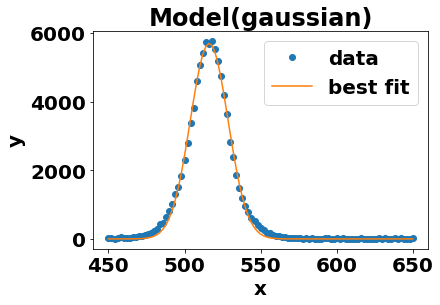

{'amplitude': 744472.3329038996, 'center': 522.2306548502793, 'sigma': 11.256543949653349, 'fwhm': 26.5071348235227, 'height': 26384.78613892799}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 16155900.3
    reduced chi-square = 164856.126
    Akaike info crit   = 1216.25021
    Bayesian info crit = 1224.09557
    R-squared          = 0.99706746
[[Variables]]
    amplitude:  744472.333 +/- 4442.40734 (0.60%) (init = 963612)
    center:     522.230655 +/- 0.07756119 (0.01%) (init = 522)
    sigma:      11.2565439 +/- 0.07756119 (0.69%) (init = 12)
    fwhm:       26.5071348 +/- 0.18264264 (0.69%) == '2.3548200*sigma'
    height:     26384.7861 +/- 157.443063 (0.60%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


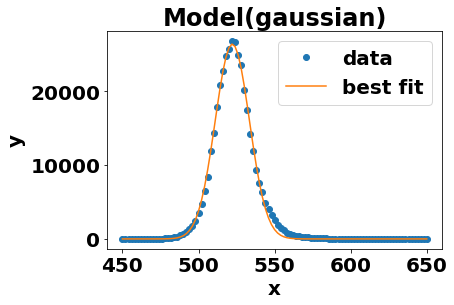

{'amplitude': 640789.9272135721, 'center': 521.8719079993665, 'sigma': 11.14503255551393, 'fwhm': 26.244545562375315, 'height': 22937.412349947757}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 11079375.7
    reduced chi-square = 113054.855
    Akaike info crit   = 1178.15301
    Bayesian info crit = 1185.99837
    R-squared          = 0.99731695
[[Variables]]
    amplitude:  640789.927 +/- 3660.56868 (0.57%) (init = 839340)
    center:     521.871908 +/- 0.07351632 (0.01%) (init = 522)
    sigma:      11.1450326 +/- 0.07351632 (0.66%) (init = 12)
    fwhm:       26.2445456 +/- 0.17311771 (0.66%) == '2.3548200*sigma'
    height:     22937.4123 +/- 131.032017 (0.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


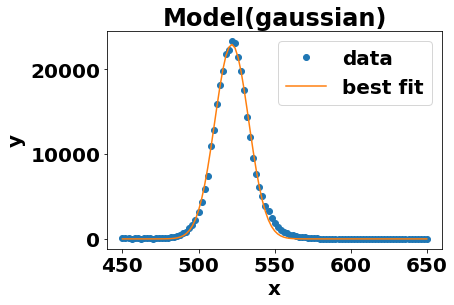

{'amplitude': 675584.3397092021, 'center': 521.255223109957, 'sigma': 11.115219262547997, 'fwhm': 26.174340623833277, 'height': 24247.760117130354}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 13005361.8
    reduced chi-square = 132707.773
    Akaike info crit   = 1194.34093
    Bayesian info crit = 1202.18629
    R-squared          = 0.99717911
[[Variables]]
    amplitude:  675584.340 +/- 3960.69867 (0.59%) (init = 885672)
    center:     521.255223 +/- 0.07524561 (0.01%) (init = 520)
    sigma:      11.1152193 +/- 0.07524560 (0.68%) (init = 12)
    fwhm:       26.1743406 +/- 0.17718985 (0.68%) == '2.3548200*sigma'
    height:     24247.7601 +/- 142.155889 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


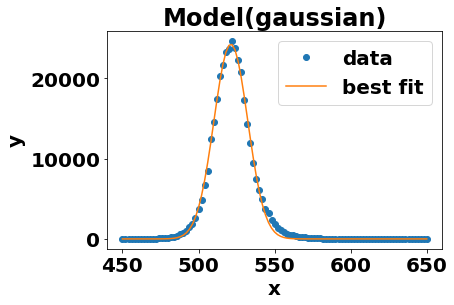

{'amplitude': 372562.6830552926, 'center': 520.0839298197027, 'sigma': 11.068725811545539, 'fwhm': 26.06485691554367, 'height': 13428.014769072677}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 3762629.76
    reduced chi-square = 38394.1812
    Akaike info crit   = 1069.07632
    Bayesian info crit = 1076.92169
    R-squared          = 0.99732350
[[Variables]]
    amplitude:  372562.683 +/- 2125.90963 (0.57%) (init = 481284)
    center:     520.083930 +/- 0.07293108 (0.01%) (init = 520)
    sigma:      11.0687258 +/- 0.07293108 (0.66%) (init = 12)
    fwhm:       26.0648569 +/- 0.17173956 (0.66%) == '2.3548200*sigma'
    height:     13428.0148 +/- 76.6226873 (0.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


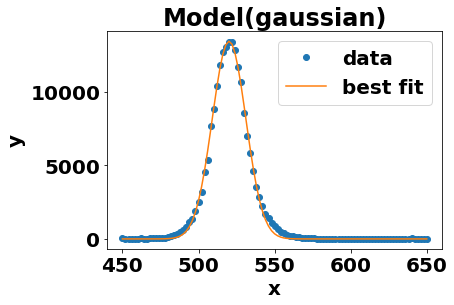

{'amplitude': 186779.51046690327, 'center': 516.6595808928411, 'sigma': 11.773623719593044, 'fwhm': 27.72476460737209, 'height': 6328.913618543608}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 962663.417
    reduced chi-square = 9823.09609
    Akaike info crit   = 931.396198
    Bayesian info crit = 939.241560
    R-squared          = 0.99704726
[[Variables]]
    amplitude:  186779.510 +/- 1109.02873 (0.59%) (init = 247611)
    center:     516.659581 +/- 0.08072230 (0.02%) (init = 517)
    sigma:      11.7736237 +/- 0.08072230 (0.69%) (init = 13)
    fwhm:       27.7247646 +/- 0.19008648 (0.69%) == '2.3548200*sigma'
    height:     6328.91362 +/- 37.5788090 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


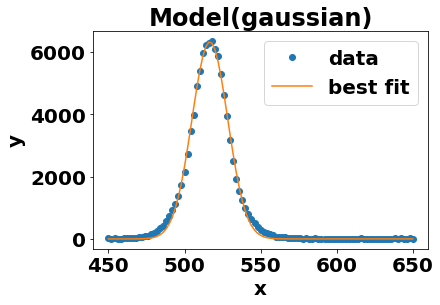

{'amplitude': 592635.770897931, 'center': 520.7089349725044, 'sigma': 11.112876000866144, 'fwhm': 26.168822664359617, 'height': 21275.093637854538}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 10046973.0
    reduced chi-square = 102520.133
    Akaike info crit   = 1168.27381
    Bayesian info crit = 1176.11917
    R-squared          = 0.99716169
[[Variables]]
    amplitude:  592635.771 +/- 3480.81658 (0.59%) (init = 773820)
    center:     520.708935 +/- 0.07536841 (0.01%) (init = 520)
    sigma:      11.1128760 +/- 0.07536841 (0.68%) (init = 12)
    fwhm:       26.1688227 +/- 0.17747904 (0.68%) == '2.3548200*sigma'
    height:     21275.0936 +/- 124.958245 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


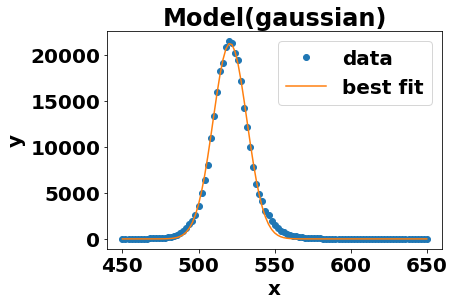

{'amplitude': 580637.5333674628, 'center': 519.9041573993969, 'sigma': 11.055222040082631, 'fwhm': 26.033057964427382, 'height': 20953.072872538254}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 9571529.47
    reduced chi-square = 97668.6680
    Akaike info crit   = 1163.37749
    Bayesian info crit = 1171.22285
    R-squared          = 0.99720187
[[Variables]]
    amplitude:  580637.533 +/- 3388.63452 (0.58%) (init = 769428)
    center:     519.904157 +/- 0.07450008 (0.01%) (init = 520)
    sigma:      11.0552220 +/- 0.07450008 (0.67%) (init = 12)
    fwhm:       26.0330580 +/- 0.17543428 (0.67%) == '2.3548200*sigma'
    height:     20953.0729 +/- 122.283408 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


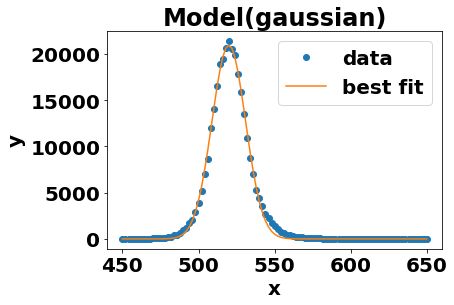

{'amplitude': 753393.1022817912, 'center': 520.4064640718957, 'sigma': 11.400107736939427, 'fwhm': 26.845201701099704, 'height': 26364.696190943552}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 16271122.9
    reduced chi-square = 166031.866
    Akaike info crit   = 1216.96798
    Bayesian info crit = 1224.81334
    R-squared          = 0.99706450
[[Variables]]
    amplitude:  753393.102 +/- 4486.56005 (0.60%) (init = 957240)
    center:     520.406464 +/- 0.07839175 (0.02%) (init = 520)
    sigma:      11.4001077 +/- 0.07839175 (0.69%) (init = 12)
    fwhm:       26.8452017 +/- 0.18459846 (0.69%) == '2.3548200*sigma'
    height:     26364.6962 +/- 157.005453 (0.60%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


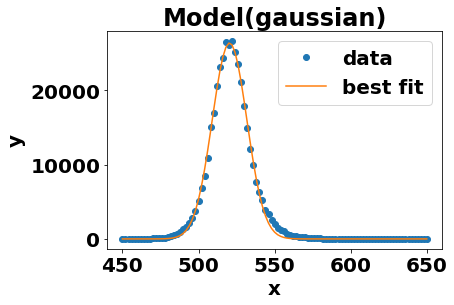

{'amplitude': 387100.3238298935, 'center': 518.1522857754723, 'sigma': 11.572466465874632, 'fwhm': 27.2510754831709, 'height': 13344.66545872776}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 5309337.27
    reduced chi-square = 54176.9110
    Akaike info crit   = 1103.85556
    Bayesian info crit = 1111.70092
    R-squared          = 0.99629038
[[Variables]]
    amplitude:  387100.324 +/- 2582.16181 (0.67%) (init = 481968)
    center:     518.152286 +/- 0.08913648 (0.02%) (init = 518)
    sigma:      11.5724665 +/- 0.08913648 (0.77%) (init = 12)
    fwhm:       27.2510755 +/- 0.20990037 (0.77%) == '2.3548200*sigma'
    height:     13344.6655 +/- 89.0159413 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


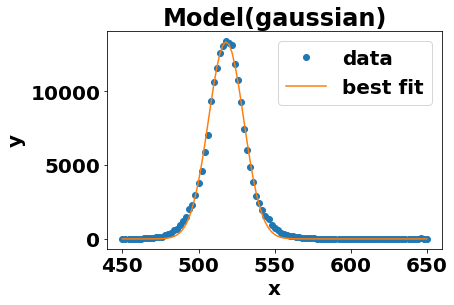

{'amplitude': 260732.14846095748, 'center': 518.5306262464151, 'sigma': 11.309740872987037, 'fwhm': 26.632404002527338, 'height': 9197.12344952106}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 2188285.75
    reduced chi-square = 22329.4465
    Akaike info crit   = 1014.33436
    Bayesian info crit = 1022.17972
    R-squared          = 0.99673004
[[Variables]]
    amplitude:  260732.148 +/- 1638.80620 (0.63%) (init = 306075)
    center:     518.530626 +/- 0.08208319 (0.02%) (init = 519)
    sigma:      11.3097409 +/- 0.08208319 (0.73%) (init = 11)
    fwhm:       26.6324040 +/- 0.19329115 (0.73%) == '2.3548200*sigma'
    height:     9197.12345 +/- 57.8075418 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


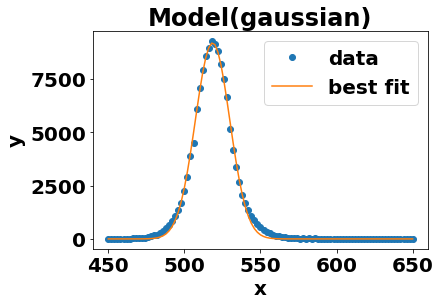

{'amplitude': 157872.6982852071, 'center': 518.1987999134933, 'sigma': 12.894354198355032, 'fwhm': 30.3638831533704, 'height': 4884.470861607119}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 741414.399
    reduced chi-square = 7565.45305
    Akaike info crit   = 905.020642
    Bayesian info crit = 912.866003
    R-squared          = 0.99642737
[[Variables]]
    amplitude:  157872.698 +/- 1018.54676 (0.65%) (init = 210000)
    center:     518.198800 +/- 0.09606021 (0.02%) (init = 518)
    sigma:      12.8943542 +/- 0.09606021 (0.74%) (init = 14)
    fwhm:       30.3638832 +/- 0.22620450 (0.74%) == '2.3548200*sigma'
    height:     4884.47086 +/- 31.5131544 (0.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


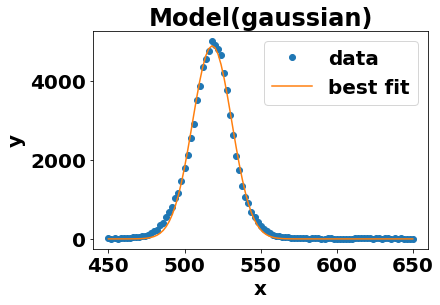

{'amplitude': 84732.19723288532, 'center': 514.1017266601515, 'sigma': 12.770017456729974, 'fwhm': 30.07109250745688, 'height': 2647.079987375125}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 210041.347
    reduced chi-square = 2143.27905
    Akaike info crit   = 777.633856
    Bayesian info crit = 785.479217
    R-squared          = 0.99651911
[[Variables]]
    amplitude:  84732.1972 +/- 539.509109 (0.64%) (init = 105144)
    center:     514.101727 +/- 0.09388836 (0.02%) (init = 515)
    sigma:      12.7700175 +/- 0.09388836 (0.74%) (init = 13)
    fwhm:       30.0710925 +/- 0.22109019 (0.74%) == '2.3548200*sigma'
    height:     2647.07999 +/- 16.8545732 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


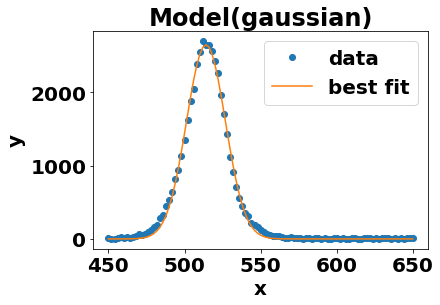

{'amplitude': 38830.2690063503, 'center': 514.3934792341163, 'sigma': 12.843727434561025, 'fwhm': 30.244666237452993, 'height': 1206.1169085017693}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 62580.4685
    reduced chi-square = 638.576209
    Akaike info crit   = 655.337887
    Bayesian info crit = 663.183248
    R-squared          = 0.99499374
[[Variables]]
    amplitude:  38830.2690 +/- 295.335275 (0.76%) (init = 48009)
    center:     514.393479 +/- 0.11279912 (0.02%) (init = 515)
    sigma:      12.8437274 +/- 0.11279912 (0.88%) (init = 13)
    fwhm:       30.2446662 +/- 0.26562162 (0.88%) == '2.3548200*sigma'
    height:     1206.11691 +/- 9.17348898 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


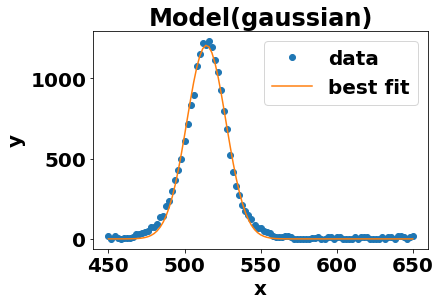

{'amplitude': 53825.8714471512, 'center': 513.7696037572416, 'sigma': 13.073808959105769, 'fwhm': 30.786466813081447, 'height': 1642.4759625751472}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 94857.4403
    reduced chi-square = 967.933064
    Akaike info crit   = 697.346000
    Bayesian info crit = 705.191361
    R-squared          = 0.99598144
[[Variables]]
    amplitude:  53825.8714 +/- 366.849023 (0.68%) (init = 69552)
    center:     513.769604 +/- 0.10288886 (0.02%) (init = 514)
    sigma:      13.0738090 +/- 0.10288886 (0.79%) (init = 14)
    fwhm:       30.7864668 +/- 0.24228474 (0.79%) == '2.3548200*sigma'
    height:     1642.47596 +/- 11.1942675 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


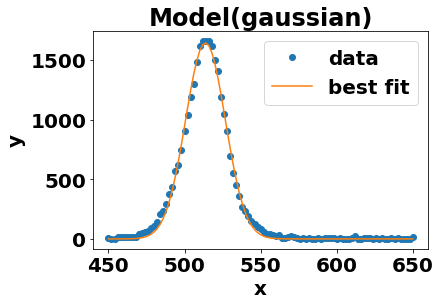

{'amplitude': 100232.09913631962, 'center': 513.9008859950183, 'sigma': 13.016814149284658, 'fwhm': 30.652254295018498, 'height': 3071.936320568029}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 355154.792
    reduced chi-square = 3624.02849
    Akaike info crit   = 830.684037
    Bayesian info crit = 838.529399
    R-squared          = 0.99570742
[[Variables]]
    amplitude:  100232.099 +/- 708.291400 (0.71%) (init = 133098)
    center:     513.900886 +/- 0.10621355 (0.02%) (init = 514)
    sigma:      13.0168141 +/- 0.10621355 (0.82%) (init = 14)
    fwhm:       30.6522543 +/- 0.25011380 (0.82%) == '2.3548200*sigma'
    height:     3071.93632 +/- 21.7079012 (0.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


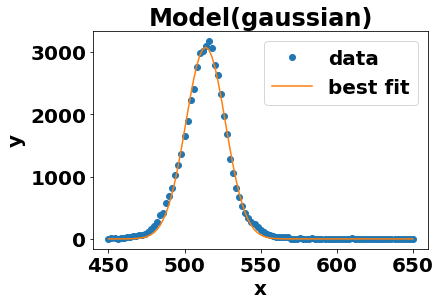

{'amplitude': 112385.24636694088, 'center': 514.7401261550406, 'sigma': 12.750927673335607, 'fwhm': 30.026139503724156, 'height': 3516.232686775587}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 421503.102
    reduced chi-square = 4301.05206
    Akaike info crit   = 847.982652
    Bayesian info crit = 855.828013
    R-squared          = 0.99604316
[[Variables]]
    amplitude:  112385.246 +/- 763.699437 (0.68%) (init = 140751)
    center:     514.740126 +/- 0.10005192 (0.02%) (init = 515)
    sigma:      12.7509277 +/- 0.10005192 (0.78%) (init = 13)
    fwhm:       30.0261395 +/- 0.23560427 (0.78%) == '2.3548200*sigma'
    height:     3516.23269 +/- 23.8941467 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


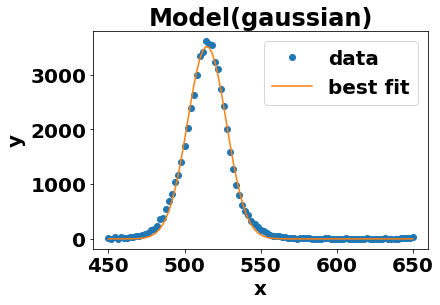

{'amplitude': 108018.64632925029, 'center': 514.6935731456077, 'sigma': 12.68302002819133, 'fwhm': 29.866229222785506, 'height': 3397.7086777196396}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 362837.348
    reduced chi-square = 3702.42192
    Akaike info crit   = 832.845531
    Bayesian info crit = 840.690893
    R-squared          = 0.99633637
[[Variables]]
    amplitude:  108018.646 +/- 706.673585 (0.65%) (init = 133770)
    center:     514.693573 +/- 0.09581062 (0.02%) (init = 515)
    sigma:      12.6830200 +/- 0.09581062 (0.76%) (init = 13)
    fwhm:       29.8662292 +/- 0.22561676 (0.76%) == '2.3548200*sigma'
    height:     3397.70868 +/- 22.2283505 (0.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


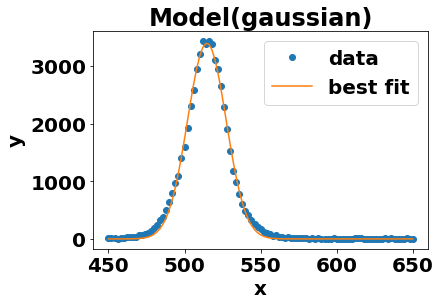

{'amplitude': 75232.20577725243, 'center': 514.02373914498, 'sigma': 13.194903187855525, 'fwhm': 31.071621924825948, 'height': 2274.6138247133454}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 190369.432
    reduced chi-square = 1942.54522
    Akaike info crit   = 767.701734
    Bayesian info crit = 775.547095
    R-squared          = 0.99581821
[[Variables]]
    amplitude:  75232.2058 +/- 522.098371 (0.69%) (init = 97902)
    center:     514.023739 +/- 0.10573644 (0.02%) (init = 514)
    sigma:      13.1949032 +/- 0.10573644 (0.80%) (init = 14)
    fwhm:       31.0716219 +/- 0.24899028 (0.80%) == '2.3548200*sigma'
    height:     2274.61382 +/- 15.7854360 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


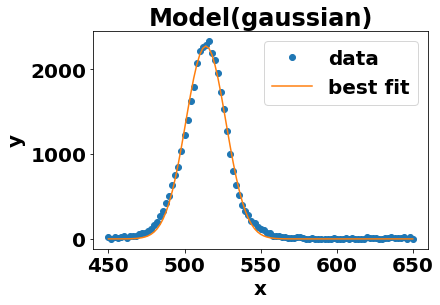

{'amplitude': 102009.671174191, 'center': 515.0567457640751, 'sigma': 12.59740674974089, 'fwhm': 29.664625362424843, 'height': 3230.503995698362}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 336526.361
    reduced chi-square = 3433.94245
    Akaike info crit   = 825.242436
    Bayesian info crit = 833.087797
    R-squared          = 0.99621173
[[Variables]]
    amplitude:  102009.671 +/- 678.266714 (0.66%) (init = 129246)
    center:     515.056746 +/- 0.09671860 (0.02%) (init = 515)
    sigma:      12.5974067 +/- 0.09671860 (0.77%) (init = 13)
    fwhm:       29.6646254 +/- 0.22775490 (0.77%) == '2.3548200*sigma'
    height:     3230.50400 +/- 21.4797719 (0.66%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


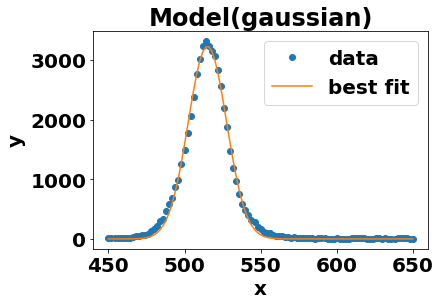

{'amplitude': 233973.96993068265, 'center': 516.2424938554941, 'sigma': 12.620886794987845, 'fwhm': 29.719916642573278, 'height': 7395.844303218574}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1795576.00
    reduced chi-square = 18322.2041
    Akaike info crit   = 994.357306
    Bayesian info crit = 1002.20267
    R-squared          = 0.99616612
[[Variables]]
    amplitude:  233973.970 +/- 1568.18435 (0.67%) (init = 293787)
    center:     516.242494 +/- 0.09767626 (0.02%) (init = 517)
    sigma:      12.6208868 +/- 0.09767627 (0.77%) (init = 13)
    fwhm:       29.7199166 +/- 0.23001002 (0.77%) == '2.3548200*sigma'
    height:     7395.84430 +/- 49.5698365 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


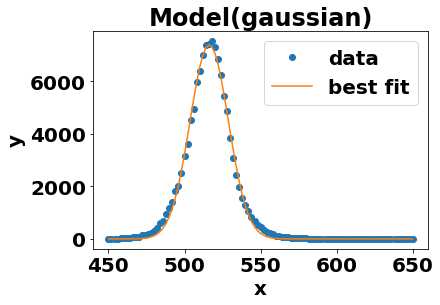

{'amplitude': 620841.3660786063, 'center': 521.3895135712095, 'sigma': 11.035170104106646, 'fwhm': 25.985839264552414, 'height': 22444.591264285922}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 12893902.6
    reduced chi-square = 131570.434
    Akaike info crit   = 1193.47160
    Bayesian info crit = 1201.31696
    R-squared          = 0.99671492
[[Variables]]
    amplitude:  620841.366 +/- 3929.44406 (0.63%) (init = 751113)
    center:     521.389514 +/- 0.08064886 (0.02%) (init = 521)
    sigma:      11.0351701 +/- 0.08064886 (0.73%) (init = 11)
    fwhm:       25.9858393 +/- 0.18991354 (0.73%) == '2.3548200*sigma'
    height:     22444.5913 +/- 142.056702 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


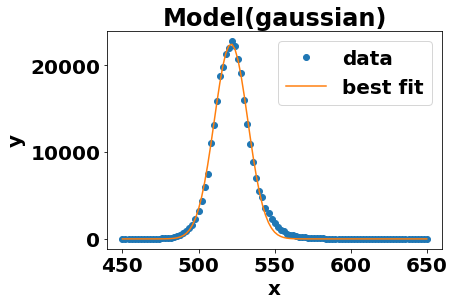

{'amplitude': 552249.8104992326, 'center': 519.7907026199719, 'sigma': 10.931447198956308, 'fwhm': 25.741590493046296, 'height': 20154.31310834698}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 8959958.62
    reduced chi-square = 91428.1492
    Akaike info crit   = 1156.70872
    Bayesian info crit = 1164.55408
    R-squared          = 0.99714869
[[Variables]]
    amplitude:  552249.810 +/- 3260.18385 (0.59%) (init = 729252)
    center:     519.790703 +/- 0.07451672 (0.01%) (init = 520)
    sigma:      10.9314472 +/- 0.07451672 (0.68%) (init = 12)
    fwhm:       25.7415905 +/- 0.17547347 (0.68%) == '2.3548200*sigma'
    height:     20154.3131 +/- 118.980188 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


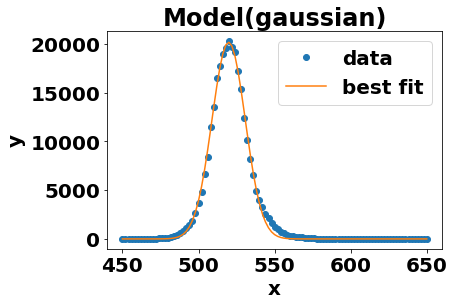

{'amplitude': 238980.25175186296, 'center': 518.7255642678135, 'sigma': 11.187094105080847, 'fwhm': 26.34359294052648, 'height': 8522.260597161416}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 1546478.37
    reduced chi-square = 15780.3916
    Akaike info crit   = 979.273407
    Bayesian info crit = 987.118769
    R-squared          = 0.99728883
[[Variables]]
    amplitude:  238980.252 +/- 1370.18805 (0.57%) (init = 286473)
    center:     518.725564 +/- 0.07406352 (0.01%) (init = 519)
    sigma:      11.1870941 +/- 0.07406353 (0.66%) (init = 11)
    fwhm:       26.3435929 +/- 0.17440627 (0.66%) == '2.3548200*sigma'
    height:     8522.26060 +/- 48.8621619 (0.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


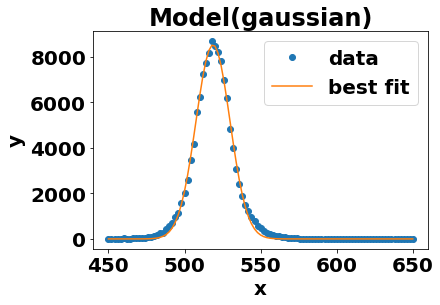

{'amplitude': 78883.9215071275, 'center': 515.9668105232051, 'sigma': 12.21947467119326, 'fwhm': 28.774663345219313, 'height': 2575.4080208752366}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 223372.329
    reduced chi-square = 2279.30948
    Akaike info crit   = 783.848952
    Bayesian info crit = 791.694314
    R-squared          = 0.99597059
[[Variables]]
    amplitude:  78883.9215 +/- 544.240375 (0.69%) (init = 94284)
    center:     515.966811 +/- 0.09734730 (0.02%) (init = 516)
    sigma:      12.2194747 +/- 0.09734730 (0.80%) (init = 12)
    fwhm:       28.7746633 +/- 0.22923538 (0.80%) == '2.3548200*sigma'
    height:     2575.40802 +/- 17.7683927 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


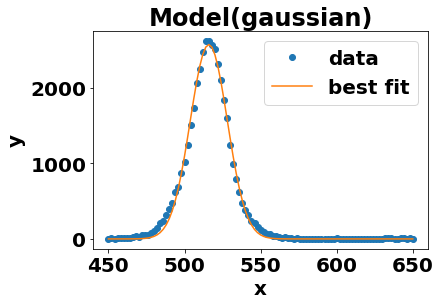

{'amplitude': 77427.91260972332, 'center': 514.5738197404261, 'sigma': 12.777190471921346, 'fwhm': 30.087983667089826, 'height': 2417.5322116863704}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 233779.219
    reduced chi-square = 2385.50224
    Akaike info crit   = 788.448204
    Bayesian info crit = 796.293566
    R-squared          = 0.99534793
[[Variables]]
    amplitude:  77427.9126 +/- 569.339728 (0.74%) (init = 96486)
    center:     514.573820 +/- 0.10848744 (0.02%) (init = 515)
    sigma:      12.7771905 +/- 0.10848744 (0.85%) (init = 13)
    fwhm:       30.0879837 +/- 0.25546840 (0.85%) == '2.3548200*sigma'
    height:     2417.53221 +/- 17.7765196 (0.74%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


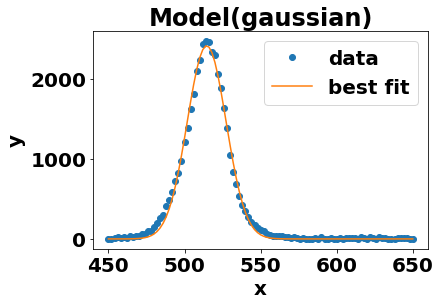

{'amplitude': 160739.10177777268, 'center': 515.4238803319296, 'sigma': 12.509262391599634, 'fwhm': 29.457061264986653, 'height': 5126.251649035767}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 932152.316
    reduced chi-square = 9511.75833
    Akaike info crit   = 928.143230
    Bayesian info crit = 935.988592
    R-squared          = 0.99583139
[[Variables]]
    amplitude:  160739.102 +/- 1124.88969 (0.70%) (init = 202839)
    center:     515.423880 +/- 0.10108578 (0.02%) (init = 515)
    sigma:      12.5092624 +/- 0.10108578 (0.81%) (init = 13)
    fwhm:       29.4570613 +/- 0.23803881 (0.81%) == '2.3548200*sigma'
    height:     5126.25165 +/- 35.8747358 (0.70%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


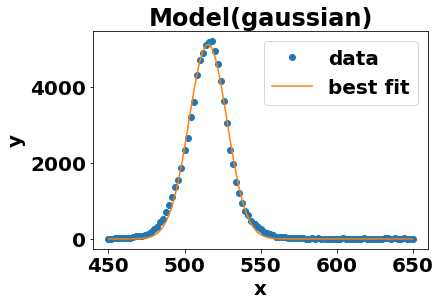

{'amplitude': 171951.64532555305, 'center': 515.7855410247189, 'sigma': 12.293779780576505, 'fwhm': 28.94963850289717, 'height': 5579.958816518146}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 921866.681
    reduced chi-square = 9406.80287
    Akaike info crit   = 927.022573
    Bayesian info crit = 934.867935
    R-squared          = 0.99647613
[[Variables]]
    amplitude:  171951.645 +/- 1108.98735 (0.64%) (init = 201816)
    center:     515.785541 +/- 0.09155347 (0.02%) (init = 516)
    sigma:      12.2937798 +/- 0.09155347 (0.74%) (init = 12)
    fwhm:       28.9496385 +/- 0.21559195 (0.74%) == '2.3548200*sigma'
    height:     5579.95882 +/- 35.9874520 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


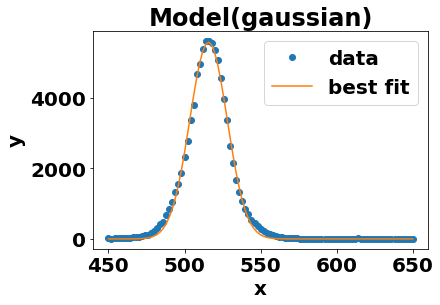

{'amplitude': 82320.44856197877, 'center': 515.4177444390779, 'sigma': 12.59402075687932, 'fwhm': 29.656651958714562, 'height': 2607.6746831156743}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 253310.952
    reduced chi-square = 2584.80563
    Akaike info crit   = 796.552508
    Bayesian info crit = 804.397870
    R-squared          = 0.99562244
[[Variables]]
    amplitude:  82320.4486 +/- 588.382580 (0.71%) (init = 102843)
    center:     515.417744 +/- 0.10394089 (0.02%) (init = 515)
    sigma:      12.5940208 +/- 0.10394089 (0.83%) (init = 13)
    fwhm:       29.6566520 +/- 0.24476208 (0.83%) == '2.3548200*sigma'
    height:     2607.67468 +/- 18.6382816 (0.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


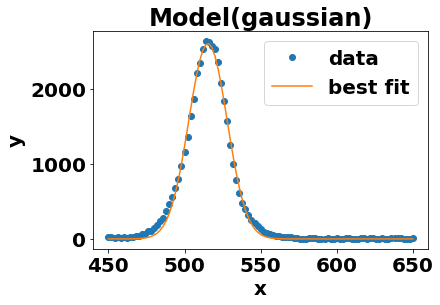

{'amplitude': 98464.9577090826, 'center': 516.2614278743438, 'sigma': 12.267111502440262, 'fwhm': 28.88683950817638, 'height': 3202.207519679749}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 388429.057
    reduced chi-square = 3963.56181
    Akaike info crit   = 839.729276
    Bayesian info crit = 847.574638
    R-squared          = 0.99547056
[[Variables]]
    amplitude:  98464.9577 +/- 719.076879 (0.73%) (init = 117216)
    center:     516.261428 +/- 0.10344358 (0.02%) (init = 516)
    sigma:      12.2671115 +/- 0.10344359 (0.84%) (init = 12)
    fwhm:       28.8868395 +/- 0.24359103 (0.84%) == '2.3548200*sigma'
    height:     3202.20752 +/- 23.3852458 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


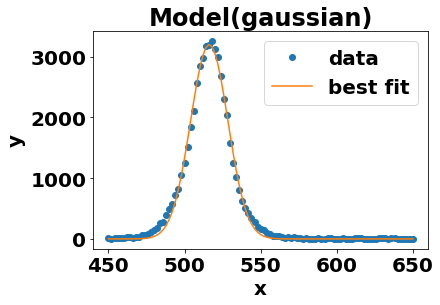

{'amplitude': 150408.43881241287, 'center': 515.8242569599378, 'sigma': 12.730082773592262, 'fwhm': 29.97705351691053, 'height': 4713.581960653728}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 940754.221
    reduced chi-square = 9599.53287
    Akaike info crit   = 929.070985
    Bayesian info crit = 936.916346
    R-squared          = 0.99506163
[[Variables]]
    amplitude:  150408.439 +/- 1139.99938 (0.76%) (init = 187434)
    center:     515.824257 +/- 0.11141249 (0.02%) (init = 515)
    sigma:      12.7300828 +/- 0.11141249 (0.88%) (init = 13)
    fwhm:       29.9770535 +/- 0.26235636 (0.88%) == '2.3548200*sigma'
    height:     4713.58196 +/- 35.7259722 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


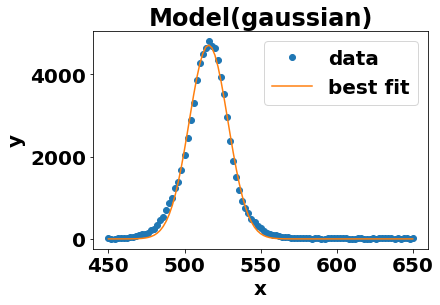

{'amplitude': 126732.8191058855, 'center': 513.7197636290077, 'sigma': 12.932524936545796, 'fwhm': 30.453768371076773, 'height': 3909.451757306254}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 535046.647
    reduced chi-square = 5459.65967
    Akaike info crit   = 872.073858
    Bayesian info crit = 879.919220
    R-squared          = 0.99597718
[[Variables]]
    amplitude:  126732.819 +/- 866.539005 (0.68%) (init = 165648)
    center:     513.719764 +/- 0.10210624 (0.02%) (init = 514)
    sigma:      12.9325249 +/- 0.10210624 (0.79%) (init = 14)
    fwhm:       30.4537684 +/- 0.24044182 (0.79%) == '2.3548200*sigma'
    height:     3909.45176 +/- 26.7310034 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


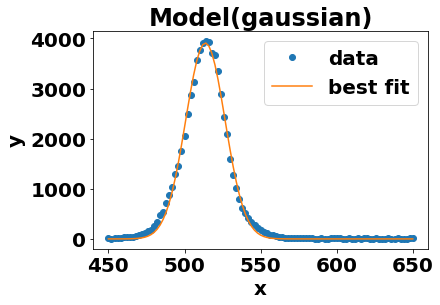

{'amplitude': 68497.06956628413, 'center': 513.9638468783992, 'sigma': 12.736683826014914, 'fwhm': 29.99259780717644, 'height': 2145.4861288319617}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 158128.583
    reduced chi-square = 1613.55697
    Akaike info crit   = 748.960371
    Bayesian info crit = 756.805733
    R-squared          = 0.99598626
[[Variables]]
    amplitude:  68497.0696 +/- 467.502742 (0.68%) (init = 91476)
    center:     513.963847 +/- 0.10037802 (0.02%) (init = 514)
    sigma:      12.7366838 +/- 0.10037802 (0.79%) (init = 14)
    fwhm:       29.9925978 +/- 0.23637217 (0.79%) == '2.3548200*sigma'
    height:     2145.48613 +/- 14.6432796 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


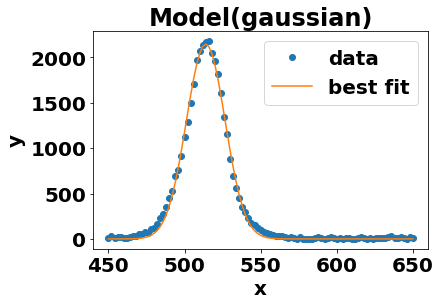

{'amplitude': 56327.70301210151, 'center': 513.3560999989278, 'sigma': 12.84987768259703, 'fwhm': 30.259148964533143, 'height': 1748.7717742090672}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 84100.4706
    reduced chi-square = 858.168067
    Akaike info crit   = 685.189339
    Bayesian info crit = 693.034701
    R-squared          = 0.99682769
[[Variables]]
    amplitude:  56327.7030 +/- 342.452291 (0.61%) (init = 69576)
    center:     513.356100 +/- 0.09020855 (0.02%) (init = 513)
    sigma:      12.8498777 +/- 0.09020855 (0.70%) (init = 13)
    fwhm:       30.2591490 +/- 0.21242490 (0.70%) == '2.3548200*sigma'
    height:     1748.77177 +/- 10.6319284 (0.61%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


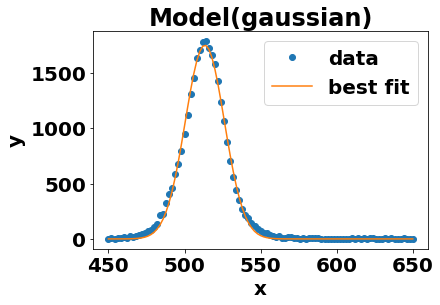

{'amplitude': 24762.995669761942, 'center': 513.7778276542692, 'sigma': 12.69300189995307, 'fwhm': 29.889734734047487, 'height': 778.3033931020996}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 19876.1553
    reduced chi-square = 202.817911
    Akaike info crit   = 539.497710
    Bayesian info crit = 547.343072
    R-squared          = 0.99616418
[[Variables]]
    amplitude:  24762.9957 +/- 165.462278 (0.67%) (init = 33474)
    center:     513.777828 +/- 0.09793324 (0.02%) (init = 514)
    sigma:      12.6930019 +/- 0.09793324 (0.77%) (init = 14)
    fwhm:       29.8897347 +/- 0.23061515 (0.77%) == '2.3548200*sigma'
    height:     778.303393 +/- 5.20050038 (0.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


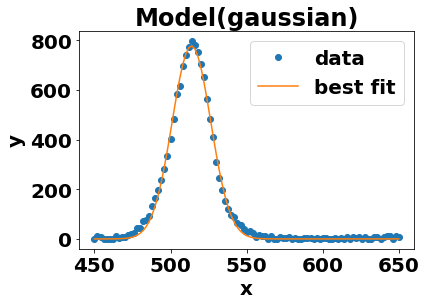

{'amplitude': 15501.647533733394, 'center': 514.898418578695, 'sigma': 12.441698963700405, 'fwhm': 29.29796155370099, 'height': 497.0593597337455}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 14193.7608
    reduced chi-square = 144.834294
    Akaike info crit   = 505.489162
    Bayesian info crit = 513.334524
    R-squared          = 0.99306806
[[Variables]]
    amplitude:  15501.6475 +/- 138.432880 (0.89%) (init = 19812)
    center:     514.898419 +/- 0.12829539 (0.02%) (init = 515)
    sigma:      12.4416990 +/- 0.12829539 (1.03%) (init = 13)
    fwhm:       29.2979616 +/- 0.30211256 (1.03%) == '2.3548200*sigma'
    height:     497.059360 +/- 4.43884577 (0.89%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


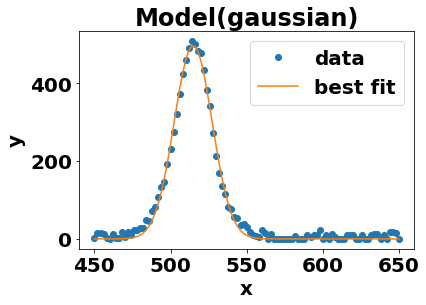

{'amplitude': 25055.86928520365, 'center': 514.025173839266, 'sigma': 12.697642654162623, 'fwhm': 29.90066287487523, 'height': 787.2206198732172}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 18538.5682
    reduced chi-square = 189.169063
    Akaike info crit   = 532.461297
    Bayesian info crit = 540.306659
    R-squared          = 0.99648568
[[Variables]]
    amplitude:  25055.8693 +/- 159.827252 (0.64%) (init = 31785)
    center:     514.025174 +/- 0.09352656 (0.02%) (init = 515)
    sigma:      12.6976427 +/- 0.09352656 (0.74%) (init = 13)
    fwhm:       29.9006629 +/- 0.22023821 (0.74%) == '2.3548200*sigma'
    height:     787.220620 +/- 5.02155905 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


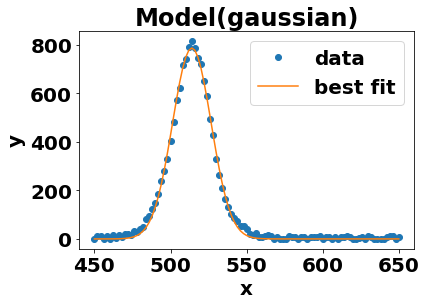

{'amplitude': 18386.76966491468, 'center': 514.6830814475709, 'sigma': 12.46669929237884, 'fwhm': 29.35683282767954, 'height': 588.3883141526878}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 11412.4748
    reduced chi-square = 116.453824
    Akaike info crit   = 483.461522
    Bayesian info crit = 491.306883
    R-squared          = 0.99609197
[[Variables]]
    amplitude:  18386.7697 +/- 124.255581 (0.68%) (init = 23127)
    center:     514.683081 +/- 0.09728178 (0.02%) (init = 515)
    sigma:      12.4666993 +/- 0.09728178 (0.78%) (init = 13)
    fwhm:       29.3568328 +/- 0.22908109 (0.78%) == '2.3548200*sigma'
    height:     588.388314 +/- 3.97625885 (0.68%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


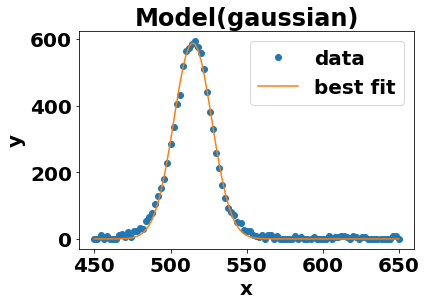

{'amplitude': 7728.066523422007, 'center': 515.0475215864858, 'sigma': 12.385509407219342, 'fwhm': 29.165645262308253, 'height': 248.92416872332365}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 6027.47953
    reduced chi-square = 61.5048931
    Akaike info crit   = 418.985333
    Bayesian info crit = 426.830695
    R-squared          = 0.98805740
[[Variables]]
    amplitude:  7728.06652 +/- 90.0069101 (1.16%) (init = 10296)
    center:     515.047522 +/- 0.16656710 (0.03%) (init = 515)
    sigma:      12.3855094 +/- 0.16656710 (1.34%) (init = 13)
    fwhm:       29.1656453 +/- 0.39223554 (1.34%) == '2.3548200*sigma'
    height:     248.924169 +/- 2.89916356 (1.16%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


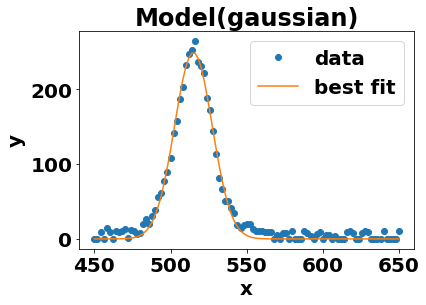

{'amplitude': 36416.707094126694, 'center': 515.1139741621289, 'sigma': 12.28619700699766, 'fwhm': 28.93178243601823, 'height': 1182.478587823607}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 38869.9932
    reduced chi-square = 396.632584
    Akaike info crit   = 607.238591
    Bayesian info crit = 615.083952
    R-squared          = 0.99668612
[[Variables]]
    amplitude:  36416.7071 +/- 227.649284 (0.63%) (init = 46254)
    center:     515.113974 +/- 0.08868552 (0.02%) (init = 515)
    sigma:      12.2861970 +/- 0.08868552 (0.72%) (init = 13)
    fwhm:       28.9317824 +/- 0.20883845 (0.72%) == '2.3548200*sigma'
    height:     1182.47859 +/- 7.39195109 (0.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


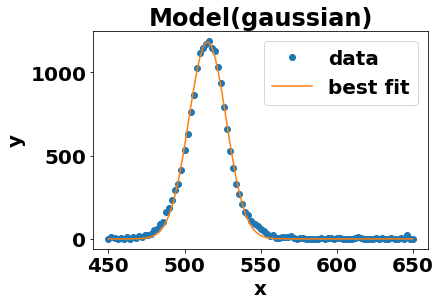

{'amplitude': 63249.55738879439, 'center': 512.7507217405561, 'sigma': 13.327421710209116, 'fwhm': 31.38367919163463, 'height': 1893.3087319761646}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 107140.466
    reduced chi-square = 1093.27006
    Akaike info crit   = 709.644325
    Bayesian info crit = 717.489687
    R-squared          = 0.99663569
[[Variables]]
    amplitude:  63249.5574 +/- 393.639089 (0.62%) (init = 77103)
    center:     512.750722 +/- 0.09577553 (0.02%) (init = 513)
    sigma:      13.3274217 +/- 0.09577553 (0.72%) (init = 13)
    fwhm:       31.3836792 +/- 0.22553414 (0.72%) == '2.3548200*sigma'
    height:     1893.30873 +/- 11.7831406 (0.62%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


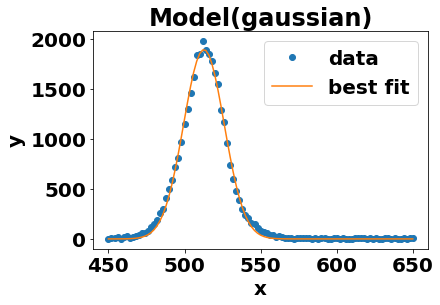

{'amplitude': 894971.5372520644, 'center': 522.2587585420636, 'sigma': 11.523320464882513, 'fwhm': 27.135345497114642, 'height': 30984.298717888218}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 20333028.4
    reduced chi-square = 207479.882
    Akaike info crit   = 1239.47630
    Bayesian info crit = 1247.32166
    R-squared          = 0.99736949
[[Variables]]
    amplitude:  894971.537 +/- 5042.44322 (0.56%) (init = 1126008)
    center:     522.258759 +/- 0.07496869 (0.01%) (init = 522)
    sigma:      11.5233205 +/- 0.07496869 (0.65%) (init = 12)
    fwhm:       27.1353455 +/- 0.17653776 (0.65%) == '2.3548200*sigma'
    height:     30984.2987 +/- 174.571841 (0.56%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


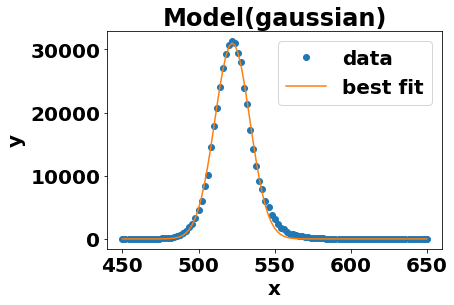

{'amplitude': 544446.392841645, 'center': 518.0965784615236, 'sigma': 11.398208435279562, 'fwhm': 26.84072918756502, 'height': 19055.862806883488}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 7390659.28
    reduced chi-square = 75414.8906
    Akaike info crit   = 1137.26131
    Bayesian info crit = 1145.10667
    R-squared          = 0.99744718
[[Variables]]
    amplitude:  544446.393 +/- 3023.50917 (0.56%) (init = 681804)
    center:     518.096578 +/- 0.07309093 (0.01%) (init = 518)
    sigma:      11.3982084 +/- 0.07309093 (0.64%) (init = 12)
    fwhm:       26.8407292 +/- 0.17211598 (0.64%) == '2.3548200*sigma'
    height:     19055.8628 +/- 105.824367 (0.56%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


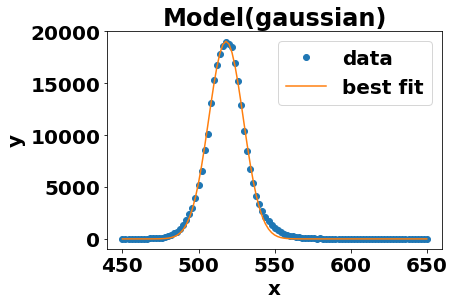

{'amplitude': 174435.68601610488, 'center': 516.6602113972036, 'sigma': 12.032102008019233, 'fwhm': 28.333434450523853, 'height': 5783.6755152975}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 698442.769
    reduced chi-square = 7126.96703
    Akaike info crit   = 898.990288
    Bayesian info crit = 906.835650
    R-squared          = 0.99748040
[[Variables]]
    amplitude:  174435.686 +/- 954.962767 (0.55%) (init = 227331)
    center:     516.660211 +/- 0.07606103 (0.01%) (init = 517)
    sigma:      12.0321020 +/- 0.07606103 (0.63%) (init = 13)
    fwhm:       28.3334345 +/- 0.17911004 (0.63%) == '2.3548200*sigma'
    height:     5783.67552 +/- 31.6632271 (0.55%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


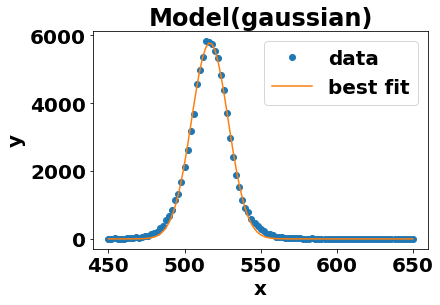

{'amplitude': 108630.78248556351, 'center': 514.8755496770802, 'sigma': 13.667355120033337, 'fwhm': 32.184161183756906, 'height': 3170.8705770048596}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 226786.667
    reduced chi-square = 2314.14966
    Akaike info crit   = 785.381099
    Bayesian info crit = 793.226460
    R-squared          = 0.99751160
[[Variables]]
    amplitude:  108630.782 +/- 579.964240 (0.53%) (init = 136374)
    center:     514.875550 +/- 0.08425629 (0.02%) (init = 514)
    sigma:      13.6673551 +/- 0.08425629 (0.62%) (init = 14)
    fwhm:       32.1841612 +/- 0.19840839 (0.62%) == '2.3548200*sigma'
    height:     3170.87058 +/- 16.9288294 (0.53%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


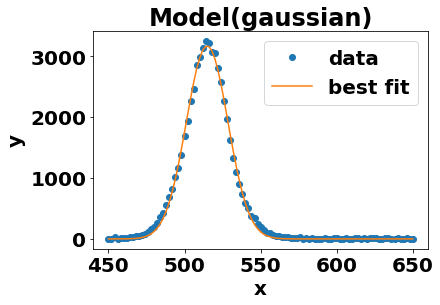

{'amplitude': 51960.57703077861, 'center': 513.504144502463, 'sigma': 12.97046754896608, 'fwhm': 30.54311639365631, 'height': 1598.190044555363}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 99543.7389
    reduced chi-square = 1015.75244
    Akaike info crit   = 702.216422
    Bayesian info crit = 710.061783
    R-squared          = 0.99551811
[[Variables]]
    amplitude:  51960.5770 +/- 374.313615 (0.72%) (init = 68586)
    center:     513.504145 +/- 0.10789155 (0.02%) (init = 514)
    sigma:      12.9704675 +/- 0.10789155 (0.83%) (init = 14)
    fwhm:       30.5431164 +/- 0.25406518 (0.83%) == '2.3548200*sigma'
    height:     1598.19004 +/- 11.5130554 (0.72%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


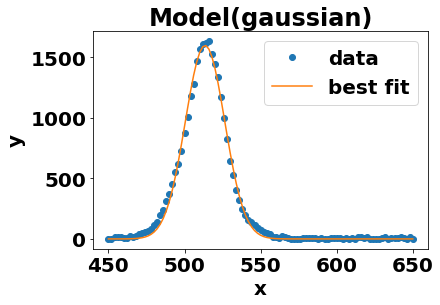

{'amplitude': 81530.1843246217, 'center': 514.223411807287, 'sigma': 12.628699113860073, 'fwhm': 29.738313247299978, 'height': 2575.5494655970724}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 228762.914
    reduced chi-square = 2334.31545
    Akaike info crit   = 786.257413
    Bayesian info crit = 794.102774
    R-squared          = 0.99596624
[[Variables]]
    amplitude:  81530.1843 +/- 559.917168 (0.69%) (init = 103467)
    center:     514.223412 +/- 0.10014631 (0.02%) (init = 515)
    sigma:      12.6286991 +/- 0.10014631 (0.79%) (init = 13)
    fwhm:       29.7383132 +/- 0.23582653 (0.79%) == '2.3548200*sigma'
    height:     2575.54947 +/- 17.6879019 (0.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


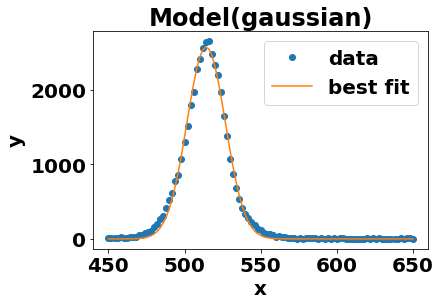

{'amplitude': 91630.49007429919, 'center': 513.5864645839068, 'sigma': 13.051343217377688, 'fwhm': 30.73356403514533, 'height': 2800.882472517865}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 260892.402
    reduced chi-square = 2662.16737
    Akaike info crit   = 799.531026
    Bayesian info crit = 807.376388
    R-squared          = 0.99620800
[[Variables]]
    amplitude:  91630.4901 +/- 607.867334 (0.66%) (init = 120036)
    center:     513.586465 +/- 0.09997555 (0.02%) (init = 514)
    sigma:      13.0513432 +/- 0.09997555 (0.77%) (init = 14)
    fwhm:       30.7335640 +/- 0.23542443 (0.77%) == '2.3548200*sigma'
    height:     2800.88247 +/- 18.5807810 (0.66%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


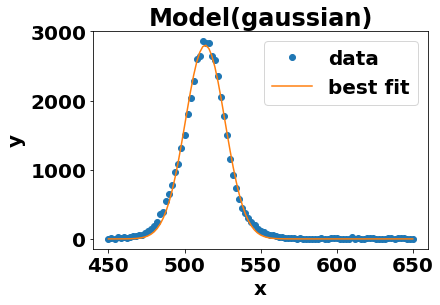

{'amplitude': 245484.43309698385, 'center': 515.6320945077784, 'sigma': 12.544062658939936, 'fwhm': 29.53900963052494, 'height': 7807.209435781231}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 2590883.48
    reduced chi-square = 26437.5865
    Akaike info crit   = 1031.39129
    Bayesian info crit = 1039.23665
    R-squared          = 0.99499783
[[Variables]]
    amplitude:  245484.433 +/- 1877.98412 (0.77%) (init = 289368)
    center:     515.632095 +/- 0.11080883 (0.02%) (init = 516)
    sigma:      12.5440627 +/- 0.11080883 (0.88%) (init = 12)
    fwhm:       29.5390096 +/- 0.26093485 (0.88%) == '2.3548200*sigma'
    height:     7807.20944 +/- 59.7259420 (0.77%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


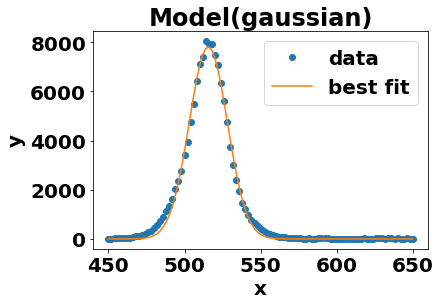

{'amplitude': 172580.34259763896, 'center': 511.0101550493243, 'sigma': 14.549303633041937, 'fwhm': 34.26099118115982, 'height': 4732.157672091633}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 643005.356
    reduced chi-square = 6561.27914
    Akaike info crit   = 890.637569
    Bayesian info crit = 898.482931
    R-squared          = 0.99697830
[[Variables]]
    amplitude:  172580.343 +/- 1007.57888 (0.58%) (init = 217215)
    center:     511.010155 +/- 0.09808437 (0.02%) (init = 511)
    sigma:      14.5493036 +/- 0.09808440 (0.67%) (init = 15)
    fwhm:       34.2609912 +/- 0.23097111 (0.67%) == '2.3548200*sigma'
    height:     4732.15767 +/- 27.6278634 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


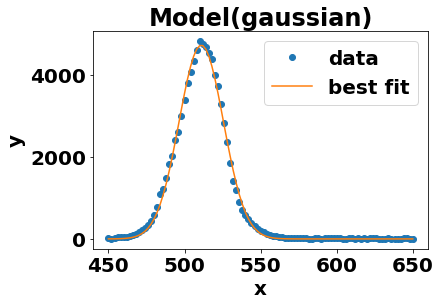

{'amplitude': 110049.32988099298, 'center': 516.0863014416674, 'sigma': 12.928646337804139, 'fwhm': 30.444634969187945, 'height': 3395.818218633306}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 458900.935
    reduced chi-square = 4682.66261
    Akaike info crit   = 856.568381
    Bayesian info crit = 864.413743
    R-squared          = 0.99542016
[[Variables]]
    amplitude:  110049.330 +/- 802.393196 (0.73%) (init = 145698)
    center:     516.086301 +/- 0.10884875 (0.02%) (init = 516)
    sigma:      12.9286463 +/- 0.10884875 (0.84%) (init = 14)
    fwhm:       30.4446350 +/- 0.25631920 (0.84%) == '2.3548200*sigma'
    height:     3395.81822 +/- 24.7596808 (0.73%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


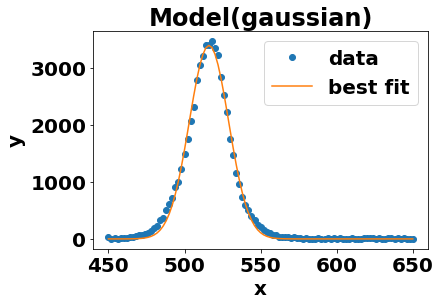

{'amplitude': 1860.0861312877266, 'center': 511.87902324577544, 'sigma': 14.170321519521313, 'fwhm': 33.36855652059918, 'height': 52.36769246144074}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 101
    # variables        = 3
    chi-square         = 4824.92507
    reduced chi-square = 49.2339293
    Akaike info crit   = 396.509427
    Bayesian info crit = 404.354788
    R-squared          = 0.79679528
[[Variables]]
    amplitude:  1860.08613 +/- 86.1370273 (4.63%) (init = 2520)
    center:     511.879023 +/- 0.75772315 (0.15%) (init = 513)
    sigma:      14.1703215 +/- 0.75772315 (5.35%) (init = 15)
    fwhm:       33.3685565 +/- 1.78430162 (5.35%) == '2.3548200*sigma'
    height:     52.3676925 +/- 2.42506481 (4.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


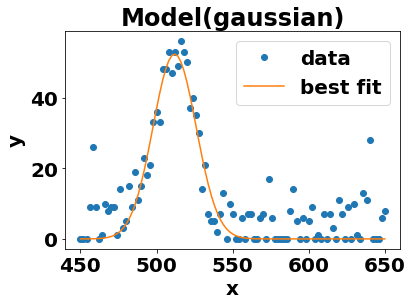

{'amplitude': 201120.31359089358, 'center': 511.837566467366, 'sigma': 13.318508881080078, 'fwhm': 31.36269108334499, 'height': 6024.353116184999}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 1200690.97
    reduced chi-square = 12251.9487
    Akaike info crit   = 953.712011
    Bayesian info crit = 961.557373
    R-squared          = 0.99628149
[[Variables]]
    amplitude:  201120.314 +/- 1317.32757 (0.65%) (init = 257292)
    center:     511.837566 +/- 0.10073099 (0.02%) (init = 512)
    sigma:      13.3185089 +/- 0.10073100 (0.76%) (init = 14)
    fwhm:       31.3626911 +/- 0.23720336 (0.76%) == '2.3548200*sigma'
    height:     6024.35312 +/- 39.4592170 (0.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


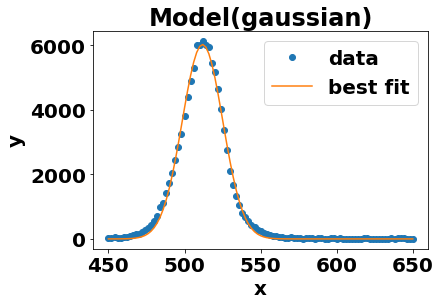

{'amplitude': 97766.86506003974, 'center': 511.3701450770473, 'sigma': 13.408555524884644, 'fwhm': 31.574734721108857, 'height': 2908.839653790929}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 265186.960
    reduced chi-square = 2705.98939
    Akaike info crit   = 801.180055
    Bayesian info crit = 809.025416
    R-squared          = 0.99649180
[[Variables]]
    amplitude:  97766.8651 +/- 621.181832 (0.64%) (init = 123522)
    center:     511.370145 +/- 0.09837393 (0.02%) (init = 512)
    sigma:      13.4085555 +/- 0.09837393 (0.73%) (init = 14)
    fwhm:       31.5747347 +/- 0.23165290 (0.73%) == '2.3548200*sigma'
    height:     2908.83965 +/- 18.4819547 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


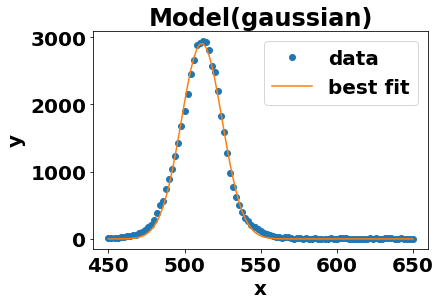

{'amplitude': 88160.35269601642, 'center': 511.0697671752163, 'sigma': 13.430323293810545, 'fwhm': 31.62599389873095, 'height': 2618.7674789309604}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 187742.923
    reduced chi-square = 1915.74411
    Akaike info crit   = 766.298544
    Bayesian info crit = 774.143906
    R-squared          = 0.99693231
[[Variables]]
    amplitude:  88160.3527 +/- 523.089977 (0.59%) (init = 112560)
    center:     511.069767 +/- 0.09201534 (0.02%) (init = 512)
    sigma:      13.4303233 +/- 0.09201534 (0.69%) (init = 14)
    fwhm:       31.6259939 +/- 0.21667956 (0.69%) == '2.3548200*sigma'
    height:     2618.76748 +/- 15.5382067 (0.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


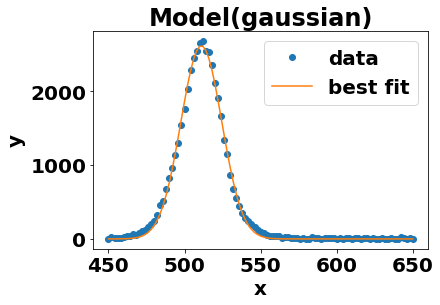

{'amplitude': 30610.45236383024, 'center': 509.42344467972026, 'sigma': 13.609487189695242, 'fwhm': 32.047892624038155, 'height': 897.300838735007}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 26012.6611
    reduced chi-square = 265.435317
    Akaike info crit   = 566.673033
    Bayesian info crit = 574.518394
    R-squared          = 0.99638368
[[Variables]]
    amplitude:  30610.4524 +/- 196.003633 (0.64%) (init = 39648)
    center:     509.423445 +/- 0.10062509 (0.02%) (init = 510)
    sigma:      13.6094872 +/- 0.10062509 (0.74%) (init = 14)
    fwhm:       32.0478926 +/- 0.23695398 (0.74%) == '2.3548200*sigma'
    height:     897.300839 +/- 5.74556783 (0.64%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


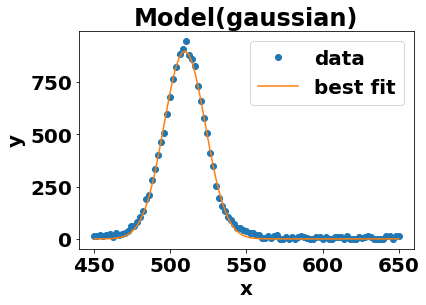

{'amplitude': 2111.9549634366417, 'center': 509.0118506529696, 'sigma': 14.852588877494927, 'fwhm': 34.97517334050261, 'height': 56.72736097115589}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 101
    # variables        = 3
    chi-square         = 4415.31501
    reduced chi-square = 45.0542348
    Akaike info crit   = 387.549108
    Bayesian info crit = 395.394470
    R-squared          = 0.84441747
[[Variables]]
    amplitude:  2111.95496 +/- 84.3610810 (3.99%) (init = 3348)
    center:     509.011851 +/- 0.68507595 (0.13%) (init = 507.7647)
    sigma:      14.8525889 +/- 0.68507681 (4.61%) (init = 18)
    fwhm:       34.9751733 +/- 1.61323258 (4.61%) == '2.3548200*sigma'
    height:     56.7273610 +/- 2.26598263 (3.99%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


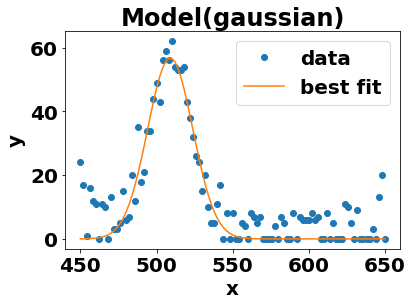

{'amplitude': 14870.224092072025, 'center': 508.39079654079484, 'sigma': 14.009821701736305, 'fwhm': 32.99060833968269, 'height': 423.44303354491655}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 8418.02262
    reduced chi-square = 85.8981900
    Akaike info crit   = 452.723982
    Bayesian info crit = 460.569343
    R-squared          = 0.99483047
[[Variables]]
    amplitude:  14870.2241 +/- 113.128845 (0.76%) (init = 19485)
    center:     508.390797 +/- 0.12307212 (0.02%) (init = 509)
    sigma:      14.0098217 +/- 0.12307215 (0.88%) (init = 15)
    fwhm:       32.9906083 +/- 0.28981277 (0.88%) == '2.3548200*sigma'
    height:     423.443034 +/- 3.22145511 (0.76%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


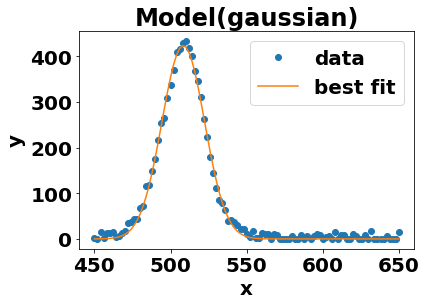

{'amplitude': 22471.99461269443, 'center': 41.13963255679788, 'sigma': 307.0018326225792, 'fwhm': 722.9340554963019, 'height': 29.2018752454723}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 101
    # variables        = 3
    chi-square         = 3310.40448
    reduced chi-square = 33.7796376
    Akaike info crit   = 358.460220
    Bayesian info crit = 366.305581
    R-squared          = 0.13457286
[[Variables]]
    amplitude:  22471.9946 +/- 199153.113 (886.23%) (init = 7410)
    center:     41.1396326 +/- 2465.97990 (5994.17%) (init = 517.2941)
    sigma:      307.001833 +/- 766.032877 (249.52%) (init = 95)
    fwhm:       722.934055 +/- 1803.86954 (249.52%) == '2.3548200*sigma'
    height:     29.2018752 +/- 186.218176 (637.69%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -1.000
    C(center, sigma)     = -0.999
   

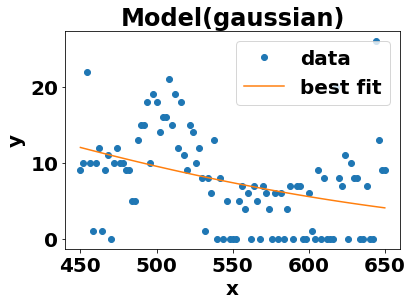

{'amplitude': 3329.1364537200866, 'center': 510.00996209467894, 'sigma': 13.453182563513103, 'fwhm': 31.679823364211927, 'height': 98.72261433982297}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 101
    # variables        = 3
    chi-square         = 2562.77561
    reduced chi-square = 26.1507716
    Akaike info crit   = 332.606291
    Bayesian info crit = 340.451653
    R-squared          = 0.96975333
[[Variables]]
    amplitude:  3329.13645 +/- 61.1675111 (1.84%) (init = 4590)
    center:     510.009962 +/- 0.28542140 (0.06%) (init = 509.8667)
    sigma:      13.4531826 +/- 0.28542140 (2.12%) (init = 15)
    fwhm:       31.6798234 +/- 0.67211603 (2.12%) == '2.3548200*sigma'
    height:     98.7226143 +/- 1.81387684 (1.84%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


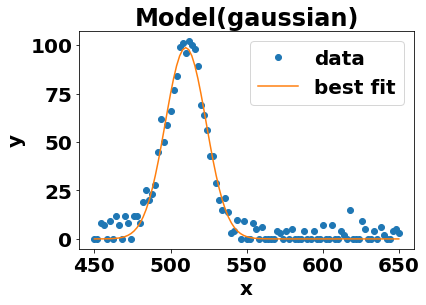

{'amplitude': 17874.620418175575, 'center': 509.71364232028924, 'sigma': 14.148135058522017, 'fwhm': 33.316311398508816, 'height': 504.01993985480505}
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 101
    # variables        = 3
    chi-square         = 12954.2881
    reduced chi-square = 132.186613
    Akaike info crit   = 496.260224
    Bayesian info crit = 504.105586
    R-squared          = 0.99437667
[[Variables]]
    amplitude:  17874.6204 +/- 141.027981 (0.79%) (init = 22218)
    center:     509.713642 +/- 0.12889493 (0.03%) (init = 510)
    sigma:      14.1481351 +/- 0.12889496 (0.91%) (init = 14)
    fwhm:       33.3163114 +/- 0.30352443 (0.91%) == '2.3548200*sigma'
    height:     504.019940 +/- 3.97663203 (0.79%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


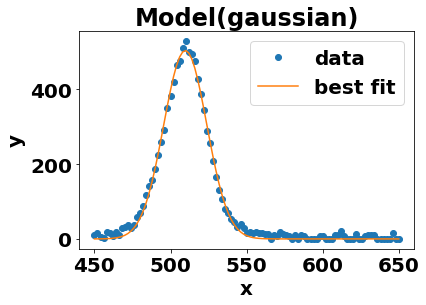

In [34]:

data = Readfinal
result_readfinal= np.zeros((data.shape[0],data.shape[1],4))
x = luminescence_wavelength  #np.arange(dat.shape[0])


 
fwhm2=[]
center2=[]
height2=[]
fit_data=[]
for i in range (80):
  y=data[:,i]
  mod = GaussianModel()
  pars = mod.guess(y, x=x)
  result = mod.fit(y, pars, x=x) 
  val= result.params.valuesdict()
  f= np.array(val['fwhm'])
  fwhm2.append(f)
  c= np.array(val['center'])
  center2.append(c)
  h=np.array(val['height'])
  height2.append(h)
  #values= np.array(result.params.valuesdict())
  #fit_data.append(values)
  print(result.params.valuesdict())
  para=result.fit_report()
  print(result.fit_report())
  
  result.plot_fit()
      
      
  plt.show()
  
  



##Intensity Bar Plot for Final Read

In [35]:
intensity_bar2= pd.DataFrame(height2)
intensity_bar2.rename(columns={intensity_bar2.columns[0]: 'Height'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

intensity_bar2['wells']=wells

print(intensity_bar2)

          Height  wells
0   21211.353749  1:0.1
1   24292.677721  1:0.2
2   32102.279106  1:0.3
3   26794.091145  1:0.4
4   21447.563260  1:0.5
..           ...    ...
75     56.727361  1:1.6
76    423.443034  1:1.7
77     29.201875  1:1.8
78     98.722614  1:1.9
79    504.019940    1:2

[80 rows x 2 columns]


Text(0.5, 1.0, '150 ul PbBr2')

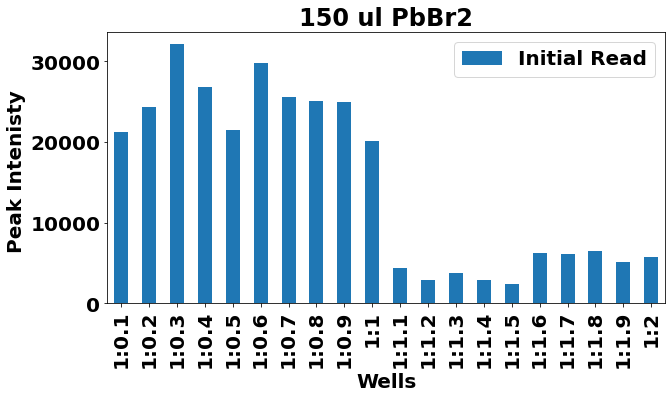

In [36]:

plotdata= intensity_bar2[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(10,5),cmap=cmap);


ax.set_xlabel("Wells")
ax.set_ylabel("Peak Intenisty ")
ax.set_xticklabels(intensity_bar2['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'])

ax.set_title('150 ul PbBr2')

## FWHM Bar Plot for Final Read

In [37]:
fwhm_bar2= pd.DataFrame(fwhm2)
fwhm_bar2.rename(columns={fwhm_bar2.columns[0]: 'fwhm'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

fwhm_bar2['wells']=wells

print(fwhm_bar2)

          fwhm  wells
0    28.301966  1:0.1
1    27.723634  1:0.2
2    28.105614  1:0.3
3    26.823586  1:0.4
4    27.398921  1:0.5
..         ...    ...
75   34.975173  1:1.6
76   32.990608  1:1.7
77  722.934055  1:1.8
78   31.679823  1:1.9
79   33.316311    1:2

[80 rows x 2 columns]


Text(0.5, 1.0, '300 ul PbBr2')

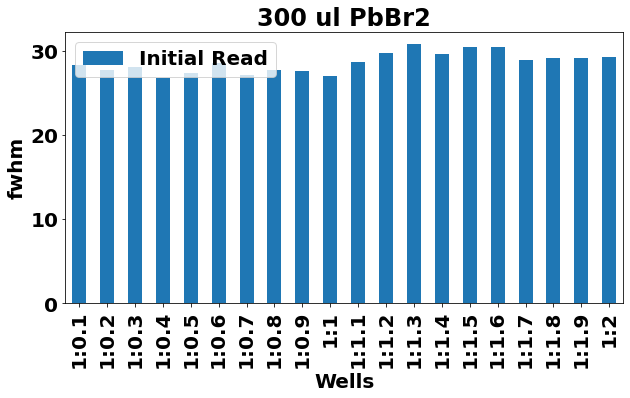

In [38]:
import matplotlib.pyplot as plt
import matplotlib
plotdata= fwhm_bar2[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(10,5),cmap=cmap);


ax.set_xlabel("Wells")
ax.set_ylabel("fwhm")
ax.set_xticklabels(fwhm_bar2['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'])

ax.set_title('300 ul PbBr2')

##Position Bar Plot for Final Read

In [39]:
center_bar2= pd.DataFrame(center2)
center_bar2.rename(columns={center_bar2.columns[0]: 'center'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

center_bar2['wells']=wells

print(center_bar2)

        center  wells
0   524.312160  1:0.1
1   523.997005  1:0.2
2   525.328045  1:0.3
3   522.154144  1:0.4
4   520.759655  1:0.5
..         ...    ...
75  509.011851  1:1.6
76  508.390797  1:1.7
77   41.139633  1:1.8
78  510.009962  1:1.9
79  509.713642    1:2

[80 rows x 2 columns]


Text(0.5, 1.0, '300 ul PbBr2')

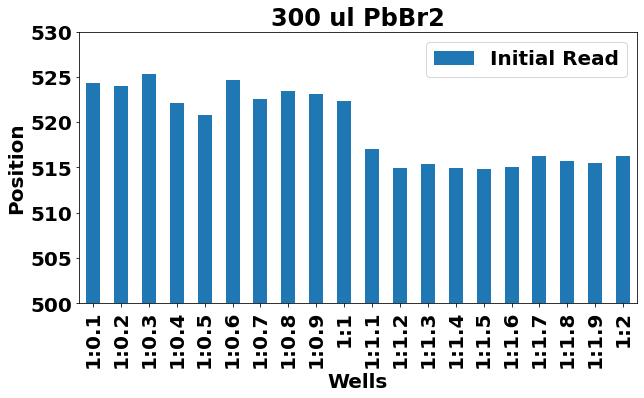

In [40]:

plotdata= center_bar2[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(10,5),cmap=cmap);

plt.ylim([500, 530])
ax.set_xlabel("Wells")
ax.set_ylabel("Position")
ax.set_xticklabels(center_bar2['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'])

ax.set_title('300 ul PbBr2')

##Combined Intial and Final Read




###Combined Intensity Bar Plot

In [41]:
final_height= np.vstack((height,height2)).T

height_final=pd.DataFrame(final_height)

In [42]:
height_final

0             1
0   31475.376709  21211.353749
1   37704.894950  24292.677721
2   52282.371464  32102.279106
3   35474.312347  26794.091145
4   20460.497525  21447.563260
..           ...           ...
75    248.208658     56.727361
76    209.930610    423.443034
77     65.432901     29.201875
78    203.646994     98.722614
79    146.914453    504.019940

[80 rows x 2 columns]

In [43]:

height_final.rename(columns={height_final.columns[0]: 'Initial Height', height_final.columns[1]:'Final Height'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

height_final['wells']=wells

print(height_final)

    Initial Height  Final Height  wells
0     31475.376709  21211.353749  1:0.1
1     37704.894950  24292.677721  1:0.2
2     52282.371464  32102.279106  1:0.3
3     35474.312347  26794.091145  1:0.4
4     20460.497525  21447.563260  1:0.5
..             ...           ...    ...
75      248.208658     56.727361  1:1.6
76      209.930610    423.443034  1:1.7
77       65.432901     29.201875  1:1.8
78      203.646994     98.722614  1:1.9
79      146.914453    504.019940    1:2

[80 rows x 3 columns]


\

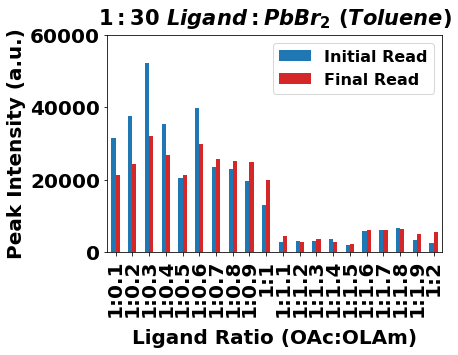

In [54]:

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
csfont = {'fontname':'Calibri'}
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

plotdata= height_final[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(6,4),cmap=cmap,ylim=(0,60000));
plt.rcParams.update({'font.size': 20})

ax.set_xlabel("Ligand Ratio (OAc:OLAm)", labelpad=12, size=20)
ax.set_ylabel("Peak Intensity (a.u.)", size=20)
ax.set_xticklabels(height_final['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'],fontsize=16)

ax.set_title('$1:30$ $Ligand:PbBr_2$ $(Toluene)$',**csfont,size=21,pad=10)
plt.savefig('300ul Peak Intensity OA OLA Tol.tif', bbox_inches='tight',dpi=300)

###Combined FWHM Bar Plot

In [45]:
final_fwhm= np.vstack((fwhm,fwhm2)).T

fwhm_final=pd.DataFrame(final_fwhm)


fwhm_final.rename(columns={fwhm_final.columns[0]: 'Initial FWHM', fwhm_final.columns[1]:'Final FWHM'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

fwhm_final['wells']=wells

print(fwhm_final)

    Initial FWHM  Final FWHM  wells
0      26.364318   28.301966  1:0.1
1      26.224323   27.723634  1:0.2
2      27.144988   28.105614  1:0.3
3      26.206190   26.823586  1:0.4
4      26.751026   27.398921  1:0.5
..           ...         ...    ...
75     35.376826   34.975173  1:1.6
76     35.266436   32.990608  1:1.7
77     43.171804  722.934055  1:1.8
78     35.586983   31.679823  1:1.9
79     37.941599   33.316311    1:2

[80 rows x 3 columns]


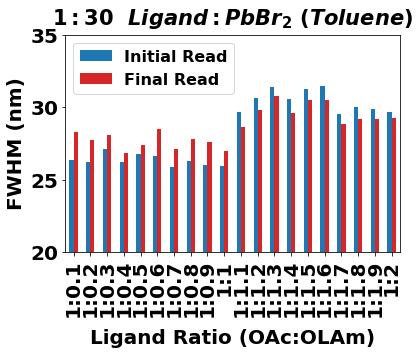

In [53]:

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plotdata= fwhm_final[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(6,4),cmap=cmap);

plt.ylim([20, 35])
ax.set_xlabel("Ligand Ratio (OAc:OLAm)", labelpad=12, size=20)
ax.set_ylabel("FWHM (nm)", size=20)
ax.set_xticklabels(fwhm_final['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'],fontsize=16)


ax.set_title('$1:30$  $Ligand:PbBr_2$ $(Toluene)$',**csfont,size=21,pad=10)
plt.savefig('300 ul FWHM OA OLA TOl.tif', bbox_inches='tight',dpi=300)

###Combined Peak Position Bar Plot

In [47]:
final_center= np.vstack((center,center2)).T

center_final=pd.DataFrame(final_center)


center_final.rename(columns={center_final.columns[0]: 'Initial center', center_final.columns[1]:'Final center'},inplace=True)

compositions = list(composition.iloc[3,:80])
wells= compositions

center_final['wells']=wells

print(center_final)

    Initial center  Final center  wells
0       522.613711    524.312160  1:0.1
1       522.321979    523.997005  1:0.2
2       523.150354    525.328045  1:0.3
3       520.040419    522.154144  1:0.4
4       517.771132    520.759655  1:0.5
..             ...           ...    ...
75      507.555552    509.011851  1:1.6
76      506.558617    508.390797  1:1.7
77      501.905575     41.139633  1:1.8
78      507.289714    510.009962  1:1.9
79      506.773222    509.713642    1:2

[80 rows x 3 columns]


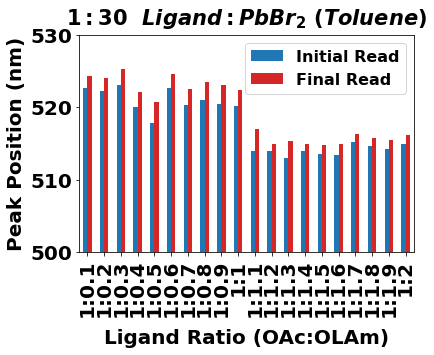

In [55]:
plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plotdata= center_final[0:20]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(6,4),cmap=cmap);

plt.ylim([500, 530])
ax.set_xlabel("Ligand Ratio (OAc:OLAm)", labelpad=12, size=20)
ax.set_ylabel("Peak Position (nm)", size=20)
ax.set_xticklabels(center_final['wells'].iloc[0:20])
ax.legend(['Initial Read','Final Read'],fontsize=16)

ax.set_xticklabels(['1:0.1','1:0.2','1:0.3','1:0.4','1:0.5','1:0.6','1:0.7','1:0.8','1:0.9','1:1','1:1.1','1:1.2','1:1.3','1:1.4','1:1.5','1:1.6','1:1.7','1:1.8','1:1.9','1:2'])
ax.set_title('$1:30$  $Ligand:PbBr_2$ $(Toluene)$',**csfont,size=21,pad=10)
plt.savefig('300 ul Peak Position OA OLA TOl.tif', bbox_inches='tight',dpi=300)

##150 ul PbBr2

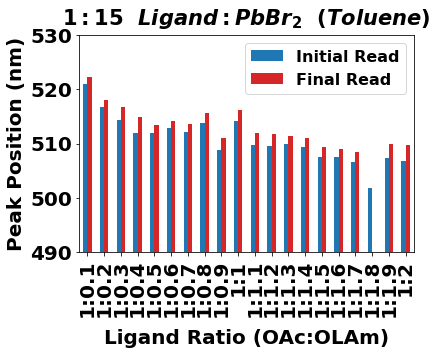

In [56]:


plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

plotdata= center_final[60:80]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(6,4),cmap=cmap);

plt.ylim([490, 530])
ax.set_xlabel("Ligand Ratio (OAc:OLAm)", labelpad=12, size=20)
ax.set_ylabel("Peak Position (nm)")
ax.set_xticklabels(center_final['wells'].iloc[60:80])
ax.legend(['Initial Read','Final Read'],fontsize=16)


#ax.invert_xaxis()'
ax.set_title('$1:15$  $Ligand:PbBr_2$  $(Toluene)$',**csfont,size=21,pad=10)
plt.savefig('150 ul Peak Position OA OLA TOl.tif', bbox_inches='tight',dpi=300)

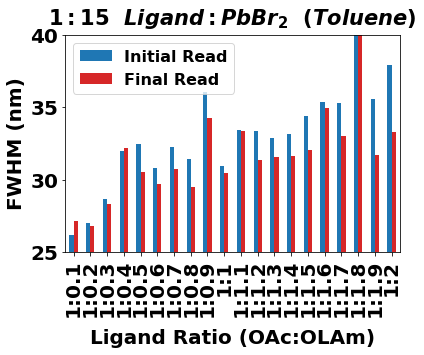

In [57]:

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

plotdata= fwhm_final[60:810]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(6,4),cmap=cmap);

plt.ylim([25, 40])
ax.set_xlabel("Ligand Ratio (OAc:OLAm)", labelpad=12, size=20)
ax.set_ylabel("FWHM (nm)", size=20)
ax.set_xticklabels(fwhm_final['wells'].iloc[60:80])
ax.legend(['Initial Read','Final Read'],fontsize=16)


ax.set_title('$1:15$  $Ligand:PbBr_2$  $(Toluene)$',**csfont,size=21,pad=10)
plt.savefig('150 ul FWHM OA OLA TOl.tif', bbox_inches='tight',dpi=300)

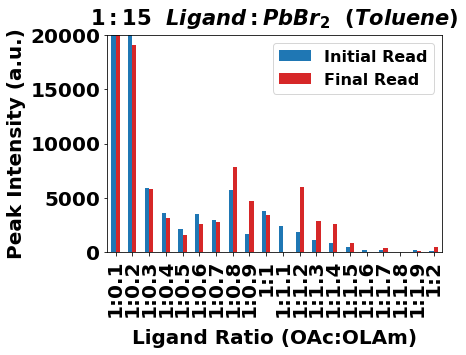

In [58]:


plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.size"] = "20"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.weight"] = "bold"

plotdata= height_final[60:80]
cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:4])
ax = plotdata.plot(kind='bar', figsize=(6,4),cmap=cmap,ylim=(0,20000));



ax.set_xlabel("Ligand Ratio (OAc:OLAm)", size=20, labelpad=12)
ax.set_ylabel("Peak Intensity (a.u.)", size=20)
ax.set_xticklabels(height_final['wells'].iloc[60:80])

ax.legend(['Initial Read','Final Read'],fontsize=16)

ax.set_title('$1:15$  $Ligand:PbBr_2$  $(Toluene)$',**csfont,size=21,pad=10)
plt.savefig('150ul Peak Intensity OA OLA Tol.tif', bbox_inches='tight',dpi=300)
